In [8]:
from sshtunnel import SSHTunnelForwarder
import pymysql as db
import pandas as pd
import os
import itertools as IT


In [9]:
host = '172.20.0.113'
user = 'ops_read_user'
password='Proxy@123'
database = 'georgiapacificdb'
server = 'Whiskey'
port=6002

def query(q):
             conn = db.connect(host=host,
                               port = port,
                               user = user,
                               passwd=password,
                               db = database
                               )
             
             return pd.read_sql_query(q,conn)


In [10]:
header_col = """ 



SELECT DISTINCT 
#ded_deduction
everything_except_commit.pk_deduction_id,
everything_except_commit.original_dispute_amount,
everything_except_commit.cum_days_out_standing,
everything_except_commit.payer,
everything_except_commit.posting_date,
everything_except_commit.merge_status,

#display_text

everything_except_commit.cust_map_id_ded,
everything_except_commit.ded_display_text,

everything_except_commit.prom_customer_map_id1,
everything_except_commit.prom_display_text, 
everything_except_commit.display_text_count,


#dates
everything_except_commit.deduction_created_date,
everything_except_commit.customer_claim_date, 
everything_except_commit.invoice_date,
everything_except_commit.promortion_execution_from_date,
everything_except_commit.promotion_execution_to_date,
everything_except_commit.ship_start_date, 
everything_except_commit.ship_end_date, 
everything_except_commit.consumption_start_date, 
everything_except_commit.consumption_end_date,

#ddi
everything_except_commit.extended_cost_norm,      
everything_except_commit.unit_cost_norm,
everything_except_commit.deduction_item_quantity, 
everything_except_commit.status_code,
everything_except_commit.status_shortname,


#item_desc
everything_except_commit.ddi_prod_hier1, 
#everything_except_commit.ddi_lu_item_desc,

#everything_except_commit.lu_item_description,
#everything_except_commit.description_from_tpm_commit,
MAX(everything_except_commit.item_desc_count),


#commit_data
commit_data.promotion_id1,
commit_data.commit_id1,
commit_data.planned_qty,
commit_data.paid_qty,
commit_data.variable_planned_amount, 
commit_data.fixed_planned_amount,
commit_data.fk_commit_payment_type_id, 
commit_data.payment_type_longname,
commit_data.promotion_type_id,
commit_data.promotion_type_longname


 FROM
    (
    SELECT * FROM
        (
        SELECT * FROM
            (    
            SELECT
            table3_ded_data.pk_deduction_id,
            table3_ded_data.payterms_desc_new,
            #table1_display_text.ded_display_text,
            #table1_display_text.prom_display_text,
            table3_ded_data.deduction_created_date_min,
            table3_ded_data.customer_claim_date_min,
            table3_ded_data.invoice_date_min,
            table3_ded_data.original_dispute_amount,
            table3_ded_data.original_dispute_amount_not_null,
            
            table3_ded_data.promortion_execution_from_date_min,
            table3_ded_data.promotion_execution_to_date_max,
            
            table3_ded_data.cum_days_out_standing,
            table3_ded_data.payer,
            table3_ded_data.posting_date,
            table3_ded_data.deduction_created_date,
            table3_ded_data.customer_claim_date, 
            table3_ded_data.invoice_date,
            table3_ded_data.promortion_execution_from_date, 
            table3_ded_data.promotion_execution_to_date,
            table3_ded_data.merge_status,
            
            table1_display_text.prom_customer_map_id1,
            table1_display_text.ded_display_text1,
            table1_display_text.prom_display_text, 
            table1_display_text.display_text_count,
            
            table3_ded_data.cust_map_id_ded,
            table3_ded_data.ded_display_text
            
                                       
            FROM
                 (SELECT dd.pk_deduction_id, dd.original_dispute_amount, dd.company_code, dd.currency, mcar.payterms_desc,
                 
		 dd.cum_days_out_standing, dd.payer, dd.posting_date, dd.merge_status,
                 
                 
                 (CASE WHEN mcar.payterms_desc = 'EF90' THEN 'RE90' ELSE mcar.payterms_desc END) AS payterms_desc_new,
                 
                 (CASE WHEN ISNULL(dd.original_dispute_amount) THEN 1000000 ELSE dd.original_dispute_amount END) AS original_dispute_amount_not_null,
                 
                 dd.fk_customer_map_id AS cust_map_id_ded, mcar.display_text AS ded_display_text,
                 dd.deduction_created_date, dd.customer_claim_date, dd.invoice_date,
                 dd.promortion_execution_from_date, dd.promotion_execution_to_date,
                 
                 (CASE WHEN ISNULL(dd.deduction_created_date) THEN '2017-12-31' ELSE dd.deduction_created_date END) AS deduction_created_date_min,
                 (CASE WHEN ISNULL(dd.customer_claim_date) THEN '2017-12-31' ELSE dd.customer_claim_date END) AS customer_claim_date_min,
                 (CASE WHEN ISNULL(dd.invoice_date) THEN '2017-12-31' ELSE dd.invoice_date END) AS invoice_date_min,
                 (CASE WHEN ISNULL(dd.promortion_execution_from_date) THEN '2017-12-31' ELSE dd.promortion_execution_from_date END) AS promortion_execution_from_date_min,
                 (CASE WHEN ISNULL(dd.promotion_execution_to_date) THEN '2000-01-01' ELSE dd.promotion_execution_to_date END) AS promotion_execution_to_date_max
                                  
                 FROM ded_deduction AS dd
                 LEFT JOIN map_customer_account_rad AS mcar ON dd.fk_customer_map_id = mcar.pk_customer_map_id
                 LEFT JOIN ded_deduction_resolution AS ddr ON dd.pk_deduction_id = ddr.fk_deduction_id
                 LEFT JOIN lu_reason_code_rad AS reasoncode ON dd.fk_reason_code_map_id = reasoncode.pk_reason_code_rad_id
                 LEFT JOIN lu_reason_category_rad AS reasoncode_category ON reasoncode.fk_reason_category_rad_id = reasoncode_category.pk_reason_category_rad_id
                 LEFT JOIN lu_deduction_status_rad AS deductionstatus ON dd.fk_deduction_status_id = deductionstatus.pk_deduction_status_id
                 LEFT JOIN lu_deduction_status_system AS systemstatus ON systemstatus.pk_deduction_status_system_id = deductionstatus.fk_deduction_status_system_id
                 INNER JOIN map_deduction_item_rollup_header AS header ON dd.pk_deduction_id = header.fk_deduction_id
                 INNER JOIN map_deduction_item_rollup AS map_item ON map_item.fk_map_deduction_item_rollup_header_id = header.pk_map_deduction_item_rollup_header_id

                 WHERE 
                  dd.pk_deduction_id IN 
                 (
			11421047, 11421341, 11484113, 11674634, 11674751, 11674790, 11786519, 11790848, 11791331, 11791367, 11791379, 11791412, 11791469, 11791580, 11827571, 11827640, 11827652, 11870843, 11874530, 12031658, 12031670, 12154640, 12261443, 12261467, 12261479, 12261677, 12261752, 12261806, 12261938, 12261995, 12262094, 12262112, 12333119, 12333122, 12333158, 12333161, 12333215, 12333218, 12333221, 12333287, 12333296, 12333386, 12333389, 12526759, 12570656, 12570707, 12570755, 12570782, 12570785, 12570788, 12570797, 12570824, 12570833, 12570896, 12570902, 12570905, 12570908, 12570926, 12570950, 12570965, 12570971, 12571085, 12571094, 12571103, 12678977, 12704663, 12704669, 12704849, 12704861, 12704867, 12704873, 12704879, 12704885, 12827315, 12908375, 12908411, 12908438, 12908450, 12908774, 12908855, 12908867, 12908876, 12908906, 12908909, 12908912, 12908936, 12909080, 12909083, 12909086, 12909089, 12909119, 12909122, 12909152, 12909161, 12909248, 12909260, 12981191, 13136507, 13136519, 13136534, 13136537, 13136609, 13176422, 13176524, 13176557, 13176569, 13176584, 13176626, 13176656, 13176752, 13176803, 13176881, 13176884, 13176914, 13176947, 13177004, 13177031, 13177058, 13177070, 13177082, 13217450, 13218296, 13218578, 13218644, 13218647, 13218650, 13218692, 13260662, 13410656, 13410668, 13410725, 13410740, 13410761, 13410794, 13410836, 13410923, 13410935, 13410971, 13410992, 13411016, 13411025, 13411040, 13411079, 13411097, 13411103, 13449956, 13501190, 13623521, 13675928, 13676006, 13676051, 13676054, 13676057, 13676060, 13676063, 14369673, 14445884, 14445935, 14445974, 14446061, 14446070, 14446079, 14446142, 14446175, 14446235, 14446247, 14446262, 14446271, 14446277, 14446289, 14446301, 14446319, 14446502, 14446514, 14446544, 14567714, 14567801, 14567807, 14567855, 14567867, 14567888, 14567897, 14567903, 14567909, 14567930, 14568005, 14568014, 14568023, 14568203, 14568227, 14568293, 14622927, 14745725, 14745737, 14745755, 14745860, 14788514, 14893181, 15079298, 15079352, 15079355, 15202226, 15202400, 15202406, 15202529, 15203843, 15203990, 15283361, 15394367, 15473246, 15473333, 15473336, 15473576, 15859529, 15920192, 16026308, 16026344, 16026356, 16026458, 16026461, 16147913, 16148348, 16148975, 16318868, 16318982, 16318985, 16449446, 16449923, 16450007, 16619987, 16914971, 16914974, 16914989, 16914992, 16915019, 16915049, 16915052, 16915193, 16915211, 16915214, 16915217, 16915220, 16915226, 16915247, 16915250, 16915253, 16915259, 16915262, 16915268, 16915301, 16915304, 16915322, 16915325, 16915328, 16915388, 16915400, 16915403, 16915409, 16915415, 16915427, 16915433, 16915436, 16915448, 16915454, 16915460, 16915475, 16915478, 16915523, 16915541, 16915544, 16915550, 16915556, 16915565, 16915595, 16915601, 16915604, 16915607, 16915613, 16915616, 16915625, 16915742, 16915880, 16916006, 16916297, 16916408, 16916471, 16916999, 16917059, 16917122, 16917185, 16917248, 16917368, 16917488, 16917551, 16917614, 16918181, 16918505, 16918775, 16918835, 16918892, 16918949, 16919135, 16919204, 16919270, 16919678, 16919792, 16919852, 16919972, 16920035, 16920107, 16920287, 16920593, 16920728, 16920761, 16920773, 16920776, 16920779, 16920785, 16920791, 16920794, 16920800, 16920806, 16920809, 16920815, 16920821, 16920830, 17066474, 17066477, 17066480, 17066483, 17066486, 17066492, 17066495, 17066498, 17066501, 17066504, 17066507, 17066528, 17066531, 17066534, 17066537, 17066540, 17066543, 17066546, 17066549, 17066552, 17066555, 17066558, 17066561, 17066585, 17066588, 17066591, 17066597, 17066603, 17066606, 17066609, 17066612, 17066624, 17066627, 17066630, 17066633, 17066636, 17066639, 17066642, 17066648, 17066651, 17066654, 17066657, 17066660, 17066663, 17066666, 17066669, 17066675, 17066678, 17066681, 17066684, 17066687, 17066690, 17066693, 17066696, 17066699, 17066702, 17066705, 17066711, 17066714, 17066717, 17066720, 17066723, 17066726, 17066729, 17066732, 17066735, 17066738, 17066741, 17066744, 17066747, 17066750, 17066753, 17066756, 17066759, 17066762, 17066783, 17066786, 17066789, 17066795, 17066798, 17066801, 17066804, 17066813, 17066816, 17066819, 17066822, 17066825, 17066828, 17066831, 17066834, 17066837, 17066840, 17066843, 17066846, 17066849, 17066852, 17066855, 17066858, 17066864, 17066867, 17066870, 17066873, 17066879, 17066882, 17066885, 17066888, 17066891, 17066894, 17066897, 17066906, 17066921, 17066924, 17066927, 17066930, 17066933, 17066936, 17066939, 17066942, 17066945, 17066951, 17066954, 17066957, 17066960, 17066963, 17066966, 17066969, 17066972, 17066975, 17066978, 17066981, 17066984, 17066987, 17066990, 17066993, 17066996, 17066999, 17067002, 17067005, 17067008, 17067011, 17067014, 17067017, 17067020, 17067023, 17067026, 17067029, 17067038, 17067044, 17067065, 17067101, 17067434, 17067437, 17067440, 17067443, 17067446, 17067449, 17067452, 17067455, 17067458, 17067461, 17067464, 17067467, 17067470, 17067482, 17067485, 17067491, 17067497, 17067509, 17067512, 17067515, 17067566, 17067680, 17067683, 17067689, 17067698, 17067701, 17067704, 17067707, 17067710, 17067713, 17067716, 17067719, 17067722, 17067725, 17067728, 17067731, 17067734, 17067737, 17067740, 17067743, 17067746, 17067749, 17067755, 17069150, 17069180, 17069213, 17069318, 17069357, 17069390, 17069420, 17069456, 17069543, 17069576, 17069609, 17069678, 17069714, 17069753, 17069795, 17069876, 17069915, 17069951, 17069984, 17070086, 17070131, 17070140, 17070143, 17070152, 17070155, 17070158, 17070161, 17070164, 17070167, 17070170, 17070173, 17070182, 17070185, 17070200, 17070203, 17070206, 17070212, 17070215, 17070218, 17070221, 17070224, 17070227, 17070254, 17070257, 17070260, 17070263, 17070266, 17070269, 17070272, 17070278, 17070281, 17070284, 17070287, 17070290, 17070293, 17070296, 17070299, 17070302, 17070305, 17070308, 17070311, 17070317, 17070320, 17070323, 17070326, 17070332, 17070335, 17070338, 17070341, 17070344, 17070347, 17070350, 17070353, 17070356, 17070359, 17070362, 17070365, 17070368, 17070374, 17070377, 17070383, 17070386, 17070389, 17070392, 17070398, 17070401, 17070404, 17070407, 17070410, 17070419, 17070422, 17070425, 17070428, 17070431, 17070434, 17070437, 17070446, 17070452, 17070455, 17070458, 17070461, 17070464, 17070467, 17070470, 17070473, 17070476, 17070482, 17070485, 17070488, 17204240, 17204444, 17205224, 17205245, 17206067, 17206145, 17206502, 17206538, 17206544, 17280758, 17280764, 17280767, 17280773, 17280776, 17280779, 17280782, 17280797, 17280833, 17280836, 17280839, 17280842, 17280845, 17280851, 17280854, 17280857, 17280860, 17280863, 17280866, 17280884, 17280893, 17280896, 17280899, 17280902, 17280905, 17280908, 17280911, 17280914, 17280917, 17280920, 17280923, 17280926, 17280929, 17280932, 17280935, 17280941, 17280947, 17280950, 17280953, 17280956, 17280959, 17280962, 17280965, 17280986, 17280989, 17280992, 17280995, 17280998, 17281004, 17281007, 17281010, 17281013, 17281109, 17281112, 17281115, 17281118, 17281124, 17281127, 17281136, 17281139, 17281142, 17281145, 17281148, 17281151, 17281154, 17281157, 17281175, 17281187, 17281190, 17281202, 17281208, 17281211, 17281214, 17281217, 17281220, 17281229, 17281241, 17281244, 17281250, 17281268, 17281271, 17281274, 17281277, 17281307, 17281337, 17281373, 17281406, 17281505, 17281547, 17281586, 17281736, 17281769, 17281847, 17281883, 17281910, 17282105, 17282249, 17282282, 17282318, 17282354, 17328941, 17328944, 17328947, 17328950, 17328956, 17328962, 17328977, 17328980, 17328983, 17329007, 17329010, 17329013, 17329016, 17329019, 17329025, 17329028, 17329031, 17329034, 17329037, 17329040, 17329043, 17329046, 17329049, 17329061, 17329064, 17329067, 17329070, 17329073, 17329076, 17329079, 17329082, 17329085, 17329088, 17329091, 17329094, 17329097, 17329100, 17329103, 17329106, 17329109, 17329112, 17329115, 17329121, 17329124, 17329127, 17329130, 17329133, 17329136, 17329139, 17329142, 17329145, 17329148, 17329151, 17329154, 17329157, 17329160, 17329175, 17329178, 17329181, 17329184, 17329187, 17329193, 17329196, 17329199, 17329202, 17329205, 17329208, 17329223, 17329226, 17329229, 17329232, 17329235, 17329238, 17329241, 17329244, 17329247, 17329268, 17329271, 17329286, 17329289, 17329292, 17329295, 17329298, 17329301, 17329304, 17329319, 17329322, 17329325, 17329328, 17329331, 17329334, 17329337, 17329340, 17329343, 17329346, 17329349, 17329352, 17329355, 17329361, 17329364, 17329367, 17329385, 17329388, 17329391, 17329394, 17329397, 17329400, 17329403, 17329409, 17329418, 17329421, 17329424, 17329427, 17329430, 17329433, 17329436, 17329439, 17329442, 17329445, 17329448, 17329451, 17329454, 17329457, 17329460, 17329463, 17329466, 17329469, 17329472, 17329478, 17329481, 17329484, 17329487, 17329499, 17329502, 17329505, 17329508, 17329511, 17329514, 17329517, 17329520, 17329526, 17329529, 17329532, 17329535, 17329538, 17329541, 17402234, 17402285, 17467274, 17467328, 17467331, 17467385, 17467415, 17467478, 17507558, 17507759, 17507768, 17507774, 17507777, 17507783, 17507786, 17507792, 17507798, 17507807, 17507813, 17507816, 17507819, 17507822, 17507825, 17507828, 17507831, 17507849, 17507855, 17507858, 17507861, 17507870, 17507873, 17507879, 17507906, 17507912, 17507918, 17507942, 17507951, 17507954, 17507960, 17507963, 17507966, 17507972, 17507975, 17507981, 17507987, 17507990, 17507993, 17508011, 17508014, 17508029, 17508032, 17508035, 17508038, 17508041, 17508044, 17508047, 17508050, 17508053, 17508056, 17508059, 17508083, 17508110, 17508113, 17508116, 17508125, 17508128, 17508131, 17508137, 17508140, 17508146, 17508149, 17508176, 17508179, 17508194, 17508212, 17508224, 17508230, 17508233, 17508236, 17508239, 17508242, 17508263, 17508266, 17508269, 17508935, 17509061, 17509124, 17509187, 17509433, 17509586, 17509784, 17509850, 17510120, 17510177, 17510342, 17510402, 17510459, 17510510, 17510627, 17557577, 17557580, 17557583, 17557586, 17557589, 17557592, 17557595, 17557598, 17557601, 17557604, 17557607, 17557610, 17557613, 17557616, 17557619, 17557622, 17557625, 17557628
		
                 )
                 GROUP BY dd.pk_deduction_id
                 ) AS table3_ded_data
            
            LEFT JOIN     

                (
                SELECT ded_data.prom_customer_map_id1, ded_data.ded_display_text1,
                ded_data.prom_display_text, COUNT(*) AS display_text_count
                FROM
                    (
                    SELECT dd.pk_deduction_id, tp.promotion_id,
                    dd.fk_customer_map_id AS cust_map_id_ded, tp.fk_customer_map_id AS prom_customer_map_id1,
                    mcar.display_text AS ded_display_text1, mcar1.display_text AS prom_display_text                                                 
                    FROM ded_deduction_resolution_item AS ddri
                    LEFT JOIN ded_deduction_resolution AS ddr ON ddr.pk_resolution_id = ddri.fk_deduction_resolution_id
                    LEFT JOIN ded_deduction AS dd ON dd.pk_deduction_id = ddr.fk_deduction_id                            
                    LEFT JOIN map_customer_account_rad AS mcar ON dd.fk_customer_map_id = mcar.pk_customer_map_id
                    LEFT JOIN lu_reason_code_rad AS reasoncode ON dd.fk_reason_code_map_id = reasoncode.pk_reason_code_rad_id
                    LEFT JOIN lu_reason_category_rad AS reasoncode_category ON reasoncode.fk_reason_category_rad_id = reasoncode_category.pk_reason_category_rad_id
                    LEFT JOIN lu_deduction_status_rad AS deductionstatus ON dd.fk_deduction_status_id = deductionstatus.pk_deduction_status_id
                    LEFT JOIN lu_deduction_status_system AS systemstatus ON systemstatus.pk_deduction_status_system_id = deductionstatus.fk_deduction_status_system_id
                    LEFT JOIN tpm_commit AS tc ON ddri.fk_commitment_id = tc.commit_id
                    LEFT JOIN tpm_promotion AS tp ON tp.promotion_id = tc.promotion_id
                    LEFT JOIN map_customer_account_rad AS mcar1 ON tp.fk_customer_map_id = mcar1.pk_customer_map_id

                    WHERE 
                    #dd.fiscal_year=2016
                    systemstatus.pk_deduction_status_system_id = 4
                    AND pk_reason_category_rad_id IN (126)
                    AND ddr.fk_resolution_type_id = 4
                    AND ddr.fk_resolution_status_id = 1
                    AND dd.fk_deduction_type_id = 0
                                                     
                    GROUP BY dd.pk_deduction_id, tp.promotion_id
                    ) AS ded_data
                    
                GROUP BY ded_data.ded_display_text1, ded_data.prom_display_text
               # HAVING COUNT(*) >= 100 OR ded_data.ded_display_text = ded_data.prom_display_text
                ) AS table1_display_text
         
             ON table1_display_text.ded_display_text1 = table3_ded_data.ded_display_text

             ) AS step1_join_data
        
        #joining with the promotion_data(table4) based on 4 conditions
        
        INNER JOIN 
            (
             SELECT tp.promotion_id, 
             tp.fk_customer_map_id AS prom_customer_map_id, mcar.display_text AS prom_display_text1,
             
             (CASE WHEN mcar.payterms_desc = 'EF90' THEN 'RE90' ELSE mcar.payterms_desc END) AS Payment_term_Prom_new,
             
             tp.ship_start_date, tp.ship_end_date, tp.consumption_start_date, tp.consumption_end_date,
                          
             (CASE WHEN ISNULL(tp.ship_start_date) THEN '2017-12-31' ELSE tp.ship_start_date END) AS ship_start_date_min,
             (CASE WHEN ISNULL(tp.consumption_start_date) THEN '2017-12-31' ELSE tp.consumption_start_date END) AS consumption_start_date_min,
             (CASE WHEN ISNULL(tp.ship_end_date) THEN '2000-01-01' ELSE tp.ship_end_date END) AS ship_end_date_max,
             (CASE WHEN ISNULL(tp.consumption_end_date) THEN '2000-01-01' ELSE tp.consumption_end_date END) AS consumption_end_date_max
             FROM tpm_commit AS tc
             LEFT JOIN tpm_promotion AS tp ON tp.promotion_id = tc.promotion_id
             LEFT JOIN map_customer_account_rad AS mcar ON tp.fk_customer_map_id = mcar.pk_customer_map_id
             LEFT JOIN map_payment_term_account_rad AS mptar ON mcar.fk_payment_term_map_id = mptar.pk_payment_term_map_id
                     
             WHERE tc.commit_id IN 
                (
                 SELECT DISTINCT fk_commitment_id
                 FROM ded_deduction_resolution_item AS ddri 
                 LEFT JOIN ded_deduction_resolution AS ddr ON ddri.fk_deduction_resolution_id = ddr.pk_resolution_id
                 LEFT JOIN ded_deduction AS ded ON ddr.fk_deduction_id = ded.pk_deduction_id
                 LEFT JOIN tpm_commit AS tc ON ddri.fk_commitment_id = tc.commit_id
                 LEFT JOIN tpm_lu_commit_status AS tlcs ON tc.commit_status_id = tlcs.commit_status_id
                 
                 WHERE 
                 ded.pk_deduction_id IN (SELECT DISTINCT fk_deduction_id FROM ded_deduction_item)
                 AND ddr.fk_resolution_status_id = 1
                 AND NOT ISNULL(tp.fk_customer_map_id)
                )
             AND tp.promotion_status_id = 6
             GROUP BY tp.promotion_id
        ) AS table4_prom_data

        ON step1_join_data.payterms_desc_new = table4_prom_data.Payment_term_Prom_new
        AND step1_join_data.prom_display_text = table4_prom_data.prom_display_text1
        AND  DATEDIFF(LEAST(step1_join_data.deduction_created_date_min, step1_join_data.promortion_execution_from_date_min, step1_join_data.customer_claim_date_min, step1_join_data.invoice_date_min)
        , LEAST(table4_prom_data.ship_start_date_min, table4_prom_data.consumption_start_date_min))
         >= -30
        AND  DATEDIFF(GREATEST(table4_prom_data.ship_end_date_max, table4_prom_data.consumption_end_date_max)
        ,GREATEST(step1_join_data.promotion_execution_to_date_max, LEAST(step1_join_data.deduction_created_date_min, step1_join_data.customer_claim_date_min, step1_join_data.invoice_date_min)))
        >= -30 
            
        )AS big_table




    #ded_deduction_item

    LEFT JOIN
        (
        SELECT * FROM
            (
            SELECT ddi.fk_deduction_id, ddi.pk_deduction_item_id, ddi.extended_cost_norm, 
            
            ddi.unit_cost_norm, ddi.deduction_item_quantity, ddi.status_code, ldimsr.shortname AS status_shortname,
            
	    (CASE WHEN ISNULL(ddi.extended_cost_norm) THEN 1000000 ELSE ddi.extended_cost_norm END) AS extended_cost_norm_not_null,
                 
            
            
            ddi.product_hierarchy1_id AS ddi_prod_hier1, lu_item.description AS ddi_lu_item_desc
            FROM
            ded_deduction_item AS ddi
            LEFT JOIN tpm_lu_item AS lu_item ON lu_item.item_id = ddi.fk_lu_item_id
            LEFT JOIN lu_deduction_item_mapping_status_rad AS ldimsr ON ldimsr.pk_deduction_item_mapping_status_id = ddi.status_code
            
            WHERE ddi.fk_deduction_id IN
                (SELECT * FROM
                    (
                     SELECT DISTINCT dd.pk_deduction_id                    
                     FROM ded_deduction AS dd
                     LEFT JOIN map_customer_account_rad AS mcar ON dd.fk_customer_map_id = mcar.pk_customer_map_id
                     LEFT JOIN ded_deduction_resolution AS ddr ON dd.pk_deduction_id = ddr.fk_deduction_id
                     LEFT JOIN lu_reason_code_rad AS reasoncode ON dd.fk_reason_code_map_id = reasoncode.pk_reason_code_rad_id
                     LEFT JOIN lu_reason_category_rad AS reasoncode_category ON reasoncode.fk_reason_category_rad_id = reasoncode_category.pk_reason_category_rad_id
                     LEFT JOIN lu_deduction_status_rad AS deductionstatus ON dd.fk_deduction_status_id = deductionstatus.pk_deduction_status_id
                     LEFT JOIN lu_deduction_status_system AS systemstatus ON systemstatus.pk_deduction_status_system_id = deductionstatus.fk_deduction_status_system_id
                     INNER JOIN map_deduction_item_rollup_header AS header ON dd.pk_deduction_id = header.fk_deduction_id
                     INNER JOIN map_deduction_item_rollup AS map_item ON map_item.fk_map_deduction_item_rollup_header_id = header.pk_map_deduction_item_rollup_header_id

                     WHERE 
                     dd.pk_deduction_id IN 
		     (
				11421047, 11421341, 11484113, 11674634, 11674751, 11674790, 11786519, 11790848, 11791331, 11791367, 11791379, 11791412, 11791469, 11791580, 11827571, 11827640, 11827652, 11870843, 11874530, 12031658, 12031670, 12154640, 12261443, 12261467, 12261479, 12261677, 12261752, 12261806, 12261938, 12261995, 12262094, 12262112, 12333119, 12333122, 12333158, 12333161, 12333215, 12333218, 12333221, 12333287, 12333296, 12333386, 12333389, 12526759, 12570656, 12570707, 12570755, 12570782, 12570785, 12570788, 12570797, 12570824, 12570833, 12570896, 12570902, 12570905, 12570908, 12570926, 12570950, 12570965, 12570971, 12571085, 12571094, 12571103, 12678977, 12704663, 12704669, 12704849, 12704861, 12704867, 12704873, 12704879, 12704885, 12827315, 12908375, 12908411, 12908438, 12908450, 12908774, 12908855, 12908867, 12908876, 12908906, 12908909, 12908912, 12908936, 12909080, 12909083, 12909086, 12909089, 12909119, 12909122, 12909152, 12909161, 12909248, 12909260, 12981191, 13136507, 13136519, 13136534, 13136537, 13136609, 13176422, 13176524, 13176557, 13176569, 13176584, 13176626, 13176656, 13176752, 13176803, 13176881, 13176884, 13176914, 13176947, 13177004, 13177031, 13177058, 13177070, 13177082, 13217450, 13218296, 13218578, 13218644, 13218647, 13218650, 13218692, 13260662, 13410656, 13410668, 13410725, 13410740, 13410761, 13410794, 13410836, 13410923, 13410935, 13410971, 13410992, 13411016, 13411025, 13411040, 13411079, 13411097, 13411103, 13449956, 13501190, 13623521, 13675928, 13676006, 13676051, 13676054, 13676057, 13676060, 13676063, 14369673, 14445884, 14445935, 14445974, 14446061, 14446070, 14446079, 14446142, 14446175, 14446235, 14446247, 14446262, 14446271, 14446277, 14446289, 14446301, 14446319, 14446502, 14446514, 14446544, 14567714, 14567801, 14567807, 14567855, 14567867, 14567888, 14567897, 14567903, 14567909, 14567930, 14568005, 14568014, 14568023, 14568203, 14568227, 14568293, 14622927, 14745725, 14745737, 14745755, 14745860, 14788514, 14893181, 15079298, 15079352, 15079355, 15202226, 15202400, 15202406, 15202529, 15203843, 15203990, 15283361, 15394367, 15473246, 15473333, 15473336, 15473576, 15859529, 15920192, 16026308, 16026344, 16026356, 16026458, 16026461, 16147913, 16148348, 16148975, 16318868, 16318982, 16318985, 16449446, 16449923, 16450007, 16619987, 16914971, 16914974, 16914989, 16914992, 16915019, 16915049, 16915052, 16915193, 16915211, 16915214, 16915217, 16915220, 16915226, 16915247, 16915250, 16915253, 16915259, 16915262, 16915268, 16915301, 16915304, 16915322, 16915325, 16915328, 16915388, 16915400, 16915403, 16915409, 16915415, 16915427, 16915433, 16915436, 16915448, 16915454, 16915460, 16915475, 16915478, 16915523, 16915541, 16915544, 16915550, 16915556, 16915565, 16915595, 16915601, 16915604, 16915607, 16915613, 16915616, 16915625, 16915742, 16915880, 16916006, 16916297, 16916408, 16916471, 16916999, 16917059, 16917122, 16917185, 16917248, 16917368, 16917488, 16917551, 16917614, 16918181, 16918505, 16918775, 16918835, 16918892, 16918949, 16919135, 16919204, 16919270, 16919678, 16919792, 16919852, 16919972, 16920035, 16920107, 16920287, 16920593, 16920728, 16920761, 16920773, 16920776, 16920779, 16920785, 16920791, 16920794, 16920800, 16920806, 16920809, 16920815, 16920821, 16920830, 17066474, 17066477, 17066480, 17066483, 17066486, 17066492, 17066495, 17066498, 17066501, 17066504, 17066507, 17066528, 17066531, 17066534, 17066537, 17066540, 17066543, 17066546, 17066549, 17066552, 17066555, 17066558, 17066561, 17066585, 17066588, 17066591, 17066597, 17066603, 17066606, 17066609, 17066612, 17066624, 17066627, 17066630, 17066633, 17066636, 17066639, 17066642, 17066648, 17066651, 17066654, 17066657, 17066660, 17066663, 17066666, 17066669, 17066675, 17066678, 17066681, 17066684, 17066687, 17066690, 17066693, 17066696, 17066699, 17066702, 17066705, 17066711, 17066714, 17066717, 17066720, 17066723, 17066726, 17066729, 17066732, 17066735, 17066738, 17066741, 17066744, 17066747, 17066750, 17066753, 17066756, 17066759, 17066762, 17066783, 17066786, 17066789, 17066795, 17066798, 17066801, 17066804, 17066813, 17066816, 17066819, 17066822, 17066825, 17066828, 17066831, 17066834, 17066837, 17066840, 17066843, 17066846, 17066849, 17066852, 17066855, 17066858, 17066864, 17066867, 17066870, 17066873, 17066879, 17066882, 17066885, 17066888, 17066891, 17066894, 17066897, 17066906, 17066921, 17066924, 17066927, 17066930, 17066933, 17066936, 17066939, 17066942, 17066945, 17066951, 17066954, 17066957, 17066960, 17066963, 17066966, 17066969, 17066972, 17066975, 17066978, 17066981, 17066984, 17066987, 17066990, 17066993, 17066996, 17066999, 17067002, 17067005, 17067008, 17067011, 17067014, 17067017, 17067020, 17067023, 17067026, 17067029, 17067038, 17067044, 17067065, 17067101, 17067434, 17067437, 17067440, 17067443, 17067446, 17067449, 17067452, 17067455, 17067458, 17067461, 17067464, 17067467, 17067470, 17067482, 17067485, 17067491, 17067497, 17067509, 17067512, 17067515, 17067566, 17067680, 17067683, 17067689, 17067698, 17067701, 17067704, 17067707, 17067710, 17067713, 17067716, 17067719, 17067722, 17067725, 17067728, 17067731, 17067734, 17067737, 17067740, 17067743, 17067746, 17067749, 17067755, 17069150, 17069180, 17069213, 17069318, 17069357, 17069390, 17069420, 17069456, 17069543, 17069576, 17069609, 17069678, 17069714, 17069753, 17069795, 17069876, 17069915, 17069951, 17069984, 17070086, 17070131, 17070140, 17070143, 17070152, 17070155, 17070158, 17070161, 17070164, 17070167, 17070170, 17070173, 17070182, 17070185, 17070200, 17070203, 17070206, 17070212, 17070215, 17070218, 17070221, 17070224, 17070227, 17070254, 17070257, 17070260, 17070263, 17070266, 17070269, 17070272, 17070278, 17070281, 17070284, 17070287, 17070290, 17070293, 17070296, 17070299, 17070302, 17070305, 17070308, 17070311, 17070317, 17070320, 17070323, 17070326, 17070332, 17070335, 17070338, 17070341, 17070344, 17070347, 17070350, 17070353, 17070356, 17070359, 17070362, 17070365, 17070368, 17070374, 17070377, 17070383, 17070386, 17070389, 17070392, 17070398, 17070401, 17070404, 17070407, 17070410, 17070419, 17070422, 17070425, 17070428, 17070431, 17070434, 17070437, 17070446, 17070452, 17070455, 17070458, 17070461, 17070464, 17070467, 17070470, 17070473, 17070476, 17070482, 17070485, 17070488, 17204240, 17204444, 17205224, 17205245, 17206067, 17206145, 17206502, 17206538, 17206544, 17280758, 17280764, 17280767, 17280773, 17280776, 17280779, 17280782, 17280797, 17280833, 17280836, 17280839, 17280842, 17280845, 17280851, 17280854, 17280857, 17280860, 17280863, 17280866, 17280884, 17280893, 17280896, 17280899, 17280902, 17280905, 17280908, 17280911, 17280914, 17280917, 17280920, 17280923, 17280926, 17280929, 17280932, 17280935, 17280941, 17280947, 17280950, 17280953, 17280956, 17280959, 17280962, 17280965, 17280986, 17280989, 17280992, 17280995, 17280998, 17281004, 17281007, 17281010, 17281013, 17281109, 17281112, 17281115, 17281118, 17281124, 17281127, 17281136, 17281139, 17281142, 17281145, 17281148, 17281151, 17281154, 17281157, 17281175, 17281187, 17281190, 17281202, 17281208, 17281211, 17281214, 17281217, 17281220, 17281229, 17281241, 17281244, 17281250, 17281268, 17281271, 17281274, 17281277, 17281307, 17281337, 17281373, 17281406, 17281505, 17281547, 17281586, 17281736, 17281769, 17281847, 17281883, 17281910, 17282105, 17282249, 17282282, 17282318, 17282354, 17328941, 17328944, 17328947, 17328950, 17328956, 17328962, 17328977, 17328980, 17328983, 17329007, 17329010, 17329013, 17329016, 17329019, 17329025, 17329028, 17329031, 17329034, 17329037, 17329040, 17329043, 17329046, 17329049, 17329061, 17329064, 17329067, 17329070, 17329073, 17329076, 17329079, 17329082, 17329085, 17329088, 17329091, 17329094, 17329097, 17329100, 17329103, 17329106, 17329109, 17329112, 17329115, 17329121, 17329124, 17329127, 17329130, 17329133, 17329136, 17329139, 17329142, 17329145, 17329148, 17329151, 17329154, 17329157, 17329160, 17329175, 17329178, 17329181, 17329184, 17329187, 17329193, 17329196, 17329199, 17329202, 17329205, 17329208, 17329223, 17329226, 17329229, 17329232, 17329235, 17329238, 17329241, 17329244, 17329247, 17329268, 17329271, 17329286, 17329289, 17329292, 17329295, 17329298, 17329301, 17329304, 17329319, 17329322, 17329325, 17329328, 17329331, 17329334, 17329337, 17329340, 17329343, 17329346, 17329349, 17329352, 17329355, 17329361, 17329364, 17329367, 17329385, 17329388, 17329391, 17329394, 17329397, 17329400, 17329403, 17329409, 17329418, 17329421, 17329424, 17329427, 17329430, 17329433, 17329436, 17329439, 17329442, 17329445, 17329448, 17329451, 17329454, 17329457, 17329460, 17329463, 17329466, 17329469, 17329472, 17329478, 17329481, 17329484, 17329487, 17329499, 17329502, 17329505, 17329508, 17329511, 17329514, 17329517, 17329520, 17329526, 17329529, 17329532, 17329535, 17329538, 17329541, 17402234, 17402285, 17467274, 17467328, 17467331, 17467385, 17467415, 17467478, 17507558, 17507759, 17507768, 17507774, 17507777, 17507783, 17507786, 17507792, 17507798, 17507807, 17507813, 17507816, 17507819, 17507822, 17507825, 17507828, 17507831, 17507849, 17507855, 17507858, 17507861, 17507870, 17507873, 17507879, 17507906, 17507912, 17507918, 17507942, 17507951, 17507954, 17507960, 17507963, 17507966, 17507972, 17507975, 17507981, 17507987, 17507990, 17507993, 17508011, 17508014, 17508029, 17508032, 17508035, 17508038, 17508041, 17508044, 17508047, 17508050, 17508053, 17508056, 17508059, 17508083, 17508110, 17508113, 17508116, 17508125, 17508128, 17508131, 17508137, 17508140, 17508146, 17508149, 17508176, 17508179, 17508194, 17508212, 17508224, 17508230, 17508233, 17508236, 17508239, 17508242, 17508263, 17508266, 17508269, 17508935, 17509061, 17509124, 17509187, 17509433, 17509586, 17509784, 17509850, 17510120, 17510177, 17510342, 17510402, 17510459, 17510510, 17510627, 17557577, 17557580, 17557583, 17557586, 17557589, 17557592, 17557595, 17557598, 17557601, 17557604, 17557607, 17557610, 17557613, 17557616, 17557619, 17557622, 17557625, 17557628
		
		     )
                     GROUP BY dd.pk_deduction_id
                    ) AS suggest_sol)
            AND (NOT ISNULL(ddi.product_hierarchy1_id) OR NOT ISNULL(lu_item.description))
            ) AS ddi_data

        #joining ded_deduction_item with the item_description intermediate table
        
        LEFT JOIN
	(SELECT 
            C.description_from_tpm_commit AS description_from_tpm_commit,
            C.lu_item_description AS lu_item_description, SUM(C.counter) AS item_desc_count
            
            FROM
            (
            SELECT 
            hierarchynode.description AS description_from_tpm_commit,
            luitem.description AS lu_item_description, COUNT(*) AS counter
                        
            FROM ded_deduction_resolution_item AS resolveditem
            INNER JOIN ded_deduction_resolution AS resolution ON resolveditem.fk_deduction_resolution_id = resolution.pk_resolution_id
            INNER JOIN ded_deduction AS ded ON resolution.fk_deduction_id = ded.pk_deduction_id
            INNER JOIN ded_deduction_item AS item ON ded.pk_deduction_id = item.fk_deduction_id
            INNER JOIN lu_reason_code_rad AS reasoncode ON ded.fk_reason_code_map_id = reasoncode.pk_reason_code_rad_id
            INNER JOIN lu_reason_category_rad AS reasoncode_category ON reasoncode.fk_reason_category_rad_id = reasoncode_category.pk_reason_category_rad_id
            INNER JOIN lu_deduction_status_rad AS deductionstatus ON ded.fk_deduction_status_id = deductionstatus.pk_deduction_status_id
            INNER JOIN lu_deduction_status_system AS systemstatus ON systemstatus.pk_deduction_status_system_id = deductionstatus.fk_deduction_status_system_id
            INNER JOIN tpm_commit AS committable ON committable.commit_id = resolveditem.fk_commitment_id
            INNER JOIN tpm_lu_product_hierarchy_node AS hierarchynode ON committable.product_hierarchy_id = hierarchynode.product_hierarchy_node_id
            INNER JOIN tpm_lu_product_hierarchy_node AS hierarchynodedesc ON item.product_hierarchy1_id = hierarchynodedesc.product_hierarchy_node_id
            INNER JOIN tpm_lu_item AS luitem ON luitem.item_id = item.fk_lu_item_id

            WHERE ded.fk_account_id = 16
            AND ded.fk_reason_code_map_id != -1
            AND resolution.fk_resolution_type_id = 4
            AND resolution.fk_resolution_status_id = 1
            AND reasoncode_category.shortname = "Trade"
            AND systemstatus.pk_deduction_status_system_id = 4
            AND ded.fk_deduction_type_id=0
            #AND deduction.fiscal_year = 2016
            AND committable.product_hierarchy_id = item.product_hierarchy1_id
                 
            GROUP BY 1, 2
            
            UNION
            
            SELECT hierarchynode.description AS description_from_tpm_commit,luitem.description, COUNT(*) AS counter
		FROM map_deduction_item_rollup mdir
		LEFT JOIN map_deduction_item_rollup_header mdirh ON mdir.fk_map_deduction_item_rollup_header_id = mdirh.pk_map_deduction_item_rollup_header_id
		LEFT JOIN tpm_commit tc ON tc.commit_id = mdir.deal_reference
		LEFT JOIN ded_deduction_item item ON item.pk_deduction_item_id = mdir.fk_deduction_item_id
		INNER JOIN tpm_lu_product_hierarchy_node AS hierarchynode ON tc.product_hierarchy_id = hierarchynode.product_hierarchy_node_id
		INNER JOIN tpm_lu_product_hierarchy_node AS hierarchynodedesc ON item.product_hierarchy1_id = hierarchynodedesc.product_hierarchy_node_id
		INNER JOIN tpm_lu_item AS luitem ON luitem.item_id = item.fk_lu_item_id

		WHERE mdir.deal_reference IS NOT NULL
		AND mdir.update_user != "System"
		GROUP BY 1, 2
            
            UNION
            
            SELECT B.description_from_tpm_commit, B.lu_item_description, COUNT(*) AS counter
            FROM (
            SELECT *
            FROM (
            SELECT 
            #, committable.commit_id, item.pk_deduction_item_id, item.item_description,  hierarchynodedesc.description AS description_from_producthierarchy,
            deduction.pk_deduction_id, hierarchynode.description AS description_from_tpm_commit, luitem.description AS lu_item_description 
            FROM ded_deduction AS deduction
            INNER JOIN lu_reason_code_rad AS reasoncode ON deduction.fk_reason_code_map_id = reasoncode.pk_reason_code_rad_id
            INNER JOIN lu_reason_category_rad AS reasoncode_category ON reasoncode.fk_reason_category_rad_id = reasoncode_category.pk_reason_category_rad_id
            INNER JOIN lu_deduction_status_rad AS deductionstatus ON deduction.fk_deduction_status_id = deductionstatus.pk_deduction_status_id
            INNER JOIN lu_deduction_status_system AS systemstatus ON systemstatus.pk_deduction_status_system_id = deductionstatus.fk_deduction_status_system_id
            INNER JOIN ded_deduction_item AS item ON deduction.pk_deduction_id = item.fk_deduction_id
            INNER JOIN ded_deduction_resolution AS resolution ON resolution.fk_deduction_id = deduction.pk_deduction_id
            INNER JOIN ded_deduction_resolution_item AS resolveditem ON resolution.pk_resolution_id = resolveditem.fk_deduction_resolution_id
            INNER JOIN tpm_commit AS committable ON committable.commit_id = resolveditem.fk_commitment_id
            INNER JOIN tpm_lu_product_hierarchy_node AS hierarchynode ON committable.product_hierarchy_id = hierarchynode.product_hierarchy_node_id
            INNER JOIN tpm_lu_product_hierarchy_node AS hierarchynodedesc ON item.product_hierarchy1_id = hierarchynodedesc.product_hierarchy_node_id
            INNER JOIN tpm_lu_item AS luitem ON luitem.item_id = item.fk_lu_item_id

            WHERE deduction.fk_account_id = 16
            AND deduction.fk_reason_code_map_id != -1
            AND resolution.fk_resolution_type_id = 4
            AND resolution.fk_resolution_status_id = 1
            AND reasoncode_category.shortname = "Trade"
            AND systemstatus.pk_deduction_status_system_id = 4
            AND deduction.fk_deduction_type_id=0
            AND committable.product_hierarchy_id != item.product_hierarchy1_id
            GROUP BY luitem.description, deduction.pk_deduction_id
            ) AS A
            GROUP BY A.pk_deduction_id
            HAVING COUNT(*) = 1
            ) AS B
            GROUP BY 1,2
	) C
	GROUP BY 1, 2
            ) AS item_desc_data

        ON ddi_data.ddi_lu_item_desc = item_desc_data.lu_item_description
        ) AS ddi_with_desc

    ON big_table.pk_deduction_id = ddi_with_desc.fk_deduction_id
            
) AS everything_except_commit

# joining with the commit

INNER JOIN

    (
    SELECT tc.promotion_id AS promotion_id1, tc.commit_id AS commit_id1, tc.cal_planned_amount,
    
    tc.planned_qty, tc.paid_qty, tc.variable_planned_amount, tc.fixed_planned_amount,
    tc.fk_commit_payment_type_id, tlcpt.longname AS payment_type_longname, 
    tp.promotion_type_id, tlpt.longname AS promotion_type_longname,
     
    tc.product_hierarchy_id AS prod_hier_id_commit1, hierarchynode.description AS commit_desc1 
     
    FROM tpm_commit AS tc 
    LEFT JOIN tpm_lu_product_hierarchy_node AS hierarchynode ON tc.product_hierarchy_id = hierarchynode.product_hierarchy_node_id
    LEFT JOIN tpm_lu_commit_payment_type AS tlcpt ON tlcpt.commit_payment_type_id = tc.fk_commit_payment_type_id    
    LEFT JOIN tpm_promotion AS tp ON tp.promotion_id = tc.promotion_id
    LEFT JOIN tpm_lu_promotion_type AS tlpt ON tlpt.promotion_type_id = tp.promotion_type_id
    
    WHERE tc.commit_status_id = 6
    AND NOT ISNULL(tc.product_hierarchy_id )
    AND tc.cal_planned_amount > 0     
     
    AND tc.promotion_id IN 
    (
		865005, 692727, 896927, 697206, 896930, 675420, 862092, 865002, 847050, 864207, 646197, 864528, 579393, 846183, 896984, 579588, 947732, 949178, 986150, 957122, 862467, 1224294, 626904, 897227, 578967, 864741, 1049399, 1272584, 1062731, 579231, 846156, 846888, 955880, 897059, 902774, 1224222, 846393, 626802, 989954, 864408, 862917, 627681, 645765, 1071383, 864549, 1119359, 628278, 862419, 847059, 1404494, 865233, 1224315, 846444, 579132, 964910, 718374, 864210, 579408, 865413, 846915, 645840, 953222, 862401, 947735, 599961, 645999, 957125, 1227323, 1224300, 846420, 696879, 646116, 578991, 1189877, 1049408, 862935, 903257, 1272602, 579255, 955667, 628134, 905720, 864570, 949616, 709071, 1224282, 1359452, 897182, 946736, 897845, 862920, 627870, 1062719, 646173, 966653, 846876, 645771, 1071386, 896834, 697281, 628284, 897017, 862422, 846378, 847065, 846786, 864138, 646143, 579138, 898007, 645729, 870582, 579429, 986087, 628488, 953345, 1224303, 846429, 626937, 846756, 990479, 1070903, 897236, 578994, 862938, 948401, 579357, 1428659, 628149, 864573, 579561, 949622, 628440, 645951, 897068, 862452, 1224285, 626886, 897191, 946760, 1109096, 948323, 1062722, 957767, 948779, 846546, 645774, 646254, 947693, 847002, 897023, 1077431, 845964, 696687, 626652, 989927, 847068, 1404515, 946709, 1049249, 846456, 627417, 579156, 964928, 645732, 646218, 579453, 947678, 865425, 846201, 1176481, 1119335, 986090, 645846, 1077164, 679182, 846357, 646017, 953348, 897104, 864702, 862860, 1224306, 846432, 626958, 846759, 1062680, 870396, 1070915, 944820, 579003, 864522, 579372, 846174, 718416, 846579, 1293539, 864267, 905762, 896969, 847026, 1224288, 626892, 645570, 946775, 887852, 897857, 1062725, 646182, 896843, 579522, 947696, 696369, 847005, 1077440, 845967, 645546, 864012, 946721, 645633, 646155, 579171, 679053, 1062779, 864225, 646221, 957941, 579486, 947681, 1119338, 1186538, 697254, 846936, 645861, 864606, 628497, 864705, 1338776, 865215, 1224309, 696891, 626970, 1062686, 990485, 1070927, 944823, 864462, 579042, 887918, 964901, 955817, 628170, 846909, 1293542, 864270, 862392, 579582, 880259, 897080, 887417, 862842, 1224291, 1070891, 897212, 946778, 864738, 887873, 627924, 1062728, 696276, 846885, 645780, 864564, 1122716, 1050065, 1043081, 645921, 862443, 880379, 989933, 864015, 864405, 897170, 946727, 904001, 646164, 703824, 579195, 674616, 1062782, 864228, 646227, 579498, 846612, 1119356, 986099, 846948, 864609, 955943, 628500, 1224312, 990587, 870405, 864132, 646131, 864465, 579054, 740391, 776535, 1130012, 1029202, 776331, 1109306, 858375, 1174133, 988538, 721035, 1072613, 1129889, 1026395, 740397, 776346, 1070003, 1129892, 1212956, 1123229, 858204, 1176682, 644124, 646641, 984347, 1218389, 776070, 643908, 646434, 858210, 1041053, 1355933, 1175285, 1263740, 1296011, 1212965, 1123235, 858213, 1052852, 740709, 1355936, 1213742, 1130027, 776532, 1038230, 1034720, 644109, 1041068, 644412, 1178180, 1047515, 646443, 688173, 1052858, 1216545, 858180, 776124, 992276, 878693, 992882, 696873, 697035, 880976, 879008, 1104770, 967376, 1027013, 934757, 880175, 697269, 734691, 992318, 881333, 986156, 735042, 967412, 718401, 878786, 879044, 1034912, 735015, 1027019, 1029730, 734694, 979767, 878699, 880160, 690756, 735045, 697398, 1130498, 713388, 897551, 880187, 1038365, 734697, 1050365, 1034894, 880358, 1036676, 967349, 697248, 879251, 690762, 696198, 979749, 1120229, 881237, 714093, 697020, 713520, 734703, 1036694, 697083, 880169, 690768, 1120232, 696516, 690720, 734313, 964832, 696438, 897824, 934754, 897536, 880496, 690774, 692889, 675597, 692910, 645981, 646209, 703938, 703365, 696882, 703614, 645540, 696885, 704115, 718449, 718125, 646611, 1041902, 718182, 718161, 646464, 646587, 1080812, 1131020, 1020689, 502425, 496281, 839190, 718326, 782205, 781476, 492906, 729504, 839583, 496242, 1070075, 494217, 839376, 729219, 492594, 781458, 496461, 496497, 731823, 496284, 838887, 496770, 803838, 496542, 839100, 839667, 496257, 496638, 978248, 492651, 496347, 496752, 725373, 496464, 824187, 839151, 496326, 496737, 839250, 496110, 496500, 839019, 502674, 495252, 729189, 839421, 502728, 731826, 725376, 659181, 494949, 496080, 492927, 496485, 496809, 501807, 496545, 502710, 492546, 496641, 724518, 502764, 838866, 496755, 823788, 978236, 496329, 496740, 839487, 803403, 588132, 839310, 724566, 496047, 838905, 728271, 501810, 782025, 724530, 838869, 718392, 496797, 839064, 494226, 496743, 839793, 496065, 803136, 839637, 728298, 492585, 496725, 724572, 502785, 496491, 502662, 1020686, 803757, 496800, 839850, 494238, 502464, 978242, 839739, 781368, 496785, 839562, 496512, 823533, 824115, 496053, 502668, 1030057, 844710, 502722, 727608, 497223, 494844, 783447, 830118, 496998, 843948, 497457, 599772, 497067, 502536, 502791, 497703, 659202, 599733, 844476, 497022, 844761, 502776, 497004, 844341, 494112, 844494, 600498, 843981, 497466, 497208, 494121, 844734, 497715, 720612, 497805, 1106969, 494835, 497298, 844440, 727650, 783507, 502323, 502734, 497775, 935378, 783462, 497301, 1106726, 496989, 497454, 721014, 818709, 497730, 502335, 497064, 498450, 843549, 498294, 493473, 843876, 843591, 498000, 841932, 498417, 498453, 830208, 1030060, 498063, 498759, 493374, 843105, 498513, 498006, 498237, 843084, 503667, 498696, 498420, 498456, 843903, 498066, 498768, 727614, 503322, 783849, 498708, 498213, 498801, 586836, 841971, 498465, 842052, 503340, 843330, 727620, 498444, 986135, 721170, 843807, 498492, 497991, 503388, 498720, 843360, 498216, 659163, 503349, 783660, 503700, 986138, 833187, 498288, 843153, 843531, 783621, 843513, 498471, 843564, 498780, 726549, 499365, 842571, 842769, 782631, 498810, 499659, 502806, 842517, 498945, 977075, 499062, 986240, 499590, 830985, 503595, 498843, 498903, 499485, 841881, 499119, 498828, 499704, 498870, 842283, 503511, 499662, 502809, 659178, 842067, 499068, 986255, 782619, 499149, 499593, 503598, 503649, 499371, 842049, 499122, 842160, 499101, 499539, 721161, 499308, 1030108, 842121, 499161, 499713, 498927, 842796, 1107245, 841872, 499104, 493704, 842124, 586872, 1107113, 503658, 841890, 498894, 720528, 498855, 493707, 498807, 502803, 733632, 842310, 499509, 842367, 782442, 499287, 641922, 497925, 499002, 835713, 503532, 499245, 499452, 782898, 493431, 499290, 845100, 499512, 493413, 978356, 834186, 843978, 499770, 497910, 499455, 720669, 497874, 1030105, 834342, 719328, 582555, 845868, 497913, 845667, 499458, 845793, 844086, 502881, 497877, 641529, 503601, 845091, 503652, 845157, 499494, 782607, 503016, 835731, 493395, 845271, 782538, 498990, 499464, 845544, 493326, 719160, 641532, 1071371, 498930, 845514, 493401, 845574, 499284, 641907, 499467, 499239, 845319, 641871, 499449, 497994, 493329, 844278, 659166, 499722, 725820, 641847, 493635, 500727, 982181, 845124, 500676, 500433, 502989, 500529, 503043, 845700, 503025, 502824, 725556, 493617, 721152, 845061, 783021, 493662, 845448, 500787, 978362, 641943, 500469, 830730, 982190, 783042, 500664, 641946, 499815, 659319, 493266, 845220, 659283, 833850, 845727, 500565, 982175, 500178, 986945, 500523, 982124, 845052, 733839, 659214, 499818, 659322, 844971, 503019, 782997, 500712, 845487, 500568, 982178, 726654, 500184, 986951, 503040, 1030096, 500766, 845757, 500334, 782913, 500280, 499839, 503397, 500133, 782700, 500256, 493659, 500598, 499809, 500337, 844155, 843648, 499881, 503442, 844857, 732942, 1030420, 500547, 500628, 500259, 833790, 500514, 844383, 843267, 499890, 986165, 503445, 500097, 658989, 1023164, 732951, 499848, 493911, 500082, 500553, 503523, 720522, 1107140, 500649, 500100, 1023167, 844089, 500634, 843240, 844866, 493629, 493914, 503064, 782748, 500370, 1070069, 500037, 844785, 500652, 500355, 1030093, 1107074, 1023173, 844095, 493632, 500319, 503079, 499836, 844503, 1070072, 500040, 721146, 830772, 843078, 500127, 493656, 842997, 499911, 500595, 501135, 841830, 720570, 502410, 503508, 502059, 841071, 841365, 1030099, 501990, 501141, 841128, 841524, 502215, 502413, 502761, 502062, 841074, 501180, 502977, 501921, 500910, 720783, 782379, 500859, 493929, 502284, 834162, 841545, 501930, 502458, 502746, 500913, 841488, 841758, 501162, 502677, 500862, 493932, 840045, 502290, 839928, 782421, 502884, 502983, 502461, 831663, 839964, 658995, 502926, 615993, 502407, 840240, 494214, 502683, 493878, 502443, 503022, 501984, 782670, 753783, 728190, 1026512, 1168301, 715878, 944105, 753486, 678303, 753669, 753720, 678243, 714783, 713412, 678306, 973145, 678435, 966140, 714408, 677970, 678441, 753891, 1040006, 753771, 1020656, 1047491, 678453, 753309, 973064, 713430, 678153, 677958, 678048, 714468, 1173392, 953285, 905804, 1129838, 948338, 1131302, 858030, 1227338, 1218161, 1218305, 1212959, 1218653, 1218284, 1226201, 1218287, 1026881, 1071035, 869046, 586647, 1109147, 1037522, 1043774, 956366, 534753, 869019, 1039988, 534906, 533859, 535050, 1075967, 642138, 534861, 533616, 995063, 534630, 717873, 1071038, 868593, 869058, 1039646, 817464, 868752, 534963, 615513, 535170, 534717, 1043777, 632178, 632778, 593211, 868800, 535086, 868995, 632601, 868638, 533817, 688986, 659055, 534735, 868599, 869064, 868755, 534597, 868866, 1186862, 1044800, 1039769, 534720, 959867, 535323, 697056, 697185, 1039994, 1044014, 579990, 586614, 534702, 579510, 642144, 534885, 628605, 1075955, 534651, 1021019, 868518, 944210, 817479, 868758, 535212, 1039775, 868578, 534780, 869034, 697188, 1044017, 959669, 1043768, 959957, 869007, 535401, 868647, 593199, 533844, 868779, 1110773, 1075958, 717708, 638910, 685797, 1039532, 995054, 534603, 586800, 959885, 868968, 868581, 817443, 1069202, 868824, 956225, 720345, 868392, 534711, 1043771, 868530, 959960, 534903, 868788, 1075964, 1021025, 535284, 1039535, 868623, 944219, 535002, 1122902, 717858, 868986, 753621, 847017, 948320, 1176490, 1186520, 1070852, 972527, 776097, 776073, 858771, 983975, 1112969, 983786, 1113473, 983948, 661035, 1112693, 984248, 1113653, 727452, 683526, 935255, 1113413, 947549, 683622, 660096, 974519, 698349, 1113482, 641112, 716433, 1112699, 974354, 639348, 955028, 639561, 1112705, 953783, 698733, 984131, 697686, 1112879, 954992, 984116, 698235, 983855, 955109, 636657, 1112711, 1113488, 1113188, 716160, 1112903, 935276, 947483, 953636, 974471, 636603, 1113392, 984242, 1113341, 1113455, 1112906, 947249, 1113125, 953714, 699168, 1043795, 697662, 1043930, 683523, 639888, 684141, 954956, 1112396, 698217, 953777, 727356, 1112378, 699012, 716496, 1112336, 1111832, 947453, 1112639, 1112114, 683502, 1112399, 935234, 984266, 1112381, 1111886, 935417, 1112342, 953645, 955043, 1112423, 1112660, 636804, 1112126, 716469, 984185, 636648, 1111949, 697914, 684234, 698577, 983834, 1111889, 683724, 983939, 984254, 1112156, 1043942, 639660, 1112360, 974483, 1111856, 1112669, 1112129, 641166, 1112411, 697917, 1043783, 698133, 1111898, 953726, 684219, 1111871, 660141, 661134, 640011, 983714, 1112303, 955034, 1112414, 983858, 974345, 974456, 1112102, 1112174, 639237, 983888, 699504, 1112684, 683898, 1112315, 1112609, 683847, 1112249, 1111718, 984176, 636639, 1112501, 984263, 1112177, 1111883, 1112147, 955040, 1112420, 636708, 1111994, 697746, 1112252, 955025, 639267, 716466, 698226, 697911, 974447, 639678, 683592, 699018, 1112471, 716499, 953720, 983894, 1112150, 983723, 641205, 974480, 1112012, 983936, 639987, 1112261, 947318, 935237, 983852, 661113, 1043780, 1111700, 1112477, 727341, 660138, 1112015, 683628, 974342, 935438, 1111703, 1112390, 1112495, 984257, 1043945, 1112372, 1112447, 699498, 983987, 698505, 947444, 1111982, 947534, 954953, 1112246, 698136, 684246, 1111712, 1112393, 1112498, 953774, 1112375, 1112462, 1112036, 1112144, 953639, 1112417, 1111985, 640911, 684249, 639696, 1111190, 636792, 1111496, 984053, 683589, 1111154, 1111457, 1111604, 984197, 684252, 639702, 953687, 1111199, 983915, 974333, 699543, 947585, 1111499, 1111460, 931010, 954989, 1111625, 683535, 697485, 935321, 698157, 1111211, 727365, 1111502, 931133, 698205, 660276, 983726, 1111640, 953651, 983816, 935402, 954968, 1111550, 1111505, 716454, 1111172, 974591, 984026, 1111646, 955055, 716490, 1111430, 660870, 953792, 639099, 1111508, 683481, 984152, 1111493, 640146, 1043948, 698190, 974489, 1111331, 636849, 698418, 697467, 1111262, 639111, 984230, 698727, 1112912, 955001, 1113140, 935282, 684210, 1113248, 697560, 983933, 983705, 1043915, 726993, 1113215, 983849, 955103, 1112918, 984065, 947405, 683718, 1026764, 698025, 699186, 1112867, 1113659, 1113089, 953705, 637191, 1113416, 698394, 983981, 639621, 935819, 974465, 1113218, 685125, 1113485, 1112927, 983777, 955010, 1113182, 636630, 684498, 1113272, 697566, 962816, 1113221, 974525, 1112942, 947288, 639933, 1043813, 1113680, 1113122, 953654, 1113296, 974306, 984209, 684156, 1113440, 1113635, 716475, 641457, 1113224, 1112954, 953681, 684375, 661077, 660054, 716148, 1113650, 698253, 1113233, 953756, 1111526, 683499, 935231, 953735, 983912, 1111382, 1111658, 698565, 983891, 1111349, 661146, 935414, 1111292, 660270, 1111538, 947309, 984182, 1111388, 727359, 1111664, 983831, 1111166, 1111358, 984251, 974429, 1043936, 1111313, 1111547, 953690, 974339, 1111391, 716451, 1111169, 697893, 1111361, 1111469, 640137, 683934, 955046, 697488, 1111316, 1111415, 1111250, 954947, 698208, 1111376, 1111475, 931034, 639222, 699006, 974486, 1111319, 636822, 1111559, 684267, 639711, 1111256, 636669, 639687, 698211, 1111181, 953729, 1111379, 699531, 947579, 698106, 984041, 1111655, 716493, 1111448, 983717, 1111580, 641187, 955037, 947450, 983861, 1112111, 683616, 974516, 1113347, 641103, 716430, 1112465, 1113314, 953717, 1112060, 974351, 1043798, 636609, 983864, 955118, 698046, 983978, 954959, 1111748, 636645, 1113359, 1112213, 984128, 1113317, 661047, 1112084, 716271, 1111835, 935270, 683514, 1111751, 1112402, 1113362, 984236, 698355, 1112231, 1112387, 699030, 1113332, 1113674, 697770, 639375, 1112444, 639903, 1113632, 683517, 953633, 955031, 1111760, 1112567, 1113368, 698736, 1113338, 1112096, 697689, 698541, 984119, 1112030, 953771, 639567, 1112132, 1043927, 983798, 1111799, 1112579, 684135, 983945, 1111880, 1113308, 947486, 660153, 984245, 727449, 974474, 1111811, 935252, 955022, 716463, 1111925, 974444, 984125, 983720, 953642, 698523, 974477, 1111928, 1112525, 984233, 983951, 639579, 636711, 954962, 983792, 683625, 698232, 699450, 1112537, 641118, 716505, 953723, 660207, 1112090, 935273, 953768, 983984, 1112291, 698163, 935240, 947438, 1111958, 684129, 1112237, 661068, 727344, 1112171, 947243, 697773, 636618, 1112681, 697740, 683610, 1111922, 639960, 984260, 984122, 639393, 683637, 955115, 947537, 974348, 1113497, 641136, 984077, 1113212, 953684, 983846, 699207, 684360, 1112846, 1043933, 684144, 1112774, 1113500, 639114, 1112981, 639867, 953780, 955004, 1113143, 684363, 727455, 1113257, 697563, 1113563, 1112993, 974522, 983960, 716157, 637245, 974357, 947480, 1113422, 1112786, 1112999, 974468, 984239, 698367, 955013, 984134, 698721, 983942, 935678, 683685, 953711, 661029, 1043792, 697644, 639630, 1113014, 660111, 955112, 698034, 1113491, 983783, 1113194, 698280, 935279, 984212, 636606, 716478, 1113398, 1112768, 1043912, 1114286, 1113902, 955100, 1114616, 947390, 955067, 684093, 974315, 716220, 954986, 1113077, 1114325, 640344, 683850, 698745, 640206, 1113905, 684231, 935801, 953672, 1113884, 984218, 1114568, 1113866, 1114331, 637092, 716484, 983867, 1112777, 974405, 1114409, 698310, 953747, 1114094, 1113887, 974498, 935288, 699267, 1113110, 697953, 684264, 984098, 726999, 1114295, 953693, 637170, 983924, 1114535, 1114265, 641412, 1113893, 684102, 698097, 698439, 659910, 1114541, 1112789, 661353, 1114307, 984191, 638997, 1112753, 983696, 1114280, 1113896, 1112801, 1113065, 983801, 1113827, 697923, 983702, 1114115, 697830, 1113992, 1113707, 697875, 1114151, 699261, 1113941, 1114439, 953759, 1114118, 1114289, 947519, 1113998, 638943, 1114523, 1114628, 1113710, 659922, 1114358, 1113974, 683814, 661377, 698988, 1113944, 984200, 947660, 1114121, 984086, 1114292, 983921, 1114001, 1114526, 1114634, 1113716, 684366, 1113983, 974321, 1114583, 640287, 955124, 1114136, 640224, 1114427, 1114004, 1113722, 698580, 684372, 974501, 1113986, 636774, 1114586, 1114211, 983822, 983873, 684441, 716214, 1114139, 954980, 1114430, 637173, 935309, 1043906, 935810, 716460, 1114376, 1113989, 1043816, 1113695, 953666, 947375, 1114343, 955061, 1113959, 698340, 1114562, 698073, 983990, 1114142, 974417, 727008, 1114319, 953699, 1113932, 984194, 698382, 1082801, 935813, 947417, 1081067, 1083596, 684168, 639597, 1080929, 697506, 1131215, 984215, 1175225, 983810, 1084010, 1084166, 1081202, 1082204, 1084436, 974462, 1080962, 1109156, 1083617, 1081421, 1083440, 1131230, 935285, 684096, 684450, 1170935, 1083260, 1080896, 1084475, 1174238, 716136, 698262, 1082969, 1083101, 983708, 639120, 1043918, 1084451, 726996, 955106, 1081124, 1083140, 984068, 1083008, 1083572, 639927, 698028, 1043810, 1081517, 1082393, 953708, 1081217, 1081352, 698754, 716472, 641445, 1082642, 1083059, 1083779, 1083344, 1119515, 953678, 983840, 660078, 1083449, 1084235, 1083113, 1131509, 1083296, 661413, 1084493, 1080998, 1082522, 1082684, 1082729, 1083854, 1080863, 1084457, 1082372, 1083395, 974528, 953753, 1083674, 983966, 699231, 1084391, 636918, 955019, 1083464, 683736, 984227, 1083122, 1083299, 954998, 1083923, 636621, 697503, 1082990, 974309, 1083548, 1082237, 1083245, 1081181, 1082660, 983930, 697743, 684114, 638940, 684225, 659916, 953669, 983993, 716481, 947657, 974402, 962810, 953606, 641394, 974318, 698082, 637959, 955121, 953765, 684387, 935303, 698289, 698436, 661389, 983870, 984206, 699570, 935558, 984188, 983693, 697737, 947357, 640353, 1076501, 727002, 953696, 683838, 637038, 974504, 947513, 935795, 983825, 716217, 1076510, 954983, 699255, 962831, 1082339, 974459, 1119521, 1080953, 641427, 685119, 697527, 1083125, 1105046, 1083437, 636624, 1026758, 697989, 1083683, 661365, 1080890, 1174208, 1083413, 727017, 953702, 1082342, 1082804, 1081088, 1083044, 1108856, 639009, 1043804, 1199543, 1083884, 1082387, 1084013, 660126, 1081205, 1082669, 947567, 698748, 1083989, 962813, 1083485, 1082633, 684126, 1083056, 1083632, 699219, 1083764, 636912, 1081424, 953612, 1083329, 1080935, 953675, 947408, 984221, 1084232, 1199555, 684216, 1083272, 1083893, 1084478, 1120499, 716487, 684084, 1082984, 698328, 983711, 1083845, 1043921, 1084454, 1083389, 935822, 1081154, 953750, 698031, 1082702, 983963, 639606, 1084382, 984071, 683733, 935291, 1109099, 984224, 954995, 716142, 684087, 1083545, 1081355, 1083233, 1084157, 1081178, 983927, 1083068, 1081475, 1083359, 1108874, 983843, 955097, 1109105, 698445, 1084496, 1081004, 684090, 1170857, 640263, 1082375, 974531, 1083089, 955865, 955874, 846771, 955928, 1131170, 887756, 955931, 887510, 955673, 1131776, 1227110, 1173383, 949229, 1212947, 1040165, 776109, 1201601, 1069214, 1186865, 1069172, 956609, 887885, 948332, 902762, 881282, 1195907, 1036628, 1293635, 1213763, 1293644, 1213061, 1293647, 1213727, 1293650, 1213757, 1181738, 1186667, 1121075, 1083836, 1186769, 1186484, 1186403, 1186658, 1083827, 1186757, 1186481, 1186391, 1083905, 1121090, 1180397, 1083365, 1083476, 1083740, 1083311, 1193255, 1083128, 1083698, 1082165, 1184819, 1083539, 1082813, 1083509, 1131287, 1187990, 1083425, 1082906, 1083590, 1083431, 1082909, 1083374, 1082894, 1083530, 1083704, 1083422, 1082168, 1083512, 1187999, 1083734, 953339, 846750, 864078, 1173386, 862932, 864651, 1040222, 846729, 946733, 864726, 1040348, 1195658, 846873, 953276, 1040204, 864594, 1293227, 1040381, 864255, 1293194, 1040225, 864552, 1040207, 864213, 865416, 953225, 865209, 1171055, 1293197, 847023, 864657, 1040228, 1298810, 864396, 1040336, 1040231, 1040366, 846882, 864243, 1040216, 847074, 1040339, 1295660, 863970, 949172, 1040237, 864447, 1040372, 847008, 1293617, 1040219, 864723, 1040345, 862914, 1040201, 1130039, 1395485, 1218476, 1219142, 1218479, 1266455, 1353992, 1219151, 1407191, 1272722, 1219154, 1070831, 1459058, 1408007, 1376873, 1296740, 1459079, 1072607, 1217528, 1336469, 1195565, 1212920, 1108880, 1198472, 1184783, 1083188, 1083746, 1083317, 1082216, 1191143, 1084355, 1108862, 1083443, 1186820, 1202678, 1083107, 1120859, 1082882, 1184732, 1083677, 1080884, 1191155, 1084409, 1108853, 1083248, 1083098, 1083482, 1082258, 1083377, 1084307, 1108871, 1186826, 1202690, 1083713, 1198451, 1082888, 753897, 754461, 753477, 839415, 803763, 781371, 1021028, 839499, 803835, 839568, 782142, 839784, 839625, 839133, 839196, 823779, 838959, 839835, 839043, 839730, 838890, 839589, 839103, 839670, 824217, 803436, 839154, 782223, 839367, 958232, 839313, 823527, 824097, 803682, 839607, 823746, 838872, 781473, 1168799, 839238, 781455, 783465, 1196561, 830148, 844473, 818712, 844491, 844728, 1211267, 946634, 843951, 844746, 783498, 843984, 844689, 783435, 844392, 844428, 1131638, 843318, 833190, 843102, 841980, 843828, 843597, 841935, 830217, 783648, 843540, 843888, 833295, 843147, 843528, 843075, 843510, 843894, 783855, 843813, 783663, 842043, 782427, 841896, 782445, 834399, 830964, 842772, 842082, 842268, 842709, 842580, 842352, 841869, 782622, 842163, 842556, 842022, 977063, 842307, 842106, 841875, 845322, 782544, 782595, 1110506, 845403, 844332, 834333, 845880, 845265, 845817, 845085, 1110509, 782529, 834117, 845154, 835728, 845610, 845541, 845511, 845094, 843987, 835734, 834171, 845805, 783033, 830727, 845127, 845310, 845739, 782973, 845106, 978794, 845484, 845004, 845067, 845439, 833877, 845223, 845754, 1188323, 783015, 845697, 844974, 833883, 843081, 844380, 1184966, 782916, 844080, 843006, 946643, 844158, 1107272, 843651, 844812, 1174037, 844797, 782745, 833793, 844500, 830769, 844113, 843333, 844869, 843312, 1130900, 782751, 1196627, 840051, 840246, 1168787, 1188086, 839973, 841482, 841785, 834159, 841089, 841770, 841131, 782418, 834420, 841839, 841515, 782385, 782667, 839931, 831666, 841065, 841362, 1195697, 1195628, 897524, 1084049, 1084079, 1082945, 1082930, 876131, 1223319, 837270, 876365, 837486, 876266, 837321, 854538, 1222905, 876134, 837282, 1222857, 1190123, 876368, 1223034, 837426, 854544, 1072871, 1190039, 876143, 876518, 837285, 871776, 1222866, 1190126, 876380, 837519, 1223391, 837459, 854463, 854550, 1190042, 837288, 871779, 876392, 933893, 1223043, 837474, 854466, 854178, 876248, 1223349, 837303, 1072862, 876122, 837558, 876362, 1110779, 837483, 854469, 854181, 876251, 876599, 837318, 846627, 862863, 865149, 861984, 870366, 1129847, 1334618, 905735, 1131074, 870585, 948404, 1173380, 1334630, 1338191, 1209086, 1173356, 948422, 740451, 858738, 776244, 740580, 858033, 1122713, 1110389, 858039, 1110497, 1293545, 1200101, 992447, 1026983, 1026995, 879083, 897275, 1201817, 1388807, 1367495, 1061750, 858717, 1061813, 992234, 880637, 1361495, 1362134, 1070267, 1070417, 1070588, 1193027, 1193351, 1070276, 1069211, 1033204, 1361513, 1196531, 1362143, 1270346, 1193261, 1070540, 1074665, 1193264, 1193618, 1113815, 1053200, 1033225, 1186883, 1033243, 868851, 1212977, 959894, 959864, 868563, 959975, 1190240, 1123154, 1190222, 1070225, 1217816, 1074662, 1190225, 959900, 1039781, 1070168, 1121357, 1217822, 1190231, 1460147, 1460150, 1211573, 1201811, 1460156, 1460174, 1130804, 753336, 753912, 1368860, 1207193, 1207202, 862329, 1186523, 897083, 846417, 864252, 847014, 862446, 1042016, 1215554, 897014, 897134, 1216611, 1363646, 896993, 953342, 865203, 846012, 897230, 846894, 955889, 897062, 864654, 845991, 864066, 864729, 1383950, 1042019, 865449, 864393, 846453, 865353, 1363652, 864597, 862404, 897101, 1042082, 864258, 1131236, 846879, 896837, 1131185, 864216, 1363655, 953228, 897002, 862407, 847044, 897242, 887906, 864579, 864660, 862455, 846744, 864444, 897203, 864558, 1131077, 897026, 1398620, 846723, 897167, 864720, 862911, 846363, 846438, 948413, 864525, 896981, 847029, 862461, 862929, 956516, 864495, 846870, 1042172, 1396301, 776460, 1040168, 897833, 878696, 1353710, 1178222, 897548, 992345, 1338068, 880709, 1178225, 1026815, 934790, 880163, 992252, 1038392, 1178228, 1337825, 878765, 880190, 1178174, 1353830, 880367, 934748, 992459, 880172, 1027010, 861315, 850380, 861801, 849870, 1106876, 849972, 850356, 861426, 849606, 849765, 1105082, 861318, 850134, 1105061, 994190, 862800, 820101, 850203, 849609, 1106939, 850137, 862803, 820104, 850206, 849876, 863136, 1106882, 818610, 1074149, 861729, 1105016, 1106885, 850374, 994202, 861714, 819927, 1074209, 850377, 849627, 1106873, 849963, 1104986, 963086, 825006, 1359362, 1106927, 824250, 1122995, 823836, 963179, 1224612, 936914, 825123, 981246, 823557, 955448, 963131, 891620, 1224588, 825069, 823536, 823662, 1226576, 820374, 959138, 825021, 825186, 1106930, 820140, 823755, 982325, 824757, 985727, 891710, 823956, 1224618, 825138, 1106912, 855186, 981249, 1226489, 855696, 824475, 956630, 855570, 1224663, 824277, 820167, 854925, 824646, 982346, 1359164, 891713, 823962, 1106915, 823728, 824544, 824709, 1224594, 1226405, 855699, 1168637, 824529, 820392, 963122, 891566, 825027, 855573, 824298, 854928, 823764, 957788, 963065, 891506, 823866, 1106918, 855651, 823620, 891941, 823740, 892073, 824721, 1224600, 825096, 823698, 819492, 963125, 825045, 956645, 1041482, 824361, 962960, 820338, 963080, 959132, 892097, 963191, 1106921, 855654, 1168298, 892076, 824751, 1168565, 1110179, 823701, 1168643, 982307, 891617, 824415, 933608, 1226573, 962966, 1122329, 1224870, 1193372, 1122335, 1190264, 1193123, 1224762, 1051865, 1122350, 1083977, 1120436, 1191749, 1351952, 1082693, 1082765, 1351424, 1221915, 1082891, 1186811, 1222740, 1191026, 1187831, 1350023, 1170932, 1361888, 1082255, 1082744, 1191191, 1120688, 1120448, 1224795, 1186499, 1221933, 1120739, 1081382, 1191200, 1083416, 1351841, 1123397, 1080836, 1178087, 1222128, 1191080, 1191548, 1084532, 1221936, 1191731, 1120634, 1170938, 1081391, 1084016, 1191800, 1082219, 1351808, 1221969, 1191770, 1083659, 1301705, 1351433, 1084538, 1122272, 1082900, 1184822, 1351415, 1222566, 1084022, 1221990, 1084004, 1123388, 1222779, 1082174, 1191152, 1083785, 1221777, 1083974, 1122275, 1082762, 1191632, 1084034, 1082531, 1084196, 1187828, 1081358, 1186553, 1191572, 1084007, 1080974, 1083791, 1080830, 1301717, 1221783, 1122278, 1084139, 1084514, 1224711, 1084037, 1082159, 1081373, 1186559, 1351838, 1191785, 1222185, 1191161, 1080833, 1082918, 1123367, 1084145, 1191755, 1191545, 1351427, 1084526, 1186817, 1191728, 1222743, 1187834, 1082162, 1350026, 1082852, 1084181, 1120691, 1222788, 1221846, 1120652, 1083965, 1122266, 1082897, 1104995, 1082756, 1351394, 1222560, 1080992, 1351853, 1221987, 1191182, 1120469, 1083968, 1221939, 1082759, 1191626, 1191809, 1120472, 1361414, 1221972, 1104980, 1082705, 1301708, 1351436, 1186487, 1191209, 1221912, 1191023, 1083410, 1351832, 1123391, 846789, 862941, 955925, 1395581, 947687, 1396373, 1396307, 1395584, 880526, 903800, 1355918, 1540058, 904184, 955505, 1356212, 1380563, 1396232, 903509, 1396292, 1395578, 1380776, 1396262, 1299029, 1395563, 1110647, 972344, 1359257, 1379081, 1359443, 1359284, 1359422, 1353713, 1379123, 1457717, 992267, 1353734, 847035, 864360, 865200, 846003, 956519, 1398650, 864231, 865446, 953357, 864711, 864453, 846954, 953360, 864714, 846918, 1400945, 847041, 887891, 955898, 846741, 864732, 1129829, 846720, 862908, 864537, 1395374, 864459, 1173401, 846906, 1394249, 862926, 902756, 846867, 1178402, 864120, 864582, 1383257, 870591, 776505, 858396, 1220126, 858042, 880343, 878921, 1176523, 1176460, 1384856, 1176526, 1384859, 1359254, 1391753, 1359305, 1269149, 1382468, 1382465, 1293305, 1121879, 1293296, 1122776, 1293410, 1293395, 1293380, 1297013, 1122890, 1297010, 1131047, 1297088, 970133, 753489, 753615, 1074110, 1190963, 753906, 753618, 754668, 753480, 753252, 753774, 753483, 753666, 754680, 1222524, 1221960, 1376048, 1359293, 1184564, 1222515, 1221945, 1222758, 1189946, 1221948, 1222764, 1376045, 1189841, 1221903, 1359296, 1184567, 1222521, 1373315, 1373318, 1355765, 1215545, 896915, 896561, 1335887, 1402868, 897668, 955952, 1396982, 1110698, 740301, 740376, 897287, 879194, 1353845, 1195868, 1353401, 1176400, 1353680, 1353683, 1191575, 753294, 1269815, 860907, 1107680, 860769, 1070405, 867243, 1340594, 860892, 1272803, 860724, 860772, 1122584, 860805, 1122737, 860895, 1070693, 865101, 860922, 860808, 860898, 1123067, 1070537, 1382144, 1107653, 860949, 1070309, 860925, 1070240, 860778, 1269737, 860763, 1108697, 1382147, 1107656, 860967, 822972, 1359110, 1070243, 823002, 1396202, 1193735, 1270793, 1070402, 867237, 1396118, 1070582, 1107659, 1193681, 822975, 1070684, 1032295, 1359704, 1359092, 1193288, 1199243, 1384799, 1221867, 1384649, 1295624, 1384727, 1383848, 1359314, 1222644, 1295651, 1384733, 1082345, 1384712, 1384763, 1359458, 1384688, 1379072, 1384658, 1384739, 1384790, 1359728, 1222152, 1193384, 1384841, 1082438, 1193357, 1081322, 1359767, 1359437, 1384769, 1383860, 1359089, 1114598, 1113878, 1379078, 1222737, 1081232, 1384748, 1359635, 1359749, 1221855, 1081331, 1114565, 1359116, 1359755, 1408487, 1384760, 1384835, 1384679, 1379069, 1384655, 1359719, 1359521, 1384838, 1383854, 1359425, 1221849, 1082360, 1384766, 1222266, 1359698, 1359086, 1408526, 1379075, 1222731, 1081220, 1384745, 1384793, 1359743, 1193390, 1193360, 1359440, 1384670, 1114433, 1082456, 1376840, 1222251, 1395290, 1222242, 1376843, 1082453, 846804, 1405142, 903212, 870414, 880184, 880415, 1209113, 1405136, 1076045, 870363, 1405139, 1404482, 776154, 1410162, 1410165, 776328, 1428602, 896756, 754629, 753723, 753903, 753894, 1180292, 868590, 817458, 868749, 1191275, 1121363, 1339391, 868548, 959966, 1191212, 1189739, 868791, 1190234, 1189829, 868989, 868635, 1190219, 1122353, 1224819, 1192931, 1679132, 868857, 1070222, 1039763, 869022, 1044011, 1121330, 868773, 1356863, 959897, 1679135, 1074626, 1191179, 817473, 1122332, 868956, 868566, 959993, 869025, 868806, 868998, 868641, 868776, 1039529, 868602, 1113812, 1053197, 868965, 868821, 1374899, 1217819, 868527, 1193018, 1190228, 1356923, 1021022, 868620, 817515, 868761, 1356845, 1224669, 1122338, 1021007, 1044809, 1180247, 869040, 1191257, 1044020, 959849, 1071032, 1192922, 869010, 1193093, 1373369, 1189826, 959888, 846630, 861999, 846912, 864585, 887456, 1040243, 864450, 887876, 1428518, 870594, 846951, 846711, 847038, 846738, 864237, 1437224, 862905, 1447571, 1359383, 864456, 846900, 862923, 953363, 864717, 846864, 955934, 864108, 864735, 864540, 1447775, 865434, 1359395, 847047, 864357, 864666, 865194, 846000, 1437218, 953354, 864708, 1211183, 1428650, 1455929, 1552241, 1527020, 1552205, 1476764, 858177, 1428638, 1465412, 1448459, 1449209, 881279, 850335, 861717, 819933, 850131, 1293416, 994187, 849630, 1293401, 1074137, 1293383, 849924, 861720, 1353371, 861291, 1353455, 1293404, 849975, 850368, 861429, 1074146, 1353374, 849675, 1105064, 849897, 850371, 1293389, 820203, 1105067, 1293299, 820107, 849879, 849615, 820410, 850350, 849684, 994454, 850332, 1293302, 850128, 1293413, 850353, 1393439, 892100, 891737, 1646183, 823626, 823953, 855630, 1032490, 963035, 824697, 1131050, 1227386, 855687, 1654721, 854940, 962969, 1646060, 823773, 963089, 1702028, 963197, 1646186, 1119533, 1399856, 892085, 855633, 1368863, 1133855, 1032463, 823539, 854943, 962972, 1646063, 963107, 1131032, 1119536, 962954, 963041, 1400012, 824772, 963185, 825147, 981267, 892166, 825093, 1032466, 823542, 1041497, 1227356, 1041476, 1227107, 963188, 825153, 1368869, 854907, 963140, 892169, 823938, 1213775, 824532, 982304, 1646069, 959156, 1119695, 1353362, 823623, 824247, 1368872, 854910, 891947, 1646078, 823950, 936908, 1032484, 1213778, 824535, 819501, 963128, 959162, 825066, 855579, 1227377, 855681, 1654718, 1646057, 823770, 1383974, 1211825, 1211828, 1211798, 1383971, 1211801, 1211822, 956522, 955937, 1445033, 1464125, 1352051, 858636, 776064, 1435697, 1355492, 1409306, 1470323, 1220096, 1263824, 1220099, 1263827
     )
    
) AS commit_data

ON commit_data.promotion_id1 = everything_except_commit.promotion_id
AND (commit_data.prod_hier_id_commit1 = everything_except_commit.ddi_prod_hier1
OR commit_data.commit_desc1 = everything_except_commit.description_from_tpm_commit)

AND (LEAST(everything_except_commit.extended_cost_norm_not_null, everything_except_commit.original_dispute_amount_not_null) <= (1.3 * commit_data.cal_planned_amount))


GROUP BY 

#SELECT DISTINCT 
#ded_deduction
everything_except_commit.pk_deduction_id,
everything_except_commit.original_dispute_amount,
everything_except_commit.cum_days_out_standing,
everything_except_commit.payer,
everything_except_commit.posting_date,
everything_except_commit.merge_status,

#display_text

everything_except_commit.cust_map_id_ded,
everything_except_commit.ded_display_text,

everything_except_commit.prom_customer_map_id1,
everything_except_commit.prom_display_text, 
everything_except_commit.display_text_count,


#dates
everything_except_commit.deduction_created_date,
everything_except_commit.customer_claim_date, 
everything_except_commit.invoice_date,
everything_except_commit.promortion_execution_from_date,
everything_except_commit.promotion_execution_to_date,
everything_except_commit.ship_start_date, 
everything_except_commit.ship_end_date, 
everything_except_commit.consumption_start_date, 
everything_except_commit.consumption_end_date,

#ddi
everything_except_commit.extended_cost_norm,      
everything_except_commit.unit_cost_norm,
everything_except_commit.deduction_item_quantity, 
everything_except_commit.status_code,
everything_except_commit.status_shortname,


#item_desc
everything_except_commit.ddi_prod_hier1, 
#everything_except_commit.ddi_lu_item_desc,

#everything_except_commit.lu_item_description,
#everything_except_commit.description_from_tpm_commit,
#MAX(everything_except_commit.item_desc_count),


#commit_data
commit_data.promotion_id1,
commit_data.commit_id1,
commit_data.planned_qty,
commit_data.paid_qty,
commit_data.variable_planned_amount, 
commit_data.fixed_planned_amount,
commit_data.fk_commit_payment_type_id, 
commit_data.payment_type_longname,
commit_data.promotion_type_id,
commit_data.promotion_type_longname


LIMIT 0,0    

"""

In [11]:
data=query(header_col)

In [12]:
iter_list = [0, 10000, 10000, 20000, 20000, 30000, 30000, 40000, 40000, 50000, 50000, 60000, 60000, 70000, 70000, 80000, 80000, 90000, 90000, 100000, 100000, 110000]
#iter_list = [0, 10000, 10000, 20000, 20000, 30000]

In [13]:
len(iter_list)

22

In [14]:
data.shape

(0, 37)

In [15]:
import numpy as np
for i in np.arange(0,22,2):
    print(i)
    chucks = """ 
    
 
 
SELECT DISTINCT 
#ded_deduction
everything_except_commit.pk_deduction_id,
everything_except_commit.original_dispute_amount,
everything_except_commit.cum_days_out_standing,
everything_except_commit.payer,
everything_except_commit.posting_date,
everything_except_commit.merge_status,

#display_text

everything_except_commit.cust_map_id_ded,
everything_except_commit.ded_display_text,

everything_except_commit.prom_customer_map_id1,
everything_except_commit.prom_display_text, 
everything_except_commit.display_text_count,


#dates
everything_except_commit.deduction_created_date,
everything_except_commit.customer_claim_date, 
everything_except_commit.invoice_date,
everything_except_commit.promortion_execution_from_date,
everything_except_commit.promotion_execution_to_date,
everything_except_commit.ship_start_date, 
everything_except_commit.ship_end_date, 
everything_except_commit.consumption_start_date, 
everything_except_commit.consumption_end_date,

#ddi
everything_except_commit.extended_cost_norm,      
everything_except_commit.unit_cost_norm,
everything_except_commit.deduction_item_quantity, 
everything_except_commit.status_code,
everything_except_commit.status_shortname,


#item_desc
everything_except_commit.ddi_prod_hier1, 
#everything_except_commit.ddi_lu_item_desc,

#everything_except_commit.lu_item_description,
#everything_except_commit.description_from_tpm_commit,
MAX(everything_except_commit.item_desc_count),


#commit_data
commit_data.promotion_id1,
commit_data.commit_id1,
commit_data.planned_qty,
commit_data.paid_qty,
commit_data.variable_planned_amount, 
commit_data.fixed_planned_amount,
commit_data.fk_commit_payment_type_id, 
commit_data.payment_type_longname,
commit_data.promotion_type_id,
commit_data.promotion_type_longname


 FROM
    (
    SELECT * FROM
        (
        SELECT * FROM
            (    
            SELECT
            table3_ded_data.pk_deduction_id,
            table3_ded_data.payterms_desc_new,
            #table1_display_text.ded_display_text,
            #table1_display_text.prom_display_text,
            table3_ded_data.deduction_created_date_min,
            table3_ded_data.customer_claim_date_min,
            table3_ded_data.invoice_date_min,
            table3_ded_data.original_dispute_amount,
            table3_ded_data.original_dispute_amount_not_null,
            
            table3_ded_data.promortion_execution_from_date_min,
            table3_ded_data.promotion_execution_to_date_max,
            
            table3_ded_data.cum_days_out_standing,
            table3_ded_data.payer,
            table3_ded_data.posting_date,
            table3_ded_data.deduction_created_date,
            table3_ded_data.customer_claim_date, 
            table3_ded_data.invoice_date,
            table3_ded_data.promortion_execution_from_date, 
            table3_ded_data.promotion_execution_to_date,
            table3_ded_data.merge_status,
            
            table1_display_text.prom_customer_map_id1,
            table1_display_text.ded_display_text1,
            table1_display_text.prom_display_text, 
            table1_display_text.display_text_count,
            
            table3_ded_data.cust_map_id_ded,
            table3_ded_data.ded_display_text
            
                                       
            FROM
                 (SELECT dd.pk_deduction_id, dd.original_dispute_amount, dd.company_code, dd.currency, mcar.payterms_desc,
                 
		 dd.cum_days_out_standing, dd.payer, dd.posting_date, dd.merge_status,
                 
                 
                 (CASE WHEN mcar.payterms_desc = 'EF90' THEN 'RE90' ELSE mcar.payterms_desc END) AS payterms_desc_new,
                 
                 (CASE WHEN ISNULL(dd.original_dispute_amount) THEN 1000000 ELSE dd.original_dispute_amount END) AS original_dispute_amount_not_null,
                 
                 dd.fk_customer_map_id AS cust_map_id_ded, mcar.display_text AS ded_display_text,
                 dd.deduction_created_date, dd.customer_claim_date, dd.invoice_date,
                 dd.promortion_execution_from_date, dd.promotion_execution_to_date,
                 
                 (CASE WHEN ISNULL(dd.deduction_created_date) THEN '2017-12-31' ELSE dd.deduction_created_date END) AS deduction_created_date_min,
                 (CASE WHEN ISNULL(dd.customer_claim_date) THEN '2017-12-31' ELSE dd.customer_claim_date END) AS customer_claim_date_min,
                 (CASE WHEN ISNULL(dd.invoice_date) THEN '2017-12-31' ELSE dd.invoice_date END) AS invoice_date_min,
                 (CASE WHEN ISNULL(dd.promortion_execution_from_date) THEN '2017-12-31' ELSE dd.promortion_execution_from_date END) AS promortion_execution_from_date_min,
                 (CASE WHEN ISNULL(dd.promotion_execution_to_date) THEN '2000-01-01' ELSE dd.promotion_execution_to_date END) AS promotion_execution_to_date_max
                                  
                 FROM ded_deduction AS dd
                 LEFT JOIN map_customer_account_rad AS mcar ON dd.fk_customer_map_id = mcar.pk_customer_map_id
                 LEFT JOIN ded_deduction_resolution AS ddr ON dd.pk_deduction_id = ddr.fk_deduction_id
                 LEFT JOIN lu_reason_code_rad AS reasoncode ON dd.fk_reason_code_map_id = reasoncode.pk_reason_code_rad_id
                 LEFT JOIN lu_reason_category_rad AS reasoncode_category ON reasoncode.fk_reason_category_rad_id = reasoncode_category.pk_reason_category_rad_id
                 LEFT JOIN lu_deduction_status_rad AS deductionstatus ON dd.fk_deduction_status_id = deductionstatus.pk_deduction_status_id
                 LEFT JOIN lu_deduction_status_system AS systemstatus ON systemstatus.pk_deduction_status_system_id = deductionstatus.fk_deduction_status_system_id
                 INNER JOIN map_deduction_item_rollup_header AS header ON dd.pk_deduction_id = header.fk_deduction_id
                 INNER JOIN map_deduction_item_rollup AS map_item ON map_item.fk_map_deduction_item_rollup_header_id = header.pk_map_deduction_item_rollup_header_id

                 WHERE 
                  dd.pk_deduction_id IN 
                 (
			11421047, 11421341, 11484113, 11674634, 11674751, 11674790, 11786519, 11790848, 11791331, 11791367, 11791379, 11791412, 11791469, 11791580, 11827571, 11827640, 11827652, 11870843, 11874530, 12031658, 12031670, 12154640, 12261443, 12261467, 12261479, 12261677, 12261752, 12261806, 12261938, 12261995, 12262094, 12262112, 12333119, 12333122, 12333158, 12333161, 12333215, 12333218, 12333221, 12333287, 12333296, 12333386, 12333389, 12526759, 12570656, 12570707, 12570755, 12570782, 12570785, 12570788, 12570797, 12570824, 12570833, 12570896, 12570902, 12570905, 12570908, 12570926, 12570950, 12570965, 12570971, 12571085, 12571094, 12571103, 12678977, 12704663, 12704669, 12704849, 12704861, 12704867, 12704873, 12704879, 12704885, 12827315, 12908375, 12908411, 12908438, 12908450, 12908774, 12908855, 12908867, 12908876, 12908906, 12908909, 12908912, 12908936, 12909080, 12909083, 12909086, 12909089, 12909119, 12909122, 12909152, 12909161, 12909248, 12909260, 12981191, 13136507, 13136519, 13136534, 13136537, 13136609, 13176422, 13176524, 13176557, 13176569, 13176584, 13176626, 13176656, 13176752, 13176803, 13176881, 13176884, 13176914, 13176947, 13177004, 13177031, 13177058, 13177070, 13177082, 13217450, 13218296, 13218578, 13218644, 13218647, 13218650, 13218692, 13260662, 13410656, 13410668, 13410725, 13410740, 13410761, 13410794, 13410836, 13410923, 13410935, 13410971, 13410992, 13411016, 13411025, 13411040, 13411079, 13411097, 13411103, 13449956, 13501190, 13623521, 13675928, 13676006, 13676051, 13676054, 13676057, 13676060, 13676063, 14369673, 14445884, 14445935, 14445974, 14446061, 14446070, 14446079, 14446142, 14446175, 14446235, 14446247, 14446262, 14446271, 14446277, 14446289, 14446301, 14446319, 14446502, 14446514, 14446544, 14567714, 14567801, 14567807, 14567855, 14567867, 14567888, 14567897, 14567903, 14567909, 14567930, 14568005, 14568014, 14568023, 14568203, 14568227, 14568293, 14622927, 14745725, 14745737, 14745755, 14745860, 14788514, 14893181, 15079298, 15079352, 15079355, 15202226, 15202400, 15202406, 15202529, 15203843, 15203990, 15283361, 15394367, 15473246, 15473333, 15473336, 15473576, 15859529, 15920192, 16026308, 16026344, 16026356, 16026458, 16026461, 16147913, 16148348, 16148975, 16318868, 16318982, 16318985, 16449446, 16449923, 16450007, 16619987, 16914971, 16914974, 16914989, 16914992, 16915019, 16915049, 16915052, 16915193, 16915211, 16915214, 16915217, 16915220, 16915226, 16915247, 16915250, 16915253, 16915259, 16915262, 16915268, 16915301, 16915304, 16915322, 16915325, 16915328, 16915388, 16915400, 16915403, 16915409, 16915415, 16915427, 16915433, 16915436, 16915448, 16915454, 16915460, 16915475, 16915478, 16915523, 16915541, 16915544, 16915550, 16915556, 16915565, 16915595, 16915601, 16915604, 16915607, 16915613, 16915616, 16915625, 16915742, 16915880, 16916006, 16916297, 16916408, 16916471, 16916999, 16917059, 16917122, 16917185, 16917248, 16917368, 16917488, 16917551, 16917614, 16918181, 16918505, 16918775, 16918835, 16918892, 16918949, 16919135, 16919204, 16919270, 16919678, 16919792, 16919852, 16919972, 16920035, 16920107, 16920287, 16920593, 16920728, 16920761, 16920773, 16920776, 16920779, 16920785, 16920791, 16920794, 16920800, 16920806, 16920809, 16920815, 16920821, 16920830, 17066474, 17066477, 17066480, 17066483, 17066486, 17066492, 17066495, 17066498, 17066501, 17066504, 17066507, 17066528, 17066531, 17066534, 17066537, 17066540, 17066543, 17066546, 17066549, 17066552, 17066555, 17066558, 17066561, 17066585, 17066588, 17066591, 17066597, 17066603, 17066606, 17066609, 17066612, 17066624, 17066627, 17066630, 17066633, 17066636, 17066639, 17066642, 17066648, 17066651, 17066654, 17066657, 17066660, 17066663, 17066666, 17066669, 17066675, 17066678, 17066681, 17066684, 17066687, 17066690, 17066693, 17066696, 17066699, 17066702, 17066705, 17066711, 17066714, 17066717, 17066720, 17066723, 17066726, 17066729, 17066732, 17066735, 17066738, 17066741, 17066744, 17066747, 17066750, 17066753, 17066756, 17066759, 17066762, 17066783, 17066786, 17066789, 17066795, 17066798, 17066801, 17066804, 17066813, 17066816, 17066819, 17066822, 17066825, 17066828, 17066831, 17066834, 17066837, 17066840, 17066843, 17066846, 17066849, 17066852, 17066855, 17066858, 17066864, 17066867, 17066870, 17066873, 17066879, 17066882, 17066885, 17066888, 17066891, 17066894, 17066897, 17066906, 17066921, 17066924, 17066927, 17066930, 17066933, 17066936, 17066939, 17066942, 17066945, 17066951, 17066954, 17066957, 17066960, 17066963, 17066966, 17066969, 17066972, 17066975, 17066978, 17066981, 17066984, 17066987, 17066990, 17066993, 17066996, 17066999, 17067002, 17067005, 17067008, 17067011, 17067014, 17067017, 17067020, 17067023, 17067026, 17067029, 17067038, 17067044, 17067065, 17067101, 17067434, 17067437, 17067440, 17067443, 17067446, 17067449, 17067452, 17067455, 17067458, 17067461, 17067464, 17067467, 17067470, 17067482, 17067485, 17067491, 17067497, 17067509, 17067512, 17067515, 17067566, 17067680, 17067683, 17067689, 17067698, 17067701, 17067704, 17067707, 17067710, 17067713, 17067716, 17067719, 17067722, 17067725, 17067728, 17067731, 17067734, 17067737, 17067740, 17067743, 17067746, 17067749, 17067755, 17069150, 17069180, 17069213, 17069318, 17069357, 17069390, 17069420, 17069456, 17069543, 17069576, 17069609, 17069678, 17069714, 17069753, 17069795, 17069876, 17069915, 17069951, 17069984, 17070086, 17070131, 17070140, 17070143, 17070152, 17070155, 17070158, 17070161, 17070164, 17070167, 17070170, 17070173, 17070182, 17070185, 17070200, 17070203, 17070206, 17070212, 17070215, 17070218, 17070221, 17070224, 17070227, 17070254, 17070257, 17070260, 17070263, 17070266, 17070269, 17070272, 17070278, 17070281, 17070284, 17070287, 17070290, 17070293, 17070296, 17070299, 17070302, 17070305, 17070308, 17070311, 17070317, 17070320, 17070323, 17070326, 17070332, 17070335, 17070338, 17070341, 17070344, 17070347, 17070350, 17070353, 17070356, 17070359, 17070362, 17070365, 17070368, 17070374, 17070377, 17070383, 17070386, 17070389, 17070392, 17070398, 17070401, 17070404, 17070407, 17070410, 17070419, 17070422, 17070425, 17070428, 17070431, 17070434, 17070437, 17070446, 17070452, 17070455, 17070458, 17070461, 17070464, 17070467, 17070470, 17070473, 17070476, 17070482, 17070485, 17070488, 17204240, 17204444, 17205224, 17205245, 17206067, 17206145, 17206502, 17206538, 17206544, 17280758, 17280764, 17280767, 17280773, 17280776, 17280779, 17280782, 17280797, 17280833, 17280836, 17280839, 17280842, 17280845, 17280851, 17280854, 17280857, 17280860, 17280863, 17280866, 17280884, 17280893, 17280896, 17280899, 17280902, 17280905, 17280908, 17280911, 17280914, 17280917, 17280920, 17280923, 17280926, 17280929, 17280932, 17280935, 17280941, 17280947, 17280950, 17280953, 17280956, 17280959, 17280962, 17280965, 17280986, 17280989, 17280992, 17280995, 17280998, 17281004, 17281007, 17281010, 17281013, 17281109, 17281112, 17281115, 17281118, 17281124, 17281127, 17281136, 17281139, 17281142, 17281145, 17281148, 17281151, 17281154, 17281157, 17281175, 17281187, 17281190, 17281202, 17281208, 17281211, 17281214, 17281217, 17281220, 17281229, 17281241, 17281244, 17281250, 17281268, 17281271, 17281274, 17281277, 17281307, 17281337, 17281373, 17281406, 17281505, 17281547, 17281586, 17281736, 17281769, 17281847, 17281883, 17281910, 17282105, 17282249, 17282282, 17282318, 17282354, 17328941, 17328944, 17328947, 17328950, 17328956, 17328962, 17328977, 17328980, 17328983, 17329007, 17329010, 17329013, 17329016, 17329019, 17329025, 17329028, 17329031, 17329034, 17329037, 17329040, 17329043, 17329046, 17329049, 17329061, 17329064, 17329067, 17329070, 17329073, 17329076, 17329079, 17329082, 17329085, 17329088, 17329091, 17329094, 17329097, 17329100, 17329103, 17329106, 17329109, 17329112, 17329115, 17329121, 17329124, 17329127, 17329130, 17329133, 17329136, 17329139, 17329142, 17329145, 17329148, 17329151, 17329154, 17329157, 17329160, 17329175, 17329178, 17329181, 17329184, 17329187, 17329193, 17329196, 17329199, 17329202, 17329205, 17329208, 17329223, 17329226, 17329229, 17329232, 17329235, 17329238, 17329241, 17329244, 17329247, 17329268, 17329271, 17329286, 17329289, 17329292, 17329295, 17329298, 17329301, 17329304, 17329319, 17329322, 17329325, 17329328, 17329331, 17329334, 17329337, 17329340, 17329343, 17329346, 17329349, 17329352, 17329355, 17329361, 17329364, 17329367, 17329385, 17329388, 17329391, 17329394, 17329397, 17329400, 17329403, 17329409, 17329418, 17329421, 17329424, 17329427, 17329430, 17329433, 17329436, 17329439, 17329442, 17329445, 17329448, 17329451, 17329454, 17329457, 17329460, 17329463, 17329466, 17329469, 17329472, 17329478, 17329481, 17329484, 17329487, 17329499, 17329502, 17329505, 17329508, 17329511, 17329514, 17329517, 17329520, 17329526, 17329529, 17329532, 17329535, 17329538, 17329541, 17402234, 17402285, 17467274, 17467328, 17467331, 17467385, 17467415, 17467478, 17507558, 17507759, 17507768, 17507774, 17507777, 17507783, 17507786, 17507792, 17507798, 17507807, 17507813, 17507816, 17507819, 17507822, 17507825, 17507828, 17507831, 17507849, 17507855, 17507858, 17507861, 17507870, 17507873, 17507879, 17507906, 17507912, 17507918, 17507942, 17507951, 17507954, 17507960, 17507963, 17507966, 17507972, 17507975, 17507981, 17507987, 17507990, 17507993, 17508011, 17508014, 17508029, 17508032, 17508035, 17508038, 17508041, 17508044, 17508047, 17508050, 17508053, 17508056, 17508059, 17508083, 17508110, 17508113, 17508116, 17508125, 17508128, 17508131, 17508137, 17508140, 17508146, 17508149, 17508176, 17508179, 17508194, 17508212, 17508224, 17508230, 17508233, 17508236, 17508239, 17508242, 17508263, 17508266, 17508269, 17508935, 17509061, 17509124, 17509187, 17509433, 17509586, 17509784, 17509850, 17510120, 17510177, 17510342, 17510402, 17510459, 17510510, 17510627, 17557577, 17557580, 17557583, 17557586, 17557589, 17557592, 17557595, 17557598, 17557601, 17557604, 17557607, 17557610, 17557613, 17557616, 17557619, 17557622, 17557625, 17557628
		
                 )
                 GROUP BY dd.pk_deduction_id
                 ) AS table3_ded_data
            
            LEFT JOIN     

                (
                SELECT ded_data.prom_customer_map_id1, ded_data.ded_display_text1,
                ded_data.prom_display_text, COUNT(*) AS display_text_count
                FROM
                    (
                    SELECT dd.pk_deduction_id, tp.promotion_id,
                    dd.fk_customer_map_id AS cust_map_id_ded, tp.fk_customer_map_id AS prom_customer_map_id1,
                    mcar.display_text AS ded_display_text1, mcar1.display_text AS prom_display_text                                                 
                    FROM ded_deduction_resolution_item AS ddri
                    LEFT JOIN ded_deduction_resolution AS ddr ON ddr.pk_resolution_id = ddri.fk_deduction_resolution_id
                    LEFT JOIN ded_deduction AS dd ON dd.pk_deduction_id = ddr.fk_deduction_id                            
                    LEFT JOIN map_customer_account_rad AS mcar ON dd.fk_customer_map_id = mcar.pk_customer_map_id
                    LEFT JOIN lu_reason_code_rad AS reasoncode ON dd.fk_reason_code_map_id = reasoncode.pk_reason_code_rad_id
                    LEFT JOIN lu_reason_category_rad AS reasoncode_category ON reasoncode.fk_reason_category_rad_id = reasoncode_category.pk_reason_category_rad_id
                    LEFT JOIN lu_deduction_status_rad AS deductionstatus ON dd.fk_deduction_status_id = deductionstatus.pk_deduction_status_id
                    LEFT JOIN lu_deduction_status_system AS systemstatus ON systemstatus.pk_deduction_status_system_id = deductionstatus.fk_deduction_status_system_id
                    LEFT JOIN tpm_commit AS tc ON ddri.fk_commitment_id = tc.commit_id
                    LEFT JOIN tpm_promotion AS tp ON tp.promotion_id = tc.promotion_id
                    LEFT JOIN map_customer_account_rad AS mcar1 ON tp.fk_customer_map_id = mcar1.pk_customer_map_id

                    WHERE 
                    #dd.fiscal_year=2016
                    systemstatus.pk_deduction_status_system_id = 4
                    AND pk_reason_category_rad_id IN (126)
                    AND ddr.fk_resolution_type_id = 4
                    AND ddr.fk_resolution_status_id = 1
                    AND dd.fk_deduction_type_id = 0
                                                     
                    GROUP BY dd.pk_deduction_id, tp.promotion_id
                    ) AS ded_data
                    
                GROUP BY ded_data.ded_display_text1, ded_data.prom_display_text
               # HAVING COUNT(*) >= 100 OR ded_data.ded_display_text = ded_data.prom_display_text
                ) AS table1_display_text
         
             ON table1_display_text.ded_display_text1 = table3_ded_data.ded_display_text

             ) AS step1_join_data
        
        #joining with the promotion_data(table4) based on 4 conditions
        
        INNER JOIN 
            (
             SELECT tp.promotion_id, 
             tp.fk_customer_map_id AS prom_customer_map_id, mcar.display_text AS prom_display_text1,
             
             (CASE WHEN mcar.payterms_desc = 'EF90' THEN 'RE90' ELSE mcar.payterms_desc END) AS Payment_term_Prom_new,
             
             tp.ship_start_date, tp.ship_end_date, tp.consumption_start_date, tp.consumption_end_date,
                          
             (CASE WHEN ISNULL(tp.ship_start_date) THEN '2017-12-31' ELSE tp.ship_start_date END) AS ship_start_date_min,
             (CASE WHEN ISNULL(tp.consumption_start_date) THEN '2017-12-31' ELSE tp.consumption_start_date END) AS consumption_start_date_min,
             (CASE WHEN ISNULL(tp.ship_end_date) THEN '2000-01-01' ELSE tp.ship_end_date END) AS ship_end_date_max,
             (CASE WHEN ISNULL(tp.consumption_end_date) THEN '2000-01-01' ELSE tp.consumption_end_date END) AS consumption_end_date_max
             FROM tpm_commit AS tc
             LEFT JOIN tpm_promotion AS tp ON tp.promotion_id = tc.promotion_id
             LEFT JOIN map_customer_account_rad AS mcar ON tp.fk_customer_map_id = mcar.pk_customer_map_id
             LEFT JOIN map_payment_term_account_rad AS mptar ON mcar.fk_payment_term_map_id = mptar.pk_payment_term_map_id
                     
             WHERE tc.commit_id IN 
                (
                 SELECT DISTINCT fk_commitment_id
                 FROM ded_deduction_resolution_item AS ddri 
                 LEFT JOIN ded_deduction_resolution AS ddr ON ddri.fk_deduction_resolution_id = ddr.pk_resolution_id
                 LEFT JOIN ded_deduction AS ded ON ddr.fk_deduction_id = ded.pk_deduction_id
                 LEFT JOIN tpm_commit AS tc ON ddri.fk_commitment_id = tc.commit_id
                 LEFT JOIN tpm_lu_commit_status AS tlcs ON tc.commit_status_id = tlcs.commit_status_id
                 
                 WHERE 
                 ded.pk_deduction_id IN (SELECT DISTINCT fk_deduction_id FROM ded_deduction_item)
                 AND ddr.fk_resolution_status_id = 1
                 AND NOT ISNULL(tp.fk_customer_map_id)
                )
             AND tp.promotion_status_id = 6
             GROUP BY tp.promotion_id
        ) AS table4_prom_data

        ON step1_join_data.payterms_desc_new = table4_prom_data.Payment_term_Prom_new
        AND step1_join_data.prom_display_text = table4_prom_data.prom_display_text1
        AND  DATEDIFF(LEAST(step1_join_data.deduction_created_date_min, step1_join_data.promortion_execution_from_date_min, step1_join_data.customer_claim_date_min, step1_join_data.invoice_date_min)
        , LEAST(table4_prom_data.ship_start_date_min, table4_prom_data.consumption_start_date_min))
         >= -30
        AND  DATEDIFF(GREATEST(table4_prom_data.ship_end_date_max, table4_prom_data.consumption_end_date_max)
        ,GREATEST(step1_join_data.promotion_execution_to_date_max, LEAST(step1_join_data.deduction_created_date_min, step1_join_data.customer_claim_date_min, step1_join_data.invoice_date_min)))
        >= -30 
            
        )AS big_table




    #ded_deduction_item

    LEFT JOIN
        (
        SELECT * FROM
            (
            SELECT ddi.fk_deduction_id, ddi.pk_deduction_item_id, ddi.extended_cost_norm, 
            
            ddi.unit_cost_norm, ddi.deduction_item_quantity, ddi.status_code, ldimsr.shortname AS status_shortname,
            
	    (CASE WHEN ISNULL(ddi.extended_cost_norm) THEN 1000000 ELSE ddi.extended_cost_norm END) AS extended_cost_norm_not_null,
                 
            
            
            ddi.product_hierarchy1_id AS ddi_prod_hier1, lu_item.description AS ddi_lu_item_desc
            FROM
            ded_deduction_item AS ddi
            LEFT JOIN tpm_lu_item AS lu_item ON lu_item.item_id = ddi.fk_lu_item_id
            LEFT JOIN lu_deduction_item_mapping_status_rad AS ldimsr ON ldimsr.pk_deduction_item_mapping_status_id = ddi.status_code
            
            WHERE ddi.fk_deduction_id IN
                (SELECT * FROM
                    (
                     SELECT DISTINCT dd.pk_deduction_id                    
                     FROM ded_deduction AS dd
                     LEFT JOIN map_customer_account_rad AS mcar ON dd.fk_customer_map_id = mcar.pk_customer_map_id
                     LEFT JOIN ded_deduction_resolution AS ddr ON dd.pk_deduction_id = ddr.fk_deduction_id
                     LEFT JOIN lu_reason_code_rad AS reasoncode ON dd.fk_reason_code_map_id = reasoncode.pk_reason_code_rad_id
                     LEFT JOIN lu_reason_category_rad AS reasoncode_category ON reasoncode.fk_reason_category_rad_id = reasoncode_category.pk_reason_category_rad_id
                     LEFT JOIN lu_deduction_status_rad AS deductionstatus ON dd.fk_deduction_status_id = deductionstatus.pk_deduction_status_id
                     LEFT JOIN lu_deduction_status_system AS systemstatus ON systemstatus.pk_deduction_status_system_id = deductionstatus.fk_deduction_status_system_id
                     INNER JOIN map_deduction_item_rollup_header AS header ON dd.pk_deduction_id = header.fk_deduction_id
                     INNER JOIN map_deduction_item_rollup AS map_item ON map_item.fk_map_deduction_item_rollup_header_id = header.pk_map_deduction_item_rollup_header_id

                     WHERE 
                     dd.pk_deduction_id IN 
		     (
				11421047, 11421341, 11484113, 11674634, 11674751, 11674790, 11786519, 11790848, 11791331, 11791367, 11791379, 11791412, 11791469, 11791580, 11827571, 11827640, 11827652, 11870843, 11874530, 12031658, 12031670, 12154640, 12261443, 12261467, 12261479, 12261677, 12261752, 12261806, 12261938, 12261995, 12262094, 12262112, 12333119, 12333122, 12333158, 12333161, 12333215, 12333218, 12333221, 12333287, 12333296, 12333386, 12333389, 12526759, 12570656, 12570707, 12570755, 12570782, 12570785, 12570788, 12570797, 12570824, 12570833, 12570896, 12570902, 12570905, 12570908, 12570926, 12570950, 12570965, 12570971, 12571085, 12571094, 12571103, 12678977, 12704663, 12704669, 12704849, 12704861, 12704867, 12704873, 12704879, 12704885, 12827315, 12908375, 12908411, 12908438, 12908450, 12908774, 12908855, 12908867, 12908876, 12908906, 12908909, 12908912, 12908936, 12909080, 12909083, 12909086, 12909089, 12909119, 12909122, 12909152, 12909161, 12909248, 12909260, 12981191, 13136507, 13136519, 13136534, 13136537, 13136609, 13176422, 13176524, 13176557, 13176569, 13176584, 13176626, 13176656, 13176752, 13176803, 13176881, 13176884, 13176914, 13176947, 13177004, 13177031, 13177058, 13177070, 13177082, 13217450, 13218296, 13218578, 13218644, 13218647, 13218650, 13218692, 13260662, 13410656, 13410668, 13410725, 13410740, 13410761, 13410794, 13410836, 13410923, 13410935, 13410971, 13410992, 13411016, 13411025, 13411040, 13411079, 13411097, 13411103, 13449956, 13501190, 13623521, 13675928, 13676006, 13676051, 13676054, 13676057, 13676060, 13676063, 14369673, 14445884, 14445935, 14445974, 14446061, 14446070, 14446079, 14446142, 14446175, 14446235, 14446247, 14446262, 14446271, 14446277, 14446289, 14446301, 14446319, 14446502, 14446514, 14446544, 14567714, 14567801, 14567807, 14567855, 14567867, 14567888, 14567897, 14567903, 14567909, 14567930, 14568005, 14568014, 14568023, 14568203, 14568227, 14568293, 14622927, 14745725, 14745737, 14745755, 14745860, 14788514, 14893181, 15079298, 15079352, 15079355, 15202226, 15202400, 15202406, 15202529, 15203843, 15203990, 15283361, 15394367, 15473246, 15473333, 15473336, 15473576, 15859529, 15920192, 16026308, 16026344, 16026356, 16026458, 16026461, 16147913, 16148348, 16148975, 16318868, 16318982, 16318985, 16449446, 16449923, 16450007, 16619987, 16914971, 16914974, 16914989, 16914992, 16915019, 16915049, 16915052, 16915193, 16915211, 16915214, 16915217, 16915220, 16915226, 16915247, 16915250, 16915253, 16915259, 16915262, 16915268, 16915301, 16915304, 16915322, 16915325, 16915328, 16915388, 16915400, 16915403, 16915409, 16915415, 16915427, 16915433, 16915436, 16915448, 16915454, 16915460, 16915475, 16915478, 16915523, 16915541, 16915544, 16915550, 16915556, 16915565, 16915595, 16915601, 16915604, 16915607, 16915613, 16915616, 16915625, 16915742, 16915880, 16916006, 16916297, 16916408, 16916471, 16916999, 16917059, 16917122, 16917185, 16917248, 16917368, 16917488, 16917551, 16917614, 16918181, 16918505, 16918775, 16918835, 16918892, 16918949, 16919135, 16919204, 16919270, 16919678, 16919792, 16919852, 16919972, 16920035, 16920107, 16920287, 16920593, 16920728, 16920761, 16920773, 16920776, 16920779, 16920785, 16920791, 16920794, 16920800, 16920806, 16920809, 16920815, 16920821, 16920830, 17066474, 17066477, 17066480, 17066483, 17066486, 17066492, 17066495, 17066498, 17066501, 17066504, 17066507, 17066528, 17066531, 17066534, 17066537, 17066540, 17066543, 17066546, 17066549, 17066552, 17066555, 17066558, 17066561, 17066585, 17066588, 17066591, 17066597, 17066603, 17066606, 17066609, 17066612, 17066624, 17066627, 17066630, 17066633, 17066636, 17066639, 17066642, 17066648, 17066651, 17066654, 17066657, 17066660, 17066663, 17066666, 17066669, 17066675, 17066678, 17066681, 17066684, 17066687, 17066690, 17066693, 17066696, 17066699, 17066702, 17066705, 17066711, 17066714, 17066717, 17066720, 17066723, 17066726, 17066729, 17066732, 17066735, 17066738, 17066741, 17066744, 17066747, 17066750, 17066753, 17066756, 17066759, 17066762, 17066783, 17066786, 17066789, 17066795, 17066798, 17066801, 17066804, 17066813, 17066816, 17066819, 17066822, 17066825, 17066828, 17066831, 17066834, 17066837, 17066840, 17066843, 17066846, 17066849, 17066852, 17066855, 17066858, 17066864, 17066867, 17066870, 17066873, 17066879, 17066882, 17066885, 17066888, 17066891, 17066894, 17066897, 17066906, 17066921, 17066924, 17066927, 17066930, 17066933, 17066936, 17066939, 17066942, 17066945, 17066951, 17066954, 17066957, 17066960, 17066963, 17066966, 17066969, 17066972, 17066975, 17066978, 17066981, 17066984, 17066987, 17066990, 17066993, 17066996, 17066999, 17067002, 17067005, 17067008, 17067011, 17067014, 17067017, 17067020, 17067023, 17067026, 17067029, 17067038, 17067044, 17067065, 17067101, 17067434, 17067437, 17067440, 17067443, 17067446, 17067449, 17067452, 17067455, 17067458, 17067461, 17067464, 17067467, 17067470, 17067482, 17067485, 17067491, 17067497, 17067509, 17067512, 17067515, 17067566, 17067680, 17067683, 17067689, 17067698, 17067701, 17067704, 17067707, 17067710, 17067713, 17067716, 17067719, 17067722, 17067725, 17067728, 17067731, 17067734, 17067737, 17067740, 17067743, 17067746, 17067749, 17067755, 17069150, 17069180, 17069213, 17069318, 17069357, 17069390, 17069420, 17069456, 17069543, 17069576, 17069609, 17069678, 17069714, 17069753, 17069795, 17069876, 17069915, 17069951, 17069984, 17070086, 17070131, 17070140, 17070143, 17070152, 17070155, 17070158, 17070161, 17070164, 17070167, 17070170, 17070173, 17070182, 17070185, 17070200, 17070203, 17070206, 17070212, 17070215, 17070218, 17070221, 17070224, 17070227, 17070254, 17070257, 17070260, 17070263, 17070266, 17070269, 17070272, 17070278, 17070281, 17070284, 17070287, 17070290, 17070293, 17070296, 17070299, 17070302, 17070305, 17070308, 17070311, 17070317, 17070320, 17070323, 17070326, 17070332, 17070335, 17070338, 17070341, 17070344, 17070347, 17070350, 17070353, 17070356, 17070359, 17070362, 17070365, 17070368, 17070374, 17070377, 17070383, 17070386, 17070389, 17070392, 17070398, 17070401, 17070404, 17070407, 17070410, 17070419, 17070422, 17070425, 17070428, 17070431, 17070434, 17070437, 17070446, 17070452, 17070455, 17070458, 17070461, 17070464, 17070467, 17070470, 17070473, 17070476, 17070482, 17070485, 17070488, 17204240, 17204444, 17205224, 17205245, 17206067, 17206145, 17206502, 17206538, 17206544, 17280758, 17280764, 17280767, 17280773, 17280776, 17280779, 17280782, 17280797, 17280833, 17280836, 17280839, 17280842, 17280845, 17280851, 17280854, 17280857, 17280860, 17280863, 17280866, 17280884, 17280893, 17280896, 17280899, 17280902, 17280905, 17280908, 17280911, 17280914, 17280917, 17280920, 17280923, 17280926, 17280929, 17280932, 17280935, 17280941, 17280947, 17280950, 17280953, 17280956, 17280959, 17280962, 17280965, 17280986, 17280989, 17280992, 17280995, 17280998, 17281004, 17281007, 17281010, 17281013, 17281109, 17281112, 17281115, 17281118, 17281124, 17281127, 17281136, 17281139, 17281142, 17281145, 17281148, 17281151, 17281154, 17281157, 17281175, 17281187, 17281190, 17281202, 17281208, 17281211, 17281214, 17281217, 17281220, 17281229, 17281241, 17281244, 17281250, 17281268, 17281271, 17281274, 17281277, 17281307, 17281337, 17281373, 17281406, 17281505, 17281547, 17281586, 17281736, 17281769, 17281847, 17281883, 17281910, 17282105, 17282249, 17282282, 17282318, 17282354, 17328941, 17328944, 17328947, 17328950, 17328956, 17328962, 17328977, 17328980, 17328983, 17329007, 17329010, 17329013, 17329016, 17329019, 17329025, 17329028, 17329031, 17329034, 17329037, 17329040, 17329043, 17329046, 17329049, 17329061, 17329064, 17329067, 17329070, 17329073, 17329076, 17329079, 17329082, 17329085, 17329088, 17329091, 17329094, 17329097, 17329100, 17329103, 17329106, 17329109, 17329112, 17329115, 17329121, 17329124, 17329127, 17329130, 17329133, 17329136, 17329139, 17329142, 17329145, 17329148, 17329151, 17329154, 17329157, 17329160, 17329175, 17329178, 17329181, 17329184, 17329187, 17329193, 17329196, 17329199, 17329202, 17329205, 17329208, 17329223, 17329226, 17329229, 17329232, 17329235, 17329238, 17329241, 17329244, 17329247, 17329268, 17329271, 17329286, 17329289, 17329292, 17329295, 17329298, 17329301, 17329304, 17329319, 17329322, 17329325, 17329328, 17329331, 17329334, 17329337, 17329340, 17329343, 17329346, 17329349, 17329352, 17329355, 17329361, 17329364, 17329367, 17329385, 17329388, 17329391, 17329394, 17329397, 17329400, 17329403, 17329409, 17329418, 17329421, 17329424, 17329427, 17329430, 17329433, 17329436, 17329439, 17329442, 17329445, 17329448, 17329451, 17329454, 17329457, 17329460, 17329463, 17329466, 17329469, 17329472, 17329478, 17329481, 17329484, 17329487, 17329499, 17329502, 17329505, 17329508, 17329511, 17329514, 17329517, 17329520, 17329526, 17329529, 17329532, 17329535, 17329538, 17329541, 17402234, 17402285, 17467274, 17467328, 17467331, 17467385, 17467415, 17467478, 17507558, 17507759, 17507768, 17507774, 17507777, 17507783, 17507786, 17507792, 17507798, 17507807, 17507813, 17507816, 17507819, 17507822, 17507825, 17507828, 17507831, 17507849, 17507855, 17507858, 17507861, 17507870, 17507873, 17507879, 17507906, 17507912, 17507918, 17507942, 17507951, 17507954, 17507960, 17507963, 17507966, 17507972, 17507975, 17507981, 17507987, 17507990, 17507993, 17508011, 17508014, 17508029, 17508032, 17508035, 17508038, 17508041, 17508044, 17508047, 17508050, 17508053, 17508056, 17508059, 17508083, 17508110, 17508113, 17508116, 17508125, 17508128, 17508131, 17508137, 17508140, 17508146, 17508149, 17508176, 17508179, 17508194, 17508212, 17508224, 17508230, 17508233, 17508236, 17508239, 17508242, 17508263, 17508266, 17508269, 17508935, 17509061, 17509124, 17509187, 17509433, 17509586, 17509784, 17509850, 17510120, 17510177, 17510342, 17510402, 17510459, 17510510, 17510627, 17557577, 17557580, 17557583, 17557586, 17557589, 17557592, 17557595, 17557598, 17557601, 17557604, 17557607, 17557610, 17557613, 17557616, 17557619, 17557622, 17557625, 17557628
		
		     )
                     GROUP BY dd.pk_deduction_id
                    ) AS suggest_sol)
            AND (NOT ISNULL(ddi.product_hierarchy1_id) OR NOT ISNULL(lu_item.description))
            ) AS ddi_data

        #joining ded_deduction_item with the item_description intermediate table
        
        LEFT JOIN
	(SELECT 
            C.description_from_tpm_commit AS description_from_tpm_commit,
            C.lu_item_description AS lu_item_description, SUM(C.counter) AS item_desc_count
            
            FROM
            (
            SELECT 
            hierarchynode.description AS description_from_tpm_commit,
            luitem.description AS lu_item_description, COUNT(*) AS counter
                        
            FROM ded_deduction_resolution_item AS resolveditem
            INNER JOIN ded_deduction_resolution AS resolution ON resolveditem.fk_deduction_resolution_id = resolution.pk_resolution_id
            INNER JOIN ded_deduction AS ded ON resolution.fk_deduction_id = ded.pk_deduction_id
            INNER JOIN ded_deduction_item AS item ON ded.pk_deduction_id = item.fk_deduction_id
            INNER JOIN lu_reason_code_rad AS reasoncode ON ded.fk_reason_code_map_id = reasoncode.pk_reason_code_rad_id
            INNER JOIN lu_reason_category_rad AS reasoncode_category ON reasoncode.fk_reason_category_rad_id = reasoncode_category.pk_reason_category_rad_id
            INNER JOIN lu_deduction_status_rad AS deductionstatus ON ded.fk_deduction_status_id = deductionstatus.pk_deduction_status_id
            INNER JOIN lu_deduction_status_system AS systemstatus ON systemstatus.pk_deduction_status_system_id = deductionstatus.fk_deduction_status_system_id
            INNER JOIN tpm_commit AS committable ON committable.commit_id = resolveditem.fk_commitment_id
            INNER JOIN tpm_lu_product_hierarchy_node AS hierarchynode ON committable.product_hierarchy_id = hierarchynode.product_hierarchy_node_id
            INNER JOIN tpm_lu_product_hierarchy_node AS hierarchynodedesc ON item.product_hierarchy1_id = hierarchynodedesc.product_hierarchy_node_id
            INNER JOIN tpm_lu_item AS luitem ON luitem.item_id = item.fk_lu_item_id

            WHERE ded.fk_account_id = 16
            AND ded.fk_reason_code_map_id != -1
            AND resolution.fk_resolution_type_id = 4
            AND resolution.fk_resolution_status_id = 1
            AND reasoncode_category.shortname = "Trade"
            AND systemstatus.pk_deduction_status_system_id = 4
            AND ded.fk_deduction_type_id=0
            #AND deduction.fiscal_year = 2016
            AND committable.product_hierarchy_id = item.product_hierarchy1_id
                 
            GROUP BY 1, 2
            
            UNION
            
            SELECT hierarchynode.description AS description_from_tpm_commit,luitem.description, COUNT(*) AS counter
		FROM map_deduction_item_rollup mdir
		LEFT JOIN map_deduction_item_rollup_header mdirh ON mdir.fk_map_deduction_item_rollup_header_id = mdirh.pk_map_deduction_item_rollup_header_id
		LEFT JOIN tpm_commit tc ON tc.commit_id = mdir.deal_reference
		LEFT JOIN ded_deduction_item item ON item.pk_deduction_item_id = mdir.fk_deduction_item_id
		INNER JOIN tpm_lu_product_hierarchy_node AS hierarchynode ON tc.product_hierarchy_id = hierarchynode.product_hierarchy_node_id
		INNER JOIN tpm_lu_product_hierarchy_node AS hierarchynodedesc ON item.product_hierarchy1_id = hierarchynodedesc.product_hierarchy_node_id
		INNER JOIN tpm_lu_item AS luitem ON luitem.item_id = item.fk_lu_item_id

		WHERE mdir.deal_reference IS NOT NULL
		AND mdir.update_user != "System"
		GROUP BY 1, 2
            
            UNION
            
            SELECT B.description_from_tpm_commit, B.lu_item_description, COUNT(*) AS counter
            FROM (
            SELECT *
            FROM (
            SELECT 
            #, committable.commit_id, item.pk_deduction_item_id, item.item_description,  hierarchynodedesc.description AS description_from_producthierarchy,
            deduction.pk_deduction_id, hierarchynode.description AS description_from_tpm_commit, luitem.description AS lu_item_description 
            FROM ded_deduction AS deduction
            INNER JOIN lu_reason_code_rad AS reasoncode ON deduction.fk_reason_code_map_id = reasoncode.pk_reason_code_rad_id
            INNER JOIN lu_reason_category_rad AS reasoncode_category ON reasoncode.fk_reason_category_rad_id = reasoncode_category.pk_reason_category_rad_id
            INNER JOIN lu_deduction_status_rad AS deductionstatus ON deduction.fk_deduction_status_id = deductionstatus.pk_deduction_status_id
            INNER JOIN lu_deduction_status_system AS systemstatus ON systemstatus.pk_deduction_status_system_id = deductionstatus.fk_deduction_status_system_id
            INNER JOIN ded_deduction_item AS item ON deduction.pk_deduction_id = item.fk_deduction_id
            INNER JOIN ded_deduction_resolution AS resolution ON resolution.fk_deduction_id = deduction.pk_deduction_id
            INNER JOIN ded_deduction_resolution_item AS resolveditem ON resolution.pk_resolution_id = resolveditem.fk_deduction_resolution_id
            INNER JOIN tpm_commit AS committable ON committable.commit_id = resolveditem.fk_commitment_id
            INNER JOIN tpm_lu_product_hierarchy_node AS hierarchynode ON committable.product_hierarchy_id = hierarchynode.product_hierarchy_node_id
            INNER JOIN tpm_lu_product_hierarchy_node AS hierarchynodedesc ON item.product_hierarchy1_id = hierarchynodedesc.product_hierarchy_node_id
            INNER JOIN tpm_lu_item AS luitem ON luitem.item_id = item.fk_lu_item_id

            WHERE deduction.fk_account_id = 16
            AND deduction.fk_reason_code_map_id != -1
            AND resolution.fk_resolution_type_id = 4
            AND resolution.fk_resolution_status_id = 1
            AND reasoncode_category.shortname = "Trade"
            AND systemstatus.pk_deduction_status_system_id = 4
            AND deduction.fk_deduction_type_id=0
            AND committable.product_hierarchy_id != item.product_hierarchy1_id
            GROUP BY luitem.description, deduction.pk_deduction_id
            ) AS A
            GROUP BY A.pk_deduction_id
            HAVING COUNT(*) = 1
            ) AS B
            GROUP BY 1,2
	) C
	GROUP BY 1, 2
            ) AS item_desc_data

        ON ddi_data.ddi_lu_item_desc = item_desc_data.lu_item_description
        ) AS ddi_with_desc

    ON big_table.pk_deduction_id = ddi_with_desc.fk_deduction_id
            
) AS everything_except_commit

# joining with the commit

INNER JOIN

    (
    SELECT tc.promotion_id AS promotion_id1, tc.commit_id AS commit_id1, tc.cal_planned_amount,
    
    tc.planned_qty, tc.paid_qty, tc.variable_planned_amount, tc.fixed_planned_amount,
    tc.fk_commit_payment_type_id, tlcpt.longname AS payment_type_longname, 
    tp.promotion_type_id, tlpt.longname AS promotion_type_longname,
     
    tc.product_hierarchy_id AS prod_hier_id_commit1, hierarchynode.description AS commit_desc1 
     
    FROM tpm_commit AS tc 
    LEFT JOIN tpm_lu_product_hierarchy_node AS hierarchynode ON tc.product_hierarchy_id = hierarchynode.product_hierarchy_node_id
    LEFT JOIN tpm_lu_commit_payment_type AS tlcpt ON tlcpt.commit_payment_type_id = tc.fk_commit_payment_type_id    
    LEFT JOIN tpm_promotion AS tp ON tp.promotion_id = tc.promotion_id
    LEFT JOIN tpm_lu_promotion_type AS tlpt ON tlpt.promotion_type_id = tp.promotion_type_id
    
    WHERE tc.commit_status_id = 6
    AND NOT ISNULL(tc.product_hierarchy_id )
    AND tc.cal_planned_amount > 0     
     
    AND tc.promotion_id IN 
    (
		865005, 692727, 896927, 697206, 896930, 675420, 862092, 865002, 847050, 864207, 646197, 864528, 579393, 846183, 896984, 579588, 947732, 949178, 986150, 957122, 862467, 1224294, 626904, 897227, 578967, 864741, 1049399, 1272584, 1062731, 579231, 846156, 846888, 955880, 897059, 902774, 1224222, 846393, 626802, 989954, 864408, 862917, 627681, 645765, 1071383, 864549, 1119359, 628278, 862419, 847059, 1404494, 865233, 1224315, 846444, 579132, 964910, 718374, 864210, 579408, 865413, 846915, 645840, 953222, 862401, 947735, 599961, 645999, 957125, 1227323, 1224300, 846420, 696879, 646116, 578991, 1189877, 1049408, 862935, 903257, 1272602, 579255, 955667, 628134, 905720, 864570, 949616, 709071, 1224282, 1359452, 897182, 946736, 897845, 862920, 627870, 1062719, 646173, 966653, 846876, 645771, 1071386, 896834, 697281, 628284, 897017, 862422, 846378, 847065, 846786, 864138, 646143, 579138, 898007, 645729, 870582, 579429, 986087, 628488, 953345, 1224303, 846429, 626937, 846756, 990479, 1070903, 897236, 578994, 862938, 948401, 579357, 1428659, 628149, 864573, 579561, 949622, 628440, 645951, 897068, 862452, 1224285, 626886, 897191, 946760, 1109096, 948323, 1062722, 957767, 948779, 846546, 645774, 646254, 947693, 847002, 897023, 1077431, 845964, 696687, 626652, 989927, 847068, 1404515, 946709, 1049249, 846456, 627417, 579156, 964928, 645732, 646218, 579453, 947678, 865425, 846201, 1176481, 1119335, 986090, 645846, 1077164, 679182, 846357, 646017, 953348, 897104, 864702, 862860, 1224306, 846432, 626958, 846759, 1062680, 870396, 1070915, 944820, 579003, 864522, 579372, 846174, 718416, 846579, 1293539, 864267, 905762, 896969, 847026, 1224288, 626892, 645570, 946775, 887852, 897857, 1062725, 646182, 896843, 579522, 947696, 696369, 847005, 1077440, 845967, 645546, 864012, 946721, 645633, 646155, 579171, 679053, 1062779, 864225, 646221, 957941, 579486, 947681, 1119338, 1186538, 697254, 846936, 645861, 864606, 628497, 864705, 1338776, 865215, 1224309, 696891, 626970, 1062686, 990485, 1070927, 944823, 864462, 579042, 887918, 964901, 955817, 628170, 846909, 1293542, 864270, 862392, 579582, 880259, 897080, 887417, 862842, 1224291, 1070891, 897212, 946778, 864738, 887873, 627924, 1062728, 696276, 846885, 645780, 864564, 1122716, 1050065, 1043081, 645921, 862443, 880379, 989933, 864015, 864405, 897170, 946727, 904001, 646164, 703824, 579195, 674616, 1062782, 864228, 646227, 579498, 846612, 1119356, 986099, 846948, 864609, 955943, 628500, 1224312, 990587, 870405, 864132, 646131, 864465, 579054, 740391, 776535, 1130012, 1029202, 776331, 1109306, 858375, 1174133, 988538, 721035, 1072613, 1129889, 1026395, 740397, 776346, 1070003, 1129892, 1212956, 1123229, 858204, 1176682, 644124, 646641, 984347, 1218389, 776070, 643908, 646434, 858210, 1041053, 1355933, 1175285, 1263740, 1296011, 1212965, 1123235, 858213, 1052852, 740709, 1355936, 1213742, 1130027, 776532, 1038230, 1034720, 644109, 1041068, 644412, 1178180, 1047515, 646443, 688173, 1052858, 1216545, 858180, 776124, 992276, 878693, 992882, 696873, 697035, 880976, 879008, 1104770, 967376, 1027013, 934757, 880175, 697269, 734691, 992318, 881333, 986156, 735042, 967412, 718401, 878786, 879044, 1034912, 735015, 1027019, 1029730, 734694, 979767, 878699, 880160, 690756, 735045, 697398, 1130498, 713388, 897551, 880187, 1038365, 734697, 1050365, 1034894, 880358, 1036676, 967349, 697248, 879251, 690762, 696198, 979749, 1120229, 881237, 714093, 697020, 713520, 734703, 1036694, 697083, 880169, 690768, 1120232, 696516, 690720, 734313, 964832, 696438, 897824, 934754, 897536, 880496, 690774, 692889, 675597, 692910, 645981, 646209, 703938, 703365, 696882, 703614, 645540, 696885, 704115, 718449, 718125, 646611, 1041902, 718182, 718161, 646464, 646587, 1080812, 1131020, 1020689, 502425, 496281, 839190, 718326, 782205, 781476, 492906, 729504, 839583, 496242, 1070075, 494217, 839376, 729219, 492594, 781458, 496461, 496497, 731823, 496284, 838887, 496770, 803838, 496542, 839100, 839667, 496257, 496638, 978248, 492651, 496347, 496752, 725373, 496464, 824187, 839151, 496326, 496737, 839250, 496110, 496500, 839019, 502674, 495252, 729189, 839421, 502728, 731826, 725376, 659181, 494949, 496080, 492927, 496485, 496809, 501807, 496545, 502710, 492546, 496641, 724518, 502764, 838866, 496755, 823788, 978236, 496329, 496740, 839487, 803403, 588132, 839310, 724566, 496047, 838905, 728271, 501810, 782025, 724530, 838869, 718392, 496797, 839064, 494226, 496743, 839793, 496065, 803136, 839637, 728298, 492585, 496725, 724572, 502785, 496491, 502662, 1020686, 803757, 496800, 839850, 494238, 502464, 978242, 839739, 781368, 496785, 839562, 496512, 823533, 824115, 496053, 502668, 1030057, 844710, 502722, 727608, 497223, 494844, 783447, 830118, 496998, 843948, 497457, 599772, 497067, 502536, 502791, 497703, 659202, 599733, 844476, 497022, 844761, 502776, 497004, 844341, 494112, 844494, 600498, 843981, 497466, 497208, 494121, 844734, 497715, 720612, 497805, 1106969, 494835, 497298, 844440, 727650, 783507, 502323, 502734, 497775, 935378, 783462, 497301, 1106726, 496989, 497454, 721014, 818709, 497730, 502335, 497064, 498450, 843549, 498294, 493473, 843876, 843591, 498000, 841932, 498417, 498453, 830208, 1030060, 498063, 498759, 493374, 843105, 498513, 498006, 498237, 843084, 503667, 498696, 498420, 498456, 843903, 498066, 498768, 727614, 503322, 783849, 498708, 498213, 498801, 586836, 841971, 498465, 842052, 503340, 843330, 727620, 498444, 986135, 721170, 843807, 498492, 497991, 503388, 498720, 843360, 498216, 659163, 503349, 783660, 503700, 986138, 833187, 498288, 843153, 843531, 783621, 843513, 498471, 843564, 498780, 726549, 499365, 842571, 842769, 782631, 498810, 499659, 502806, 842517, 498945, 977075, 499062, 986240, 499590, 830985, 503595, 498843, 498903, 499485, 841881, 499119, 498828, 499704, 498870, 842283, 503511, 499662, 502809, 659178, 842067, 499068, 986255, 782619, 499149, 499593, 503598, 503649, 499371, 842049, 499122, 842160, 499101, 499539, 721161, 499308, 1030108, 842121, 499161, 499713, 498927, 842796, 1107245, 841872, 499104, 493704, 842124, 586872, 1107113, 503658, 841890, 498894, 720528, 498855, 493707, 498807, 502803, 733632, 842310, 499509, 842367, 782442, 499287, 641922, 497925, 499002, 835713, 503532, 499245, 499452, 782898, 493431, 499290, 845100, 499512, 493413, 978356, 834186, 843978, 499770, 497910, 499455, 720669, 497874, 1030105, 834342, 719328, 582555, 845868, 497913, 845667, 499458, 845793, 844086, 502881, 497877, 641529, 503601, 845091, 503652, 845157, 499494, 782607, 503016, 835731, 493395, 845271, 782538, 498990, 499464, 845544, 493326, 719160, 641532, 1071371, 498930, 845514, 493401, 845574, 499284, 641907, 499467, 499239, 845319, 641871, 499449, 497994, 493329, 844278, 659166, 499722, 725820, 641847, 493635, 500727, 982181, 845124, 500676, 500433, 502989, 500529, 503043, 845700, 503025, 502824, 725556, 493617, 721152, 845061, 783021, 493662, 845448, 500787, 978362, 641943, 500469, 830730, 982190, 783042, 500664, 641946, 499815, 659319, 493266, 845220, 659283, 833850, 845727, 500565, 982175, 500178, 986945, 500523, 982124, 845052, 733839, 659214, 499818, 659322, 844971, 503019, 782997, 500712, 845487, 500568, 982178, 726654, 500184, 986951, 503040, 1030096, 500766, 845757, 500334, 782913, 500280, 499839, 503397, 500133, 782700, 500256, 493659, 500598, 499809, 500337, 844155, 843648, 499881, 503442, 844857, 732942, 1030420, 500547, 500628, 500259, 833790, 500514, 844383, 843267, 499890, 986165, 503445, 500097, 658989, 1023164, 732951, 499848, 493911, 500082, 500553, 503523, 720522, 1107140, 500649, 500100, 1023167, 844089, 500634, 843240, 844866, 493629, 493914, 503064, 782748, 500370, 1070069, 500037, 844785, 500652, 500355, 1030093, 1107074, 1023173, 844095, 493632, 500319, 503079, 499836, 844503, 1070072, 500040, 721146, 830772, 843078, 500127, 493656, 842997, 499911, 500595, 501135, 841830, 720570, 502410, 503508, 502059, 841071, 841365, 1030099, 501990, 501141, 841128, 841524, 502215, 502413, 502761, 502062, 841074, 501180, 502977, 501921, 500910, 720783, 782379, 500859, 493929, 502284, 834162, 841545, 501930, 502458, 502746, 500913, 841488, 841758, 501162, 502677, 500862, 493932, 840045, 502290, 839928, 782421, 502884, 502983, 502461, 831663, 839964, 658995, 502926, 615993, 502407, 840240, 494214, 502683, 493878, 502443, 503022, 501984, 782670, 753783, 728190, 1026512, 1168301, 715878, 944105, 753486, 678303, 753669, 753720, 678243, 714783, 713412, 678306, 973145, 678435, 966140, 714408, 677970, 678441, 753891, 1040006, 753771, 1020656, 1047491, 678453, 753309, 973064, 713430, 678153, 677958, 678048, 714468, 1173392, 953285, 905804, 1129838, 948338, 1131302, 858030, 1227338, 1218161, 1218305, 1212959, 1218653, 1218284, 1226201, 1218287, 1026881, 1071035, 869046, 586647, 1109147, 1037522, 1043774, 956366, 534753, 869019, 1039988, 534906, 533859, 535050, 1075967, 642138, 534861, 533616, 995063, 534630, 717873, 1071038, 868593, 869058, 1039646, 817464, 868752, 534963, 615513, 535170, 534717, 1043777, 632178, 632778, 593211, 868800, 535086, 868995, 632601, 868638, 533817, 688986, 659055, 534735, 868599, 869064, 868755, 534597, 868866, 1186862, 1044800, 1039769, 534720, 959867, 535323, 697056, 697185, 1039994, 1044014, 579990, 586614, 534702, 579510, 642144, 534885, 628605, 1075955, 534651, 1021019, 868518, 944210, 817479, 868758, 535212, 1039775, 868578, 534780, 869034, 697188, 1044017, 959669, 1043768, 959957, 869007, 535401, 868647, 593199, 533844, 868779, 1110773, 1075958, 717708, 638910, 685797, 1039532, 995054, 534603, 586800, 959885, 868968, 868581, 817443, 1069202, 868824, 956225, 720345, 868392, 534711, 1043771, 868530, 959960, 534903, 868788, 1075964, 1021025, 535284, 1039535, 868623, 944219, 535002, 1122902, 717858, 868986, 753621, 847017, 948320, 1176490, 1186520, 1070852, 972527, 776097, 776073, 858771, 983975, 1112969, 983786, 1113473, 983948, 661035, 1112693, 984248, 1113653, 727452, 683526, 935255, 1113413, 947549, 683622, 660096, 974519, 698349, 1113482, 641112, 716433, 1112699, 974354, 639348, 955028, 639561, 1112705, 953783, 698733, 984131, 697686, 1112879, 954992, 984116, 698235, 983855, 955109, 636657, 1112711, 1113488, 1113188, 716160, 1112903, 935276, 947483, 953636, 974471, 636603, 1113392, 984242, 1113341, 1113455, 1112906, 947249, 1113125, 953714, 699168, 1043795, 697662, 1043930, 683523, 639888, 684141, 954956, 1112396, 698217, 953777, 727356, 1112378, 699012, 716496, 1112336, 1111832, 947453, 1112639, 1112114, 683502, 1112399, 935234, 984266, 1112381, 1111886, 935417, 1112342, 953645, 955043, 1112423, 1112660, 636804, 1112126, 716469, 984185, 636648, 1111949, 697914, 684234, 698577, 983834, 1111889, 683724, 983939, 984254, 1112156, 1043942, 639660, 1112360, 974483, 1111856, 1112669, 1112129, 641166, 1112411, 697917, 1043783, 698133, 1111898, 953726, 684219, 1111871, 660141, 661134, 640011, 983714, 1112303, 955034, 1112414, 983858, 974345, 974456, 1112102, 1112174, 639237, 983888, 699504, 1112684, 683898, 1112315, 1112609, 683847, 1112249, 1111718, 984176, 636639, 1112501, 984263, 1112177, 1111883, 1112147, 955040, 1112420, 636708, 1111994, 697746, 1112252, 955025, 639267, 716466, 698226, 697911, 974447, 639678, 683592, 699018, 1112471, 716499, 953720, 983894, 1112150, 983723, 641205, 974480, 1112012, 983936, 639987, 1112261, 947318, 935237, 983852, 661113, 1043780, 1111700, 1112477, 727341, 660138, 1112015, 683628, 974342, 935438, 1111703, 1112390, 1112495, 984257, 1043945, 1112372, 1112447, 699498, 983987, 698505, 947444, 1111982, 947534, 954953, 1112246, 698136, 684246, 1111712, 1112393, 1112498, 953774, 1112375, 1112462, 1112036, 1112144, 953639, 1112417, 1111985, 640911, 684249, 639696, 1111190, 636792, 1111496, 984053, 683589, 1111154, 1111457, 1111604, 984197, 684252, 639702, 953687, 1111199, 983915, 974333, 699543, 947585, 1111499, 1111460, 931010, 954989, 1111625, 683535, 697485, 935321, 698157, 1111211, 727365, 1111502, 931133, 698205, 660276, 983726, 1111640, 953651, 983816, 935402, 954968, 1111550, 1111505, 716454, 1111172, 974591, 984026, 1111646, 955055, 716490, 1111430, 660870, 953792, 639099, 1111508, 683481, 984152, 1111493, 640146, 1043948, 698190, 974489, 1111331, 636849, 698418, 697467, 1111262, 639111, 984230, 698727, 1112912, 955001, 1113140, 935282, 684210, 1113248, 697560, 983933, 983705, 1043915, 726993, 1113215, 983849, 955103, 1112918, 984065, 947405, 683718, 1026764, 698025, 699186, 1112867, 1113659, 1113089, 953705, 637191, 1113416, 698394, 983981, 639621, 935819, 974465, 1113218, 685125, 1113485, 1112927, 983777, 955010, 1113182, 636630, 684498, 1113272, 697566, 962816, 1113221, 974525, 1112942, 947288, 639933, 1043813, 1113680, 1113122, 953654, 1113296, 974306, 984209, 684156, 1113440, 1113635, 716475, 641457, 1113224, 1112954, 953681, 684375, 661077, 660054, 716148, 1113650, 698253, 1113233, 953756, 1111526, 683499, 935231, 953735, 983912, 1111382, 1111658, 698565, 983891, 1111349, 661146, 935414, 1111292, 660270, 1111538, 947309, 984182, 1111388, 727359, 1111664, 983831, 1111166, 1111358, 984251, 974429, 1043936, 1111313, 1111547, 953690, 974339, 1111391, 716451, 1111169, 697893, 1111361, 1111469, 640137, 683934, 955046, 697488, 1111316, 1111415, 1111250, 954947, 698208, 1111376, 1111475, 931034, 639222, 699006, 974486, 1111319, 636822, 1111559, 684267, 639711, 1111256, 636669, 639687, 698211, 1111181, 953729, 1111379, 699531, 947579, 698106, 984041, 1111655, 716493, 1111448, 983717, 1111580, 641187, 955037, 947450, 983861, 1112111, 683616, 974516, 1113347, 641103, 716430, 1112465, 1113314, 953717, 1112060, 974351, 1043798, 636609, 983864, 955118, 698046, 983978, 954959, 1111748, 636645, 1113359, 1112213, 984128, 1113317, 661047, 1112084, 716271, 1111835, 935270, 683514, 1111751, 1112402, 1113362, 984236, 698355, 1112231, 1112387, 699030, 1113332, 1113674, 697770, 639375, 1112444, 639903, 1113632, 683517, 953633, 955031, 1111760, 1112567, 1113368, 698736, 1113338, 1112096, 697689, 698541, 984119, 1112030, 953771, 639567, 1112132, 1043927, 983798, 1111799, 1112579, 684135, 983945, 1111880, 1113308, 947486, 660153, 984245, 727449, 974474, 1111811, 935252, 955022, 716463, 1111925, 974444, 984125, 983720, 953642, 698523, 974477, 1111928, 1112525, 984233, 983951, 639579, 636711, 954962, 983792, 683625, 698232, 699450, 1112537, 641118, 716505, 953723, 660207, 1112090, 935273, 953768, 983984, 1112291, 698163, 935240, 947438, 1111958, 684129, 1112237, 661068, 727344, 1112171, 947243, 697773, 636618, 1112681, 697740, 683610, 1111922, 639960, 984260, 984122, 639393, 683637, 955115, 947537, 974348, 1113497, 641136, 984077, 1113212, 953684, 983846, 699207, 684360, 1112846, 1043933, 684144, 1112774, 1113500, 639114, 1112981, 639867, 953780, 955004, 1113143, 684363, 727455, 1113257, 697563, 1113563, 1112993, 974522, 983960, 716157, 637245, 974357, 947480, 1113422, 1112786, 1112999, 974468, 984239, 698367, 955013, 984134, 698721, 983942, 935678, 683685, 953711, 661029, 1043792, 697644, 639630, 1113014, 660111, 955112, 698034, 1113491, 983783, 1113194, 698280, 935279, 984212, 636606, 716478, 1113398, 1112768, 1043912, 1114286, 1113902, 955100, 1114616, 947390, 955067, 684093, 974315, 716220, 954986, 1113077, 1114325, 640344, 683850, 698745, 640206, 1113905, 684231, 935801, 953672, 1113884, 984218, 1114568, 1113866, 1114331, 637092, 716484, 983867, 1112777, 974405, 1114409, 698310, 953747, 1114094, 1113887, 974498, 935288, 699267, 1113110, 697953, 684264, 984098, 726999, 1114295, 953693, 637170, 983924, 1114535, 1114265, 641412, 1113893, 684102, 698097, 698439, 659910, 1114541, 1112789, 661353, 1114307, 984191, 638997, 1112753, 983696, 1114280, 1113896, 1112801, 1113065, 983801, 1113827, 697923, 983702, 1114115, 697830, 1113992, 1113707, 697875, 1114151, 699261, 1113941, 1114439, 953759, 1114118, 1114289, 947519, 1113998, 638943, 1114523, 1114628, 1113710, 659922, 1114358, 1113974, 683814, 661377, 698988, 1113944, 984200, 947660, 1114121, 984086, 1114292, 983921, 1114001, 1114526, 1114634, 1113716, 684366, 1113983, 974321, 1114583, 640287, 955124, 1114136, 640224, 1114427, 1114004, 1113722, 698580, 684372, 974501, 1113986, 636774, 1114586, 1114211, 983822, 983873, 684441, 716214, 1114139, 954980, 1114430, 637173, 935309, 1043906, 935810, 716460, 1114376, 1113989, 1043816, 1113695, 953666, 947375, 1114343, 955061, 1113959, 698340, 1114562, 698073, 983990, 1114142, 974417, 727008, 1114319, 953699, 1113932, 984194, 698382, 1082801, 935813, 947417, 1081067, 1083596, 684168, 639597, 1080929, 697506, 1131215, 984215, 1175225, 983810, 1084010, 1084166, 1081202, 1082204, 1084436, 974462, 1080962, 1109156, 1083617, 1081421, 1083440, 1131230, 935285, 684096, 684450, 1170935, 1083260, 1080896, 1084475, 1174238, 716136, 698262, 1082969, 1083101, 983708, 639120, 1043918, 1084451, 726996, 955106, 1081124, 1083140, 984068, 1083008, 1083572, 639927, 698028, 1043810, 1081517, 1082393, 953708, 1081217, 1081352, 698754, 716472, 641445, 1082642, 1083059, 1083779, 1083344, 1119515, 953678, 983840, 660078, 1083449, 1084235, 1083113, 1131509, 1083296, 661413, 1084493, 1080998, 1082522, 1082684, 1082729, 1083854, 1080863, 1084457, 1082372, 1083395, 974528, 953753, 1083674, 983966, 699231, 1084391, 636918, 955019, 1083464, 683736, 984227, 1083122, 1083299, 954998, 1083923, 636621, 697503, 1082990, 974309, 1083548, 1082237, 1083245, 1081181, 1082660, 983930, 697743, 684114, 638940, 684225, 659916, 953669, 983993, 716481, 947657, 974402, 962810, 953606, 641394, 974318, 698082, 637959, 955121, 953765, 684387, 935303, 698289, 698436, 661389, 983870, 984206, 699570, 935558, 984188, 983693, 697737, 947357, 640353, 1076501, 727002, 953696, 683838, 637038, 974504, 947513, 935795, 983825, 716217, 1076510, 954983, 699255, 962831, 1082339, 974459, 1119521, 1080953, 641427, 685119, 697527, 1083125, 1105046, 1083437, 636624, 1026758, 697989, 1083683, 661365, 1080890, 1174208, 1083413, 727017, 953702, 1082342, 1082804, 1081088, 1083044, 1108856, 639009, 1043804, 1199543, 1083884, 1082387, 1084013, 660126, 1081205, 1082669, 947567, 698748, 1083989, 962813, 1083485, 1082633, 684126, 1083056, 1083632, 699219, 1083764, 636912, 1081424, 953612, 1083329, 1080935, 953675, 947408, 984221, 1084232, 1199555, 684216, 1083272, 1083893, 1084478, 1120499, 716487, 684084, 1082984, 698328, 983711, 1083845, 1043921, 1084454, 1083389, 935822, 1081154, 953750, 698031, 1082702, 983963, 639606, 1084382, 984071, 683733, 935291, 1109099, 984224, 954995, 716142, 684087, 1083545, 1081355, 1083233, 1084157, 1081178, 983927, 1083068, 1081475, 1083359, 1108874, 983843, 955097, 1109105, 698445, 1084496, 1081004, 684090, 1170857, 640263, 1082375, 974531, 1083089, 955865, 955874, 846771, 955928, 1131170, 887756, 955931, 887510, 955673, 1131776, 1227110, 1173383, 949229, 1212947, 1040165, 776109, 1201601, 1069214, 1186865, 1069172, 956609, 887885, 948332, 902762, 881282, 1195907, 1036628, 1293635, 1213763, 1293644, 1213061, 1293647, 1213727, 1293650, 1213757, 1181738, 1186667, 1121075, 1083836, 1186769, 1186484, 1186403, 1186658, 1083827, 1186757, 1186481, 1186391, 1083905, 1121090, 1180397, 1083365, 1083476, 1083740, 1083311, 1193255, 1083128, 1083698, 1082165, 1184819, 1083539, 1082813, 1083509, 1131287, 1187990, 1083425, 1082906, 1083590, 1083431, 1082909, 1083374, 1082894, 1083530, 1083704, 1083422, 1082168, 1083512, 1187999, 1083734, 953339, 846750, 864078, 1173386, 862932, 864651, 1040222, 846729, 946733, 864726, 1040348, 1195658, 846873, 953276, 1040204, 864594, 1293227, 1040381, 864255, 1293194, 1040225, 864552, 1040207, 864213, 865416, 953225, 865209, 1171055, 1293197, 847023, 864657, 1040228, 1298810, 864396, 1040336, 1040231, 1040366, 846882, 864243, 1040216, 847074, 1040339, 1295660, 863970, 949172, 1040237, 864447, 1040372, 847008, 1293617, 1040219, 864723, 1040345, 862914, 1040201, 1130039, 1395485, 1218476, 1219142, 1218479, 1266455, 1353992, 1219151, 1407191, 1272722, 1219154, 1070831, 1459058, 1408007, 1376873, 1296740, 1459079, 1072607, 1217528, 1336469, 1195565, 1212920, 1108880, 1198472, 1184783, 1083188, 1083746, 1083317, 1082216, 1191143, 1084355, 1108862, 1083443, 1186820, 1202678, 1083107, 1120859, 1082882, 1184732, 1083677, 1080884, 1191155, 1084409, 1108853, 1083248, 1083098, 1083482, 1082258, 1083377, 1084307, 1108871, 1186826, 1202690, 1083713, 1198451, 1082888, 753897, 754461, 753477, 839415, 803763, 781371, 1021028, 839499, 803835, 839568, 782142, 839784, 839625, 839133, 839196, 823779, 838959, 839835, 839043, 839730, 838890, 839589, 839103, 839670, 824217, 803436, 839154, 782223, 839367, 958232, 839313, 823527, 824097, 803682, 839607, 823746, 838872, 781473, 1168799, 839238, 781455, 783465, 1196561, 830148, 844473, 818712, 844491, 844728, 1211267, 946634, 843951, 844746, 783498, 843984, 844689, 783435, 844392, 844428, 1131638, 843318, 833190, 843102, 841980, 843828, 843597, 841935, 830217, 783648, 843540, 843888, 833295, 843147, 843528, 843075, 843510, 843894, 783855, 843813, 783663, 842043, 782427, 841896, 782445, 834399, 830964, 842772, 842082, 842268, 842709, 842580, 842352, 841869, 782622, 842163, 842556, 842022, 977063, 842307, 842106, 841875, 845322, 782544, 782595, 1110506, 845403, 844332, 834333, 845880, 845265, 845817, 845085, 1110509, 782529, 834117, 845154, 835728, 845610, 845541, 845511, 845094, 843987, 835734, 834171, 845805, 783033, 830727, 845127, 845310, 845739, 782973, 845106, 978794, 845484, 845004, 845067, 845439, 833877, 845223, 845754, 1188323, 783015, 845697, 844974, 833883, 843081, 844380, 1184966, 782916, 844080, 843006, 946643, 844158, 1107272, 843651, 844812, 1174037, 844797, 782745, 833793, 844500, 830769, 844113, 843333, 844869, 843312, 1130900, 782751, 1196627, 840051, 840246, 1168787, 1188086, 839973, 841482, 841785, 834159, 841089, 841770, 841131, 782418, 834420, 841839, 841515, 782385, 782667, 839931, 831666, 841065, 841362, 1195697, 1195628, 897524, 1084049, 1084079, 1082945, 1082930, 876131, 1223319, 837270, 876365, 837486, 876266, 837321, 854538, 1222905, 876134, 837282, 1222857, 1190123, 876368, 1223034, 837426, 854544, 1072871, 1190039, 876143, 876518, 837285, 871776, 1222866, 1190126, 876380, 837519, 1223391, 837459, 854463, 854550, 1190042, 837288, 871779, 876392, 933893, 1223043, 837474, 854466, 854178, 876248, 1223349, 837303, 1072862, 876122, 837558, 876362, 1110779, 837483, 854469, 854181, 876251, 876599, 837318, 846627, 862863, 865149, 861984, 870366, 1129847, 1334618, 905735, 1131074, 870585, 948404, 1173380, 1334630, 1338191, 1209086, 1173356, 948422, 740451, 858738, 776244, 740580, 858033, 1122713, 1110389, 858039, 1110497, 1293545, 1200101, 992447, 1026983, 1026995, 879083, 897275, 1201817, 1388807, 1367495, 1061750, 858717, 1061813, 992234, 880637, 1361495, 1362134, 1070267, 1070417, 1070588, 1193027, 1193351, 1070276, 1069211, 1033204, 1361513, 1196531, 1362143, 1270346, 1193261, 1070540, 1074665, 1193264, 1193618, 1113815, 1053200, 1033225, 1186883, 1033243, 868851, 1212977, 959894, 959864, 868563, 959975, 1190240, 1123154, 1190222, 1070225, 1217816, 1074662, 1190225, 959900, 1039781, 1070168, 1121357, 1217822, 1190231, 1460147, 1460150, 1211573, 1201811, 1460156, 1460174, 1130804, 753336, 753912, 1368860, 1207193, 1207202, 862329, 1186523, 897083, 846417, 864252, 847014, 862446, 1042016, 1215554, 897014, 897134, 1216611, 1363646, 896993, 953342, 865203, 846012, 897230, 846894, 955889, 897062, 864654, 845991, 864066, 864729, 1383950, 1042019, 865449, 864393, 846453, 865353, 1363652, 864597, 862404, 897101, 1042082, 864258, 1131236, 846879, 896837, 1131185, 864216, 1363655, 953228, 897002, 862407, 847044, 897242, 887906, 864579, 864660, 862455, 846744, 864444, 897203, 864558, 1131077, 897026, 1398620, 846723, 897167, 864720, 862911, 846363, 846438, 948413, 864525, 896981, 847029, 862461, 862929, 956516, 864495, 846870, 1042172, 1396301, 776460, 1040168, 897833, 878696, 1353710, 1178222, 897548, 992345, 1338068, 880709, 1178225, 1026815, 934790, 880163, 992252, 1038392, 1178228, 1337825, 878765, 880190, 1178174, 1353830, 880367, 934748, 992459, 880172, 1027010, 861315, 850380, 861801, 849870, 1106876, 849972, 850356, 861426, 849606, 849765, 1105082, 861318, 850134, 1105061, 994190, 862800, 820101, 850203, 849609, 1106939, 850137, 862803, 820104, 850206, 849876, 863136, 1106882, 818610, 1074149, 861729, 1105016, 1106885, 850374, 994202, 861714, 819927, 1074209, 850377, 849627, 1106873, 849963, 1104986, 963086, 825006, 1359362, 1106927, 824250, 1122995, 823836, 963179, 1224612, 936914, 825123, 981246, 823557, 955448, 963131, 891620, 1224588, 825069, 823536, 823662, 1226576, 820374, 959138, 825021, 825186, 1106930, 820140, 823755, 982325, 824757, 985727, 891710, 823956, 1224618, 825138, 1106912, 855186, 981249, 1226489, 855696, 824475, 956630, 855570, 1224663, 824277, 820167, 854925, 824646, 982346, 1359164, 891713, 823962, 1106915, 823728, 824544, 824709, 1224594, 1226405, 855699, 1168637, 824529, 820392, 963122, 891566, 825027, 855573, 824298, 854928, 823764, 957788, 963065, 891506, 823866, 1106918, 855651, 823620, 891941, 823740, 892073, 824721, 1224600, 825096, 823698, 819492, 963125, 825045, 956645, 1041482, 824361, 962960, 820338, 963080, 959132, 892097, 963191, 1106921, 855654, 1168298, 892076, 824751, 1168565, 1110179, 823701, 1168643, 982307, 891617, 824415, 933608, 1226573, 962966, 1122329, 1224870, 1193372, 1122335, 1190264, 1193123, 1224762, 1051865, 1122350, 1083977, 1120436, 1191749, 1351952, 1082693, 1082765, 1351424, 1221915, 1082891, 1186811, 1222740, 1191026, 1187831, 1350023, 1170932, 1361888, 1082255, 1082744, 1191191, 1120688, 1120448, 1224795, 1186499, 1221933, 1120739, 1081382, 1191200, 1083416, 1351841, 1123397, 1080836, 1178087, 1222128, 1191080, 1191548, 1084532, 1221936, 1191731, 1120634, 1170938, 1081391, 1084016, 1191800, 1082219, 1351808, 1221969, 1191770, 1083659, 1301705, 1351433, 1084538, 1122272, 1082900, 1184822, 1351415, 1222566, 1084022, 1221990, 1084004, 1123388, 1222779, 1082174, 1191152, 1083785, 1221777, 1083974, 1122275, 1082762, 1191632, 1084034, 1082531, 1084196, 1187828, 1081358, 1186553, 1191572, 1084007, 1080974, 1083791, 1080830, 1301717, 1221783, 1122278, 1084139, 1084514, 1224711, 1084037, 1082159, 1081373, 1186559, 1351838, 1191785, 1222185, 1191161, 1080833, 1082918, 1123367, 1084145, 1191755, 1191545, 1351427, 1084526, 1186817, 1191728, 1222743, 1187834, 1082162, 1350026, 1082852, 1084181, 1120691, 1222788, 1221846, 1120652, 1083965, 1122266, 1082897, 1104995, 1082756, 1351394, 1222560, 1080992, 1351853, 1221987, 1191182, 1120469, 1083968, 1221939, 1082759, 1191626, 1191809, 1120472, 1361414, 1221972, 1104980, 1082705, 1301708, 1351436, 1186487, 1191209, 1221912, 1191023, 1083410, 1351832, 1123391, 846789, 862941, 955925, 1395581, 947687, 1396373, 1396307, 1395584, 880526, 903800, 1355918, 1540058, 904184, 955505, 1356212, 1380563, 1396232, 903509, 1396292, 1395578, 1380776, 1396262, 1299029, 1395563, 1110647, 972344, 1359257, 1379081, 1359443, 1359284, 1359422, 1353713, 1379123, 1457717, 992267, 1353734, 847035, 864360, 865200, 846003, 956519, 1398650, 864231, 865446, 953357, 864711, 864453, 846954, 953360, 864714, 846918, 1400945, 847041, 887891, 955898, 846741, 864732, 1129829, 846720, 862908, 864537, 1395374, 864459, 1173401, 846906, 1394249, 862926, 902756, 846867, 1178402, 864120, 864582, 1383257, 870591, 776505, 858396, 1220126, 858042, 880343, 878921, 1176523, 1176460, 1384856, 1176526, 1384859, 1359254, 1391753, 1359305, 1269149, 1382468, 1382465, 1293305, 1121879, 1293296, 1122776, 1293410, 1293395, 1293380, 1297013, 1122890, 1297010, 1131047, 1297088, 970133, 753489, 753615, 1074110, 1190963, 753906, 753618, 754668, 753480, 753252, 753774, 753483, 753666, 754680, 1222524, 1221960, 1376048, 1359293, 1184564, 1222515, 1221945, 1222758, 1189946, 1221948, 1222764, 1376045, 1189841, 1221903, 1359296, 1184567, 1222521, 1373315, 1373318, 1355765, 1215545, 896915, 896561, 1335887, 1402868, 897668, 955952, 1396982, 1110698, 740301, 740376, 897287, 879194, 1353845, 1195868, 1353401, 1176400, 1353680, 1353683, 1191575, 753294, 1269815, 860907, 1107680, 860769, 1070405, 867243, 1340594, 860892, 1272803, 860724, 860772, 1122584, 860805, 1122737, 860895, 1070693, 865101, 860922, 860808, 860898, 1123067, 1070537, 1382144, 1107653, 860949, 1070309, 860925, 1070240, 860778, 1269737, 860763, 1108697, 1382147, 1107656, 860967, 822972, 1359110, 1070243, 823002, 1396202, 1193735, 1270793, 1070402, 867237, 1396118, 1070582, 1107659, 1193681, 822975, 1070684, 1032295, 1359704, 1359092, 1193288, 1199243, 1384799, 1221867, 1384649, 1295624, 1384727, 1383848, 1359314, 1222644, 1295651, 1384733, 1082345, 1384712, 1384763, 1359458, 1384688, 1379072, 1384658, 1384739, 1384790, 1359728, 1222152, 1193384, 1384841, 1082438, 1193357, 1081322, 1359767, 1359437, 1384769, 1383860, 1359089, 1114598, 1113878, 1379078, 1222737, 1081232, 1384748, 1359635, 1359749, 1221855, 1081331, 1114565, 1359116, 1359755, 1408487, 1384760, 1384835, 1384679, 1379069, 1384655, 1359719, 1359521, 1384838, 1383854, 1359425, 1221849, 1082360, 1384766, 1222266, 1359698, 1359086, 1408526, 1379075, 1222731, 1081220, 1384745, 1384793, 1359743, 1193390, 1193360, 1359440, 1384670, 1114433, 1082456, 1376840, 1222251, 1395290, 1222242, 1376843, 1082453, 846804, 1405142, 903212, 870414, 880184, 880415, 1209113, 1405136, 1076045, 870363, 1405139, 1404482, 776154, 1410162, 1410165, 776328, 1428602, 896756, 754629, 753723, 753903, 753894, 1180292, 868590, 817458, 868749, 1191275, 1121363, 1339391, 868548, 959966, 1191212, 1189739, 868791, 1190234, 1189829, 868989, 868635, 1190219, 1122353, 1224819, 1192931, 1679132, 868857, 1070222, 1039763, 869022, 1044011, 1121330, 868773, 1356863, 959897, 1679135, 1074626, 1191179, 817473, 1122332, 868956, 868566, 959993, 869025, 868806, 868998, 868641, 868776, 1039529, 868602, 1113812, 1053197, 868965, 868821, 1374899, 1217819, 868527, 1193018, 1190228, 1356923, 1021022, 868620, 817515, 868761, 1356845, 1224669, 1122338, 1021007, 1044809, 1180247, 869040, 1191257, 1044020, 959849, 1071032, 1192922, 869010, 1193093, 1373369, 1189826, 959888, 846630, 861999, 846912, 864585, 887456, 1040243, 864450, 887876, 1428518, 870594, 846951, 846711, 847038, 846738, 864237, 1437224, 862905, 1447571, 1359383, 864456, 846900, 862923, 953363, 864717, 846864, 955934, 864108, 864735, 864540, 1447775, 865434, 1359395, 847047, 864357, 864666, 865194, 846000, 1437218, 953354, 864708, 1211183, 1428650, 1455929, 1552241, 1527020, 1552205, 1476764, 858177, 1428638, 1465412, 1448459, 1449209, 881279, 850335, 861717, 819933, 850131, 1293416, 994187, 849630, 1293401, 1074137, 1293383, 849924, 861720, 1353371, 861291, 1353455, 1293404, 849975, 850368, 861429, 1074146, 1353374, 849675, 1105064, 849897, 850371, 1293389, 820203, 1105067, 1293299, 820107, 849879, 849615, 820410, 850350, 849684, 994454, 850332, 1293302, 850128, 1293413, 850353, 1393439, 892100, 891737, 1646183, 823626, 823953, 855630, 1032490, 963035, 824697, 1131050, 1227386, 855687, 1654721, 854940, 962969, 1646060, 823773, 963089, 1702028, 963197, 1646186, 1119533, 1399856, 892085, 855633, 1368863, 1133855, 1032463, 823539, 854943, 962972, 1646063, 963107, 1131032, 1119536, 962954, 963041, 1400012, 824772, 963185, 825147, 981267, 892166, 825093, 1032466, 823542, 1041497, 1227356, 1041476, 1227107, 963188, 825153, 1368869, 854907, 963140, 892169, 823938, 1213775, 824532, 982304, 1646069, 959156, 1119695, 1353362, 823623, 824247, 1368872, 854910, 891947, 1646078, 823950, 936908, 1032484, 1213778, 824535, 819501, 963128, 959162, 825066, 855579, 1227377, 855681, 1654718, 1646057, 823770, 1383974, 1211825, 1211828, 1211798, 1383971, 1211801, 1211822, 956522, 955937, 1445033, 1464125, 1352051, 858636, 776064, 1435697, 1355492, 1409306, 1470323, 1220096, 1263824, 1220099, 1263827
     )
    
) AS commit_data

ON commit_data.promotion_id1 = everything_except_commit.promotion_id
AND (commit_data.prod_hier_id_commit1 = everything_except_commit.ddi_prod_hier1
OR commit_data.commit_desc1 = everything_except_commit.description_from_tpm_commit)

AND (LEAST(everything_except_commit.extended_cost_norm_not_null, everything_except_commit.original_dispute_amount_not_null) <= (1.3 * commit_data.cal_planned_amount))


GROUP BY 

#SELECT DISTINCT 
#ded_deduction
everything_except_commit.pk_deduction_id,
everything_except_commit.original_dispute_amount,
everything_except_commit.cum_days_out_standing,
everything_except_commit.payer,
everything_except_commit.posting_date,
everything_except_commit.merge_status,

#display_text

everything_except_commit.cust_map_id_ded,
everything_except_commit.ded_display_text,

everything_except_commit.prom_customer_map_id1,
everything_except_commit.prom_display_text, 
everything_except_commit.display_text_count,


#dates
everything_except_commit.deduction_created_date,
everything_except_commit.customer_claim_date, 
everything_except_commit.invoice_date,
everything_except_commit.promortion_execution_from_date,
everything_except_commit.promotion_execution_to_date,
everything_except_commit.ship_start_date, 
everything_except_commit.ship_end_date, 
everything_except_commit.consumption_start_date, 
everything_except_commit.consumption_end_date,

#ddi
everything_except_commit.extended_cost_norm,      
everything_except_commit.unit_cost_norm,
everything_except_commit.deduction_item_quantity, 
everything_except_commit.status_code,
everything_except_commit.status_shortname,


#item_desc
everything_except_commit.ddi_prod_hier1, 
#everything_except_commit.ddi_lu_item_desc,

#everything_except_commit.lu_item_description,
#everything_except_commit.description_from_tpm_commit,
#MAX(everything_except_commit.item_desc_count),


#commit_data
commit_data.promotion_id1,
commit_data.commit_id1,
commit_data.planned_qty,
commit_data.paid_qty,
commit_data.variable_planned_amount, 
commit_data.fixed_planned_amount,
commit_data.fk_commit_payment_type_id, 
commit_data.payment_type_longname,
commit_data.promotion_type_id,
commit_data.promotion_type_longname

LIMIT """ + str(iter_list[i]) + """,""" + str(iter_list[i+1])
    print(chucks)
    final = query(chucks)
    data=data.append(final)


0
 
    
 
 
SELECT DISTINCT 
#ded_deduction
everything_except_commit.pk_deduction_id,
everything_except_commit.original_dispute_amount,
everything_except_commit.cum_days_out_standing,
everything_except_commit.payer,
everything_except_commit.posting_date,
everything_except_commit.merge_status,

#display_text

everything_except_commit.cust_map_id_ded,
everything_except_commit.ded_display_text,

everything_except_commit.prom_customer_map_id1,
everything_except_commit.prom_display_text, 
everything_except_commit.display_text_count,


#dates
everything_except_commit.deduction_created_date,
everything_except_commit.customer_claim_date, 
everything_except_commit.invoice_date,
everything_except_commit.promortion_execution_from_date,
everything_except_commit.promotion_execution_to_date,
everything_except_commit.ship_start_date, 
everything_except_commit.ship_end_date, 
everything_except_commit.consumption_start_date, 
everything_except_commit.consumption_end_date,

#ddi
everything_except_commi

In [17]:
data.shape

(102471, 37)

In [18]:
train_df = pd.DataFrame.copy(data)
train_df.drop_duplicates(inplace=True)
train_df.shape

(102471, 37)

In [19]:
data.to_csv("E:/Jami1/GP1/Model/Model_data/Training_data_first_1000_ded.csv")

In [20]:
train_df.head()

,pk_deduction_id,original_dispute_amount,cum_days_out_standing,payer,posting_date,merge_status,cust_map_id_ded,ded_display_text,prom_customer_map_id1,prom_display_text,...,promotion_id1,commit_id1,planned_qty,paid_qty,variable_planned_amount,fixed_planned_amount,fk_commit_payment_type_id,payment_type_longname,promotion_type_id,promotion_type_longname
0,11421047,225.0,2,300075,2016-01-06,1,46707498,SUPERVALU INC,46707159,SUPERVALU NORTHERN,...,646434,4698813,150.0,150.0,1260.00,0.0,6,SCAN,93,FEATURE
1,11421047,225.0,2,300075,2016-01-06,1,46707498,SUPERVALU INC,46707159,SUPERVALU NORTHERN,...,644109,4683783,0.0,0.0,0.00,2782.5,15,MISC,99,FEATURE/DISPLAY
2,11421047,225.0,2,300075,2016-01-06,1,46707498,SUPERVALU INC,46707159,SUPERVALU NORTHERN,...,644109,4683786,0.0,0.0,0.00,2625.0,12,FIXED,99,FEATURE/DISPLAY
3,11421047,225.0,2,300075,2016-01-06,1,46707498,SUPERVALU INC,46707159,SUPERVALU NORTHERN,...,644109,4683792,7043.0,8035.0,44018.75,0.0,6,SCAN,99,FEATURE/DISPLAY
4,11421047,225.0,2,300075,2016-01-06,1,46707498,SUPERVALU INC,46707159,SUPERVALU NORTHERN,...,688173,5005557,2296.0,2296.0,11480.00,0.0,6,SCAN,99,FEATURE/DISPLAY


In [21]:
train_df.columns

Index(['pk_deduction_id', 'original_dispute_amount', 'cum_days_out_standing',
       'payer', 'posting_date', 'merge_status', 'cust_map_id_ded',
       'ded_display_text', 'prom_customer_map_id1', 'prom_display_text',
       'display_text_count', 'deduction_created_date', 'customer_claim_date',
       'invoice_date', 'promortion_execution_from_date',
       'promotion_execution_to_date', 'ship_start_date', 'ship_end_date',
       'consumption_start_date', 'consumption_end_date', 'extended_cost_norm',
       'unit_cost_norm', 'deduction_item_quantity', 'status_code',
       'status_shortname', 'ddi_prod_hier1',
       '#everything_except_commit.ddi_lu_item_desc,\n\n#everything_except_commit.lu_item_description,\n#everything_except_commit.description_from_tpm_commit,\nMAX(everything_except_commit.item_desc_count)',
       'promotion_id1', 'commit_id1', 'planned_qty', 'paid_qty',
       'variable_planned_amount', 'fixed_planned_amount',
       'fk_commit_payment_type_id', 'payment_type_lo

In [22]:
train_df.rename(columns={'#everything_except_commit.ddi_lu_item_desc,\n\n#everything_except_commit.lu_item_description,\n#everything_except_commit.description_from_tpm_commit,\nMAX(everything_except_commit.item_desc_count)' : 'item_desc_count'}, inplace=True)

In [23]:
train_df.columns

Index(['pk_deduction_id', 'original_dispute_amount', 'cum_days_out_standing',
       'payer', 'posting_date', 'merge_status', 'cust_map_id_ded',
       'ded_display_text', 'prom_customer_map_id1', 'prom_display_text',
       'display_text_count', 'deduction_created_date', 'customer_claim_date',
       'invoice_date', 'promortion_execution_from_date',
       'promotion_execution_to_date', 'ship_start_date', 'ship_end_date',
       'consumption_start_date', 'consumption_end_date', 'extended_cost_norm',
       'unit_cost_norm', 'deduction_item_quantity', 'status_code',
       'status_shortname', 'ddi_prod_hier1', 'item_desc_count',
       'promotion_id1', 'commit_id1', 'planned_qty', 'paid_qty',
       'variable_planned_amount', 'fixed_planned_amount',
       'fk_commit_payment_type_id', 'payment_type_longname',
       'promotion_type_id', 'promotion_type_longname'],
      dtype='object')

In [24]:
null_col = train_df.columns[train_df.isnull().any()].tolist()
for col in null_col:
    print(col, ' : ', train_df[col].isnull().sum())

customer_claim_date  :  12
invoice_date  :  57084
promortion_execution_from_date  :  8663
promotion_execution_to_date  :  8663
consumption_start_date  :  102471
consumption_end_date  :  102471
unit_cost_norm  :  421
deduction_item_quantity  :  38


In [62]:
train_df.drop(['consumption_start_date', 'consumption_end_date'], axis=1, inplace=True)
train_df.shape

(101825, 35)

In [63]:
resolved = pd.read_csv("E:/Jami1/GP1/Final_1000/resolved_prom_commit_for_1000ded.csv")
resolved.shape

(3113, 3)

In [64]:
resolved.drop_duplicates(subset=['pk_deduction_id', 'commit_id'], inplace=True)
resolved.shape

(2962, 3)

In [65]:
import numpy as np

resolved['commit_id'] = resolved['commit_id'].replace('\\N', np.nan)
resolved['promotion_id'] = resolved['promotion_id'].replace('\\N', np.nan)
resolved['commit_id'] = resolved['commit_id'].fillna(value=0)
resolved['promotion_id'] = resolved['promotion_id'].fillna(value=0)
resolved['commit_id'] = resolved.commit_id.astype(int)
resolved['promotion_id'] = resolved.promotion_id.astype(int)
print(resolved.dtypes)
resolved.head()

pk_deduction_id    int64
commit_id          int32
promotion_id       int32
dtype: object


,pk_deduction_id,commit_id,promotion_id
0,11421047,6702815,880358
1,11421047,7301744,1038365
2,11421047,7301402,1038365
3,11421047,6702500,934754
4,11421047,6490940,897536


In [66]:
train_df_merge = pd.merge(train_df, resolved, how='left', left_on=['pk_deduction_id', 'commit_id1'], right_on=['pk_deduction_id', 'commit_id'])
train_df_merge.shape

(101825, 37)

In [67]:
train_df_merge.commit_id.fillna(value=0, inplace=True)
train_df_merge.promotion_id.fillna(value=0, inplace=True)
train_df_merge['commit_id'] = train_df_merge.commit_id.astype(int)
train_df_merge['promotion_id'] = train_df_merge.promotion_id.astype(int)

In [68]:
train_df_merge.loc[train_df_merge.commit_id1 == train_df_merge.commit_id, ['pk_deduction_id', 'commit_id1', 'promotion_id1', 'commit_id', 'promotion_id']].head()

,pk_deduction_id,commit_id1,promotion_id1,commit_id,promotion_id
37,11421047,6490940,897536,6490940,897536
41,11421047,6491033,897551,6491033,897551
146,11421341,6490940,897536,6490940,897536
149,11421341,6491033,897551,6491033,897551
301,11484113,5122677,703824,5122677,703824


In [69]:
train_df_merge['output_label'] = (train_df_merge.commit_id1 == train_df_merge.commit_id).astype(int)

In [70]:
train_df_merge.loc[train_df_merge.commit_id1 == train_df_merge.commit_id, ['pk_deduction_id', 'commit_id1', 'promotion_id1', 'commit_id', 'promotion_id', 'output_label']].head()

,pk_deduction_id,commit_id1,promotion_id1,commit_id,promotion_id,output_label
37,11421047,6490940,897536,6490940,897536,1
41,11421047,6491033,897551,6491033,897551,1
146,11421341,6490940,897536,6490940,897536,1
149,11421341,6491033,897551,6491033,897551,1
301,11484113,5122677,703824,5122677,703824,1


In [71]:
train_df_merge.drop(['commit_id', 'promotion_id'], axis=1, inplace=True)
train_df_merge[train_df_merge.output_label == 1].shape

(13704, 36)

In [72]:
train_df_merge.rename(columns={'commit_id1':'commit_id', 'promotion_id1':'promotion_id'}, inplace=True)
train_df_merge.columns

Index(['pk_deduction_id', 'original_dispute_amount', 'cum_days_out_standing',
       'payer', 'posting_date', 'merge_status', 'cust_map_id_ded',
       'ded_display_text', 'prom_customer_map_id1', 'prom_display_text',
       'display_text_count', 'deduction_created_date', 'customer_claim_date',
       'invoice_date', 'promortion_execution_from_date',
       'promotion_execution_to_date', 'ship_start_date', 'ship_end_date',
       'extended_cost_norm', 'unit_cost_norm', 'deduction_item_quantity',
       'status_code', 'status_shortname', 'ddi_prod_hier1', 'item_desc_count',
       'promotion_id', 'commit_id', 'planned_qty', 'paid_qty',
       'variable_planned_amount', 'fixed_planned_amount',
       'fk_commit_payment_type_id', 'payment_type_longname',
       'promotion_type_id', 'promotion_type_longname', 'output_label'],
      dtype='object')

In [73]:
temp = train_df_merge.columns[train_df_merge.isnull().any()].tolist()
for col in temp:
    print(col, ' : ', train_df_merge[col].isnull().sum())

customer_claim_date  :  12
invoice_date  :  56845
promortion_execution_from_date  :  8586
promotion_execution_to_date  :  8586
unit_cost_norm  :  410
deduction_item_quantity  :  38


In [74]:
train_df_merge.unit_cost_norm.fillna(value=0, inplace=True)
train_df_merge.deduction_item_quantity.fillna(value=0, inplace=True)

In [75]:
temp = train_df_merge.columns[train_df_merge.isnull().any()].tolist()
for col in temp:
    print(col, ' : ', train_df_merge[col].isnull().sum(), ' : ', train_df_merge[col].dtype)

customer_claim_date  :  12  :  object
invoice_date  :  56845  :  object
promortion_execution_from_date  :  8586  :  object
promotion_execution_to_date  :  8586  :  object


In [76]:
train_df_merge.shape

(101825, 36)

In [106]:
import datetime
import datetime
k = datetime.date(2016, 5, 31)

for col in temp:
    col_min = col + '_min'
    col_max = col + '_max'
    train_df_merge[col_min] = train_df_merge[col]
    train_df_merge[col_max] = train_df_merge[col]
    train_df_merge[col_min].fillna(value=datetime.date(2017, 12, 31), inplace=True)
    train_df_merge[col_max].fillna(value=datetime.date(2000, 12, 31), inplace=True)

In [107]:
train_df_merge.shape

(101825, 44)

In [108]:
train_df_merge.loc[train_df_merge.customer_claim_date.isnull(), ['customer_claim_date', 'customer_claim_date_min', 'customer_claim_date_max']].head()

,customer_claim_date,customer_claim_date_min,customer_claim_date_max
10573,None,2017-12-31,2000-12-31
10574,None,2017-12-31,2000-12-31
10575,None,2017-12-31,2000-12-31
10576,None,2017-12-31,2000-12-31
10577,None,2017-12-31,2000-12-31


In [200]:
train_df_merge[['promotion_execution_to_date_min', 'promotion_execution_to_date_max']].head()

,promotion_execution_to_date_min,promotion_execution_to_date_max
0,2017-12-31,2000-12-31
1,2017-12-31,2000-12-31
2,2017-12-31,2000-12-31
3,2017-12-31,2000-12-31
4,2017-12-31,2000-12-31


In [143]:
train_df_merge['promotion_execution_to_date_min'][101795]

datetime.date(2016, 5, 31)

In [144]:
train_df_merge['promotion_execution_to_date_max'][101795]

datetime.date(2016, 5, 31)

In [145]:
train_df_merge['promotion_execution_to_date_min'][101795] - train_df_merge['promotion_execution_to_date_max'][101795]

datetime.timedelta(0)

In [146]:
train_df_merge['promotion_execution_to_date_min'][0]

datetime.date(2017, 12, 31)

In [147]:
train_df_merge['promotion_execution_to_date_max'][0]

datetime.date(2000, 12, 31)

In [151]:
date_cols = []
for col in train_df_merge.columns:
    if 'date' in col:
        date_cols.append(col)
date_cols

['posting_date',
 'deduction_created_date',
 'customer_claim_date',
 'invoice_date',
 'promortion_execution_from_date',
 'promotion_execution_to_date',
 'ship_start_date',
 'ship_end_date',
 'customer_claim_date_min',
 'customer_claim_date_max',
 'invoice_date_min',
 'invoice_date_max',
 'promortion_execution_from_date_min',
 'promortion_execution_from_date_max',
 'promotion_execution_to_date_min',
 'promotion_execution_to_date_max']

In [152]:
for col in date_cols:
    train_df_merge[col] = pd.to_datetime(train_df_merge[col])

In [153]:
for col in date_cols:
    print(train_df_merge[col].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [163]:
train_df_merge.drop('diff', axis=1, inplace=True)
train_df_merge.columns

Index(['pk_deduction_id', 'original_dispute_amount', 'cum_days_out_standing',
       'payer', 'posting_date', 'merge_status', 'cust_map_id_ded',
       'ded_display_text', 'prom_customer_map_id1', 'prom_display_text',
       'display_text_count', 'deduction_created_date', 'customer_claim_date',
       'invoice_date', 'promortion_execution_from_date',
       'promotion_execution_to_date', 'ship_start_date', 'ship_end_date',
       'extended_cost_norm', 'unit_cost_norm', 'deduction_item_quantity',
       'status_code', 'status_shortname', 'ddi_prod_hier1', 'item_desc_count',
       'promotion_id', 'commit_id', 'planned_qty', 'paid_qty',
       'variable_planned_amount', 'fixed_planned_amount',
       'fk_commit_payment_type_id', 'payment_type_longname',
       'promotion_type_id', 'promotion_type_longname', 'output_label',
       'customer_claim_date_min', 'customer_claim_date_max',
       'invoice_date_min', 'invoice_date_max',
       'promortion_execution_from_date_min',
       'promor

In [ ]:
 DATEDIFF(LEAST(step1_join_data.deduction_created_date_min, step1_join_data.promortion_execution_from_date_min, step1_join_data.customer_claim_date_min, step1_join_data.invoice_date_min)
        , LEAST(table4_prom_data.ship_start_date_min, table4_prom_data.consumption_start_date_min))
         >= -30
        AND  DATEDIFF(GREATEST(table4_prom_data.ship_end_date_max, table4_prom_data.consumption_end_date_max)
        ,GREATEST(step1_join_data.promotion_execution_to_date_max, LEAST(step1_join_data.deduction_created_date_min, step1_join_data.customer_claim_date_min, step1_join_data.invoice_date_min)))
        >= -30 

In [164]:
train_df_merge['least_dcd_pefdmin_ccdmin_idmin'] = train_df_merge[['deduction_created_date', 'promortion_execution_from_date_min', 'customer_claim_date_min', 'invoice_date_min']].min(axis=1)

In [168]:
train_df_merge['least_ssdmin_csdmin'] = train_df_merge['ship_start_date']

In [169]:
train_df_merge['greatest_sedmax'] = train_df_merge['ship_end_date']

In [171]:
train_df_merge['least_dcdmin_ccdmin_idmin'] = train_df_merge[['deduction_created_date', 'customer_claim_date_min', 'invoice_date_min']].min(axis=1) 

In [175]:
train_df_merge['greatest_petdmax_least_dcdmin_ccdmin_idmin'] = train_df_merge[['promotion_execution_to_date_max', 'least_dcdmin_ccdmin_idmin']].max(axis=1)

In [203]:
train_df_merge['date_diff1'] = (train_df_merge['least_dcd_pefdmin_ccdmin_idmin'] - train_df_merge['least_ssdmin_csdmin']).dt.days
train_df_merge['date_diff2'] = (train_df_merge['greatest_sedmax'] - train_df_merge['greatest_petdmax_least_dcdmin_ccdmin_idmin']).dt.days

In [370]:
delete = train_df_merge.loc[(train_df_merge.date_diff1 < 0) & (train_df_merge.date_diff2 < 0) & (train_df_merge.pk_deduction_id == 12261479), ['pk_deduction_id', 'greatest_sedmax', 'greatest_petdmax_least_dcdmin_ccdmin_idmin', 'date_diff2']]
delete.to_csv("E:/Jami1/GP1/Model/Model_data/del2.csv")

In [204]:
train_df_merge.columns

Index(['pk_deduction_id', 'original_dispute_amount', 'cum_days_out_standing',
       'payer', 'posting_date', 'merge_status', 'cust_map_id_ded',
       'ded_display_text', 'prom_customer_map_id1', 'prom_display_text',
       'display_text_count', 'deduction_created_date', 'customer_claim_date',
       'invoice_date', 'promortion_execution_from_date',
       'promotion_execution_to_date', 'ship_start_date', 'ship_end_date',
       'extended_cost_norm', 'unit_cost_norm', 'deduction_item_quantity',
       'status_code', 'status_shortname', 'ddi_prod_hier1', 'item_desc_count',
       'promotion_id', 'commit_id', 'planned_qty', 'paid_qty',
       'variable_planned_amount', 'fixed_planned_amount',
       'fk_commit_payment_type_id', 'payment_type_longname',
       'promotion_type_id', 'promotion_type_longname', 'output_label',
       'customer_claim_date_min', 'customer_claim_date_max',
       'invoice_date_min', 'invoice_date_max',
       'promortion_execution_from_date_min',
       'promor

In [205]:
train_df_merge[['least_dcd_pefdmin_ccdmin_idmin', 'least_ssdmin_csdmin', 'date_diff1']].head(10)

,least_dcd_pefdmin_ccdmin_idmin,least_ssdmin_csdmin,date_diff1
0,2016-01-04,2015-09-05,121
1,2016-01-04,2015-11-28,37
2,2016-01-04,2015-11-28,37
3,2016-01-04,2015-11-28,37
4,2016-01-04,2015-11-28,37
5,2016-01-04,2016-01-01,3
6,2016-01-04,2016-01-01,3
7,2016-01-04,2016-01-01,3
8,2016-01-04,2016-01-02,2
9,2016-01-04,2016-01-02,2


In [208]:
train_df_merge[['greatest_sedmax', 'greatest_petdmax_least_dcdmin_ccdmin_idmin', 'date_diff2']].head(10)

,greatest_sedmax,greatest_petdmax_least_dcdmin_ccdmin_idmin,date_diff2
0,2015-12-31,2016-01-04,-4
1,2016-01-08,2016-01-04,4
2,2016-01-08,2016-01-04,4
3,2016-01-08,2016-01-04,4
4,2016-01-08,2016-01-04,4
5,2016-01-01,2016-01-04,-3
6,2016-01-01,2016-01-04,-3
7,2016-01-01,2016-01-04,-3
8,2016-02-05,2016-01-04,32
9,2016-02-05,2016-01-04,32


In [211]:
train_df_merge.shape

(101825, 51)

In [218]:
train_df_merge['display_text_count'] = train_df_merge.display_text_count.astype(int)
train_df_merge.dtypes

pk_deduction_id                                       object
original_dispute_amount                              float64
cum_days_out_standing                                 object
payer                                                 object
posting_date                                  datetime64[ns]
merge_status                                          object
cust_map_id_ded                                       object
ded_display_text                                      object
prom_customer_map_id1                                 object
prom_display_text                                     object
display_text_count                                     int32
deduction_created_date                        datetime64[ns]
customer_claim_date                           datetime64[ns]
invoice_date                                  datetime64[ns]
promortion_execution_from_date                datetime64[ns]
promotion_execution_to_date                   datetime64[ns]
ship_start_date         

In [227]:
train_df_merge.loc[train_df_merge.pk_deduction_id == 11421047, ['pk_deduction_id', 'ded_display_text', 'prom_display_text', 'display_text_count']].head()

,pk_deduction_id,ded_display_text,prom_display_text,display_text_count
0,11421047,SUPERVALU INC,SUPERVALU NORTHERN,15999
1,11421047,SUPERVALU INC,SUPERVALU NORTHERN,15999
2,11421047,SUPERVALU INC,SUPERVALU NORTHERN,15999
3,11421047,SUPERVALU INC,SUPERVALU NORTHERN,15999
4,11421047,SUPERVALU INC,SUPERVALU NORTHERN,15999


In [400]:
check = pd.DataFrame.copy(train_df_merge)
check.shape

(101825, 52)

In [ ]:
#Ranking on the basis of display text count

In [401]:
unique_ded = check.pk_deduction_id.unique()

temp_df = pd.DataFrame()
test_df = pd.DataFrame()
for ded in unique_ded:
    temp_df = check.loc[check.pk_deduction_id == ded, ['pk_deduction_id', 'ded_display_text', 'prom_display_text', 'display_text_count']]
    temp_df['rank_display_text'] = np.nan
    temp_df.sort_values(by='display_text_count', ascending=False, inplace=True)
    unique_count = temp_df.display_text_count.unique().tolist()
    temp_df.reset_index(inplace=True)
    temp_df.drop('index', axis=1, inplace=True)
    rank = 1
    
    temp_df.loc[temp_df.ded_display_text == temp_df.prom_display_text, 'rank_display_text'] = 0
    
    rank = 1
    for count in unique_count:
        temp_df.loc[(temp_df.display_text_count == count) & (temp_df.rank_display_text != 0), 'rank_display_text'] = rank
        rank +=1
    
    test_df = pd.concat([test_df, temp_df])
    
       
            

    

In [402]:
test_df.pk_deduction_id.nunique()

927

In [403]:
print(test_df.shape)
test_df.drop_duplicates(inplace=True)
print(test_df.shape)
test_df.head()

(101825, 5)
(2353, 5)


,pk_deduction_id,ded_display_text,prom_display_text,display_text_count,rank_display_text
0,11421047,SUPERVALU INC,SUPERVALU EASTERN,21036,1.0
61,11421047,SUPERVALU INC,SUPERVALU NORTHERN,15999,2.0
86,11421047,SUPERVALU INC,SUPERVALU PITTSBURGH,2817,3.0
110,11421047,SUPERVALU INC,SHOP AND SAVE,343,4.0
0,11421341,SUPERVALU INC,SUPERVALU EASTERN,21036,1.0


In [410]:
unique_ded1 = check.pk_deduction_id.unique()

temp_df1 = pd.DataFrame()
test_df1 = pd.DataFrame()
for ded in unique_ded1:
    temp_df1 = check.loc[check.pk_deduction_id == ded, ['pk_deduction_id', 'item_desc_count']]
    temp_df1['rank_item_desc'] = np.nan
    temp_df1.sort_values(by='item_desc_count', ascending=False, inplace=True)
    unique_count1 = temp_df1.item_desc_count.unique().tolist()
    temp_df1.reset_index(inplace=True)
    temp_df1.drop('index', axis=1, inplace=True)
    #rank = 1
    
    #temp_df.loc[temp_df.ded_display_text == temp_df.prom_display_text, 'rank_display_text'] = 0
    
    rank = 1
    for count in unique_count1:
        temp_df1.loc[temp_df1.item_desc_count == count, 'rank_item_desc'] = rank
        rank +=1
    
    test_df1 = pd.concat([test_df1, temp_df1])


In [411]:
test_df1.pk_deduction_id.nunique()

927

In [412]:
print(test_df1.shape)
test_df1.drop_duplicates(inplace=True)
print(test_df1.shape)
test_df1.head()

(101825, 3)
(4184, 3)


,pk_deduction_id,item_desc_count,rank_item_desc
0,11421047,873.0,1.0
16,11421047,175.0,2.0
29,11421047,12.0,3.0
42,11421047,2.0,4.0
54,11421047,1.0,5.0


In [413]:
train_df_merge.shape

(101825, 52)

In [414]:
train_df_merge.columns

Index(['pk_deduction_id', 'original_dispute_amount', 'cum_days_out_standing',
       'payer', 'posting_date', 'merge_status', 'cust_map_id_ded',
       'ded_display_text', 'prom_customer_map_id1', 'prom_display_text',
       'display_text_count', 'deduction_created_date', 'customer_claim_date',
       'invoice_date', 'promortion_execution_from_date',
       'promotion_execution_to_date', 'ship_start_date', 'ship_end_date',
       'extended_cost_norm', 'unit_cost_norm', 'deduction_item_quantity',
       'status_code', 'status_shortname', 'ddi_prod_hier1', 'item_desc_count',
       'promotion_id', 'commit_id', 'planned_qty', 'paid_qty',
       'variable_planned_amount', 'fixed_planned_amount',
       'fk_commit_payment_type_id', 'payment_type_longname',
       'promotion_type_id', 'promotion_type_longname', 'output_label',
       'customer_claim_date_min', 'customer_claim_date_max',
       'invoice_date_min', 'invoice_date_max',
       'promortion_execution_from_date_min',
       'promor

In [416]:
train_df_merge = pd.merge(train_df_merge, test_df, how='left', on=['pk_deduction_id', 'ded_display_text', 'prom_display_text', 'display_text_count'])
train_df_merge.shape

(101825, 54)

In [418]:
train_df_merge.columns

Index(['pk_deduction_id', 'original_dispute_amount', 'cum_days_out_standing',
       'payer', 'posting_date', 'merge_status', 'cust_map_id_ded',
       'ded_display_text', 'prom_customer_map_id1', 'prom_display_text',
       'display_text_count', 'deduction_created_date', 'customer_claim_date',
       'invoice_date', 'promortion_execution_from_date',
       'promotion_execution_to_date', 'ship_start_date', 'ship_end_date',
       'extended_cost_norm', 'unit_cost_norm', 'deduction_item_quantity',
       'status_code', 'status_shortname', 'ddi_prod_hier1', 'item_desc_count',
       'promotion_id', 'commit_id', 'planned_qty', 'paid_qty',
       'variable_planned_amount', 'fixed_planned_amount',
       'fk_commit_payment_type_id', 'payment_type_longname',
       'promotion_type_id', 'promotion_type_longname', 'output_label',
       'customer_claim_date_min', 'customer_claim_date_max',
       'invoice_date_min', 'invoice_date_max',
       'promortion_execution_from_date_min',
       'promor

In [424]:
train_df_merge.drop('rank_display_text_x', axis=1, inplace=True)
train_df_merge.rename(columns={'rank_display_text_y' : 'rank_display_text'}, inplace=True)
train_df_merge.columns

Index(['pk_deduction_id', 'original_dispute_amount', 'cum_days_out_standing',
       'payer', 'posting_date', 'merge_status', 'cust_map_id_ded',
       'ded_display_text', 'prom_customer_map_id1', 'prom_display_text',
       'display_text_count', 'deduction_created_date', 'customer_claim_date',
       'invoice_date', 'promortion_execution_from_date',
       'promotion_execution_to_date', 'ship_start_date', 'ship_end_date',
       'extended_cost_norm', 'unit_cost_norm', 'deduction_item_quantity',
       'status_code', 'status_shortname', 'ddi_prod_hier1', 'item_desc_count',
       'promotion_id', 'commit_id', 'planned_qty', 'paid_qty',
       'variable_planned_amount', 'fixed_planned_amount',
       'fk_commit_payment_type_id', 'payment_type_longname',
       'promotion_type_id', 'promotion_type_longname', 'output_label',
       'customer_claim_date_min', 'customer_claim_date_max',
       'invoice_date_min', 'invoice_date_max',
       'promortion_execution_from_date_min',
       'promor

In [426]:
test_df1.shape
test_df1.head()

,pk_deduction_id,item_desc_count,rank_item_desc
0,11421047,873.0,1.0
16,11421047,175.0,2.0
29,11421047,12.0,3.0
42,11421047,2.0,4.0
54,11421047,1.0,5.0


In [429]:
train_df_merge = pd.merge(train_df_merge, test_df1, how='left', on=['pk_deduction_id', 'item_desc_count'])
train_df_merge.shape

(101825, 54)

In [430]:
train_df_merge.columns

Index(['pk_deduction_id', 'original_dispute_amount', 'cum_days_out_standing',
       'payer', 'posting_date', 'merge_status', 'cust_map_id_ded',
       'ded_display_text', 'prom_customer_map_id1', 'prom_display_text',
       'display_text_count', 'deduction_created_date', 'customer_claim_date',
       'invoice_date', 'promortion_execution_from_date',
       'promotion_execution_to_date', 'ship_start_date', 'ship_end_date',
       'extended_cost_norm', 'unit_cost_norm', 'deduction_item_quantity',
       'status_code', 'status_shortname', 'ddi_prod_hier1', 'item_desc_count',
       'promotion_id', 'commit_id', 'planned_qty', 'paid_qty',
       'variable_planned_amount', 'fixed_planned_amount',
       'fk_commit_payment_type_id', 'payment_type_longname',
       'promotion_type_id', 'promotion_type_longname', 'output_label',
       'customer_claim_date_min', 'customer_claim_date_max',
       'invoice_date_min', 'invoice_date_max',
       'promortion_execution_from_date_min',
       'promor

In [439]:
train_df_merge.pk_deduction_id.unique()[0:5]

array([11421047, 11421341, 11484113, 11674634, 11674751], dtype=object)

In [452]:
train_df_merge.loc[train_df_merge.pk_deduction_id == 11484113, ['pk_deduction_id', 'item_desc_count', 'rank_item_desc']].sort_values(by='item_desc_count', ascending=False).head()

,pk_deduction_id,item_desc_count,rank_item_desc
369,11484113,191.0,1.0
238,11484113,191.0,1.0
241,11484113,191.0,1.0
244,11484113,191.0,1.0
246,11484113,191.0,1.0


In [454]:
train_df_merge.shape

(101825, 54)

In [459]:
train_df_merge['cum_days_out_standing'] = train_df_merge.cum_days_out_standing.astype(int)

In [466]:
train_df_merge['cust_map_id_ded'] = train_df_merge.cust_map_id_ded.astype(int)

In [469]:
train_df_merge['prom_customer_map_id1'] = train_df_merge.prom_customer_map_id1.astype(int)

In [472]:
train_df_merge['status_code'] = train_df_merge.status_code.astype(int)

In [475]:
train_df_merge['ddi_prod_hier1'] = train_df_merge.ddi_prod_hier1.astype(int)

In [480]:
train_df_merge['commit_id'] = train_df_merge.commit_id.astype(int)
train_df_merge['promotion_id'] = train_df_merge.promotion_id.astype(int)

In [490]:
train_df_merge['fk_commit_payment_type_id'] = train_df_merge.fk_commit_payment_type_id.astype(int)

In [493]:
train_df_merge['promotion_type_id'] = train_df_merge.promotion_type_id.astype(int)

In [498]:
train_df_merge['payer'] = train_df_merge.payer.astype(int)

In [507]:
train_df_merge['merge_status'] = train_df_merge.merge_status.astype(int)

In [551]:
train_df_merge.dtypes

pk_deduction_id                                       object
original_dispute_amount                              float64
cum_days_out_standing                                  int32
payer                                                  int32
posting_date                                  datetime64[ns]
merge_status                                           int32
cust_map_id_ded                                        int32
ded_display_text                                      object
prom_customer_map_id1                                  int32
prom_display_text                                     object
display_text_count                                     int32
deduction_created_date                        datetime64[ns]
customer_claim_date                           datetime64[ns]
invoice_date                                  datetime64[ns]
promortion_execution_from_date                datetime64[ns]
promotion_execution_to_date                   datetime64[ns]
ship_start_date         

In [608]:
check1 = pd.DataFrame.copy(train_df_merge)
check1.shape

(101825, 54)

In [609]:
unique_payer = sorted(check1.payer.unique())
temp_df2 = pd.DataFrame()
temp_df2['payer'] = check1.payer
for col in unique_payer:
    col_name = 'payer' + str(unique_payer.index(col))
    temp_df2[col_name] = pd.get_dummies(check1.payer)[col]
    
temp_df2.shape

(101825, 9)

In [610]:
temp_df2.head()

,payer,payer0,payer1,payer2,payer3,payer4,payer5,payer6,payer7
0,300075,0,0,0,1,0,0,0,0
1,300075,0,0,0,1,0,0,0,0
2,300075,0,0,0,1,0,0,0,0
3,300075,0,0,0,1,0,0,0,0
4,300075,0,0,0,1,0,0,0,0


In [611]:
print(temp_df2.shape)
temp_df2.drop_duplicates(inplace=True)
print(temp_df2.shape)

(101825, 9)
(8, 9)


In [612]:
train_df_merge = pd.merge(train_df_merge, temp_df2, how='left', on='payer')
train_df_merge.shape

(101825, 62)

In [613]:
train_df_merge.columns

Index(['pk_deduction_id', 'original_dispute_amount', 'cum_days_out_standing',
       'payer', 'posting_date', 'merge_status', 'cust_map_id_ded',
       'ded_display_text', 'prom_customer_map_id1', 'prom_display_text',
       'display_text_count', 'deduction_created_date', 'customer_claim_date',
       'invoice_date', 'promortion_execution_from_date',
       'promotion_execution_to_date', 'ship_start_date', 'ship_end_date',
       'extended_cost_norm', 'unit_cost_norm', 'deduction_item_quantity',
       'status_code', 'status_shortname', 'ddi_prod_hier1', 'item_desc_count',
       'promotion_id', 'commit_id', 'planned_qty', 'paid_qty',
       'variable_planned_amount', 'fixed_planned_amount',
       'fk_commit_payment_type_id', 'payment_type_longname',
       'promotion_type_id', 'promotion_type_longname', 'output_label',
       'customer_claim_date_min', 'customer_claim_date_max',
       'invoice_date_min', 'invoice_date_max',
       'promortion_execution_from_date_min',
       'promor

In [614]:
check1.merge_status.unique()

array([1, 2], dtype=int64)

In [615]:
unique_merge_status = sorted(check1.merge_status.unique())
temp_df3 = pd.DataFrame()
temp_df3['merge_status'] = check1.merge_status
for col in unique_merge_status:
    col_name = 'merge_status' + str(unique_merge_status.index(col))
    temp_df3[col_name] = pd.get_dummies(check1.merge_status)[col]
    
temp_df3.shape

(101825, 3)

In [616]:
temp_df3.head()

,merge_status,merge_status0,merge_status1
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [617]:
print(temp_df3.shape)
temp_df3.drop_duplicates(inplace=True)
print(temp_df3.shape)

(101825, 3)
(2, 3)


In [618]:
train_df_merge = pd.merge(train_df_merge, temp_df3, how='left', on='merge_status')
train_df_merge.shape

(101825, 64)

In [619]:
train_df_merge.status_shortname.unique()

array(['Custom Mapping', 'Cross Reference Mapping'], dtype=object)

In [620]:
unique_status_shortname = sorted(check1.status_shortname.unique())
temp_df4 = pd.DataFrame()
temp_df4['status_shortname'] = check1.status_shortname
for col in unique_status_shortname:
    col_name = 'status_shortname' + str(unique_status_shortname.index(col))
    temp_df4[col_name] = pd.get_dummies(check1.status_shortname)[col]
    
temp_df4.shape

(101825, 3)

In [621]:
temp_df4.head()

,status_shortname,status_shortname0,status_shortname1
0,Custom Mapping,0,1
1,Custom Mapping,0,1
2,Custom Mapping,0,1
3,Custom Mapping,0,1
4,Custom Mapping,0,1


In [622]:
print(temp_df4.shape)
temp_df4.drop_duplicates(inplace=True)
print(temp_df4.shape)

(101825, 3)
(2, 3)


In [623]:
train_df_merge = pd.merge(train_df_merge, temp_df4, how='left', on='status_shortname')
train_df_merge.shape

(101825, 66)

In [638]:
train_df_merge.promotion_type_longname.unique()

array(['FEATURE', 'FEATURE/DISPLAY', 'TPR', 'EDLP', 'INCENTIVES',
       'EDLP SPIKE', 'VOLUME DISCOUNT PROGRAM', 'NEW DISTRIBUTIO',
       'DISPLAY', 'CONVERSION', 'SLOW MOVING/OBS', 'IN-STORE COUPON',
       'COUPON BOOKS'], dtype=object)

In [634]:
unique_promotion_type_longname = sorted(check1.promotion_type_longname.unique())
temp_df5 = pd.DataFrame()
temp_df5['promotion_type_longname'] = check1.promotion_type_longname
for col in unique_promotion_type_longname:
    col_name = 'promotion_type_longname' + str(unique_promotion_type_longname.index(col))
    temp_df5[col_name] = pd.get_dummies(check1.promotion_type_longname)[col]
    
temp_df5.shape

(101825, 14)

In [635]:
temp_df5.head()

,promotion_type_longname,promotion_type_longname0,promotion_type_longname1,promotion_type_longname2,promotion_type_longname3,promotion_type_longname4,promotion_type_longname5,promotion_type_longname6,promotion_type_longname7,promotion_type_longname8,promotion_type_longname9,promotion_type_longname10,promotion_type_longname11,promotion_type_longname12
0,FEATURE,0,0,0,0,0,1,0,0,0,0,0,0,0
1,FEATURE/DISPLAY,0,0,0,0,0,0,1,0,0,0,0,0,0
2,FEATURE/DISPLAY,0,0,0,0,0,0,1,0,0,0,0,0,0
3,FEATURE/DISPLAY,0,0,0,0,0,0,1,0,0,0,0,0,0
4,FEATURE/DISPLAY,0,0,0,0,0,0,1,0,0,0,0,0,0


In [636]:
print(temp_df5.shape)
temp_df5.drop_duplicates(inplace=True)
print(temp_df5.shape)

(101825, 14)
(13, 14)


In [641]:
train_df_merge = pd.merge(train_df_merge, temp_df5, how='left', on='promotion_type_longname')
train_df_merge.shape

(101825, 79)

In [647]:
train_df_merge.payment_type_longname.unique()

array(['SCAN', 'MISC', 'FIXED', 'OFF INVOICE', 'BILLBACK', 'NET BILL',
       'SPIKE OI'], dtype=object)

In [648]:
unique_payment_type_longname = sorted(check1.payment_type_longname.unique())
temp_df6 = pd.DataFrame()
temp_df6['payment_type_longname'] = check1.payment_type_longname
for col in unique_payment_type_longname:
    col_name = 'payment_type_longname' + str(unique_payment_type_longname.index(col))
    temp_df6[col_name] = pd.get_dummies(check1.payment_type_longname)[col]
    
temp_df6.shape

(101825, 8)

In [649]:
temp_df6.head()

,payment_type_longname,payment_type_longname0,payment_type_longname1,payment_type_longname2,payment_type_longname3,payment_type_longname4,payment_type_longname5,payment_type_longname6
0,SCAN,0,0,0,0,0,1,0
1,MISC,0,0,1,0,0,0,0
2,FIXED,0,1,0,0,0,0,0
3,SCAN,0,0,0,0,0,1,0
4,SCAN,0,0,0,0,0,1,0


In [650]:
print(temp_df6.shape)
temp_df6.drop_duplicates(inplace=True)
print(temp_df6.shape)

(101825, 8)
(7, 8)


In [651]:
train_df_merge = pd.merge(train_df_merge, temp_df6, how='left', on='payment_type_longname')
train_df_merge.shape

(101825, 86)

In [656]:
pd.set_option('display.max_rows', None)

In [657]:
train_df_merge.dtypes

pk_deduction_id                                       object
original_dispute_amount                              float64
cum_days_out_standing                                  int32
payer                                                  int32
posting_date                                  datetime64[ns]
merge_status                                           int32
cust_map_id_ded                                        int32
ded_display_text                                      object
prom_customer_map_id1                                  int32
prom_display_text                                     object
display_text_count                                     int32
deduction_created_date                        datetime64[ns]
customer_claim_date                           datetime64[ns]
invoice_date                                  datetime64[ns]
promortion_execution_from_date                datetime64[ns]
promotion_execution_to_date                   datetime64[ns]
ship_start_date         

In [658]:
pd.reset_option('all')

height has been deprecated.

line_width has been deprecated, use display.width instead (currently both are
identical)



C:\Users\suraj.kumar\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  if __name__ == '__main__':


In [659]:
train_df_merge.columns

Index(['pk_deduction_id', 'original_dispute_amount', 'cum_days_out_standing',
       'payer', 'posting_date', 'merge_status', 'cust_map_id_ded',
       'ded_display_text', 'prom_customer_map_id1', 'prom_display_text',
       'display_text_count', 'deduction_created_date', 'customer_claim_date',
       'invoice_date', 'promortion_execution_from_date',
       'promotion_execution_to_date', 'ship_start_date', 'ship_end_date',
       'extended_cost_norm', 'unit_cost_norm', 'deduction_item_quantity',
       'status_code', 'status_shortname', 'ddi_prod_hier1', 'item_desc_count',
       'promotion_id', 'commit_id', 'planned_qty', 'paid_qty',
       'variable_planned_amount', 'fixed_planned_amount',
       'fk_commit_payment_type_id', 'payment_type_longname',
       'promotion_type_id', 'promotion_type_longname', 'output_label',
       'customer_claim_date_min', 'customer_claim_date_max',
       'invoice_date_min', 'invoice_date_max',
       'promortion_execution_from_date_min',
       'promor

In [902]:
#Feature Selection

feature_cols = ['original_dispute_amount', 'cum_days_out_standing', 'display_text_count', 
                'extended_cost_norm', 'unit_cost_norm', 'deduction_item_quantity',
                'item_desc_count', 'planned_qty', 'paid_qty', 'variable_planned_amount', 'fixed_planned_amount', 
                'min_date_diff', 'rank_display_text', 'rank_item_desc',
                'payer0', 'payer1', 'payer2', 'payer3', 'payer4', 'payer5', 'payer6', 'payer7',
                'merge_status0', 'merge_status1',
                'status_shortname0', 'status_shortname1', 
                'promotion_type_longname0', 'promotion_type_longname1', 'promotion_type_longname2', 'promotion_type_longname3',
                'promotion_type_longname4', 'promotion_type_longname5', 'promotion_type_longname6', 'promotion_type_longname7', 
                'promotion_type_longname8', 'promotion_type_longname9', 'promotion_type_longname10', 'promotion_type_longname11', 'promotion_type_longname12',
                'payment_type_longname0', 'payment_type_longname1', 'payment_type_longname2', 'payment_type_longname3',
                'payment_type_longname4', 'payment_type_longname5', 'payment_type_longname6']

X = train_df_merge[feature_cols]
y = train_df_merge['output_label']

In [903]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [904]:
print(X_train.shape, y_train.shape,  X_test.shape, y_test.shape)

(61095, 46) (61095,) (40730, 46) (40730,)


In [769]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [770]:
y_pred = logreg.predict(X_test)

In [771]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))

0.85646943285


In [772]:
print(confusion_matrix(y_test, y_pred))

[[34187  1038]
 [ 4808   697]]


In [773]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.97      0.92     35225
          1       0.40      0.13      0.19      5505

avg / total       0.81      0.86      0.82     40730



In [802]:
cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

0.85275722084862515

In [774]:
y_test.value_counts().head()

0    35225
1     5505
Name: output_label, dtype: int64

In [775]:
max(y_test.mean(), 1 - y_test.mean())

0.8648416400687454

In [776]:
y_check = 40730 * [0]
print(accuracy_score(y_test, y_check))

0.864841640069


In [ ]:
#Trying Knn

In [778]:
print(X_train.shape, y_train.shape,  X_test.shape, y_test.shape)

(61095, 46) (61095,) (40730, 46) (40730,)


In [779]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [780]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.972526393322


In [781]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98     35225
          1       0.92      0.87      0.90      5505

avg / total       0.97      0.97      0.97     40730



In [782]:
print(confusion_matrix(y_test, y_pred))

[[34827   398]
 [  721  4784]]


In [783]:
k_range = list(range(1, 31))
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_score.append(accuracy_score(y_test, y_pred))

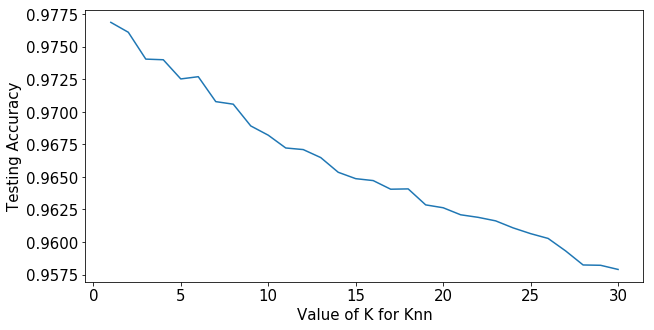

In [784]:
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rc('figure', figsize=(10,5))
matplotlib.rc('font', size= 15)

plt.plot(k_range, k_score)
plt.xlabel('Value of K for Knn')
plt.ylabel('Testing Accuracy')

In [786]:
print(X.shape, y.shape)

(101825, 46) (101825,)


In [787]:
from sklearn.cross_validation import cross_val_score
cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.82256025163817303

In [905]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier()
rfclf.fit(X_train, y_train)
y_pred = rfclf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.989467223177


In [906]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     35237
          1       0.98      0.94      0.96      5493

avg / total       0.99      0.99      0.99     40730



In [907]:
print(confusion_matrix(y_test, y_pred))

[[35145    92]
 [  337  5156]]


In [908]:
cross_val_score(rfclf, X, y, cv=10, scoring='accuracy').mean()

0.9228295543994951

In [909]:
my_list = y_test.tolist()
indices = [i for i, x in enumerate(my_list) if x == 1]
len(indices)

5493

In [910]:
prob_list_1 = pd.Series(rfclf.predict_proba(X_test)[indices, 1])

In [911]:
len(prob_list_1)

5493

In [912]:
pd.Series(prob_list_1).value_counts().sort_index(ascending=False)

1.00    4180
0.90     510
0.80     226
0.70     132
0.60     108
0.50      76
0.40      81
0.35       1
0.30      57
0.20      40
0.16       1
0.10      41
0.00      40
dtype: int64

In [913]:
4227+485+214+129+101+73

5229

In [914]:
imp = pd.Series(rfclf.feature_importances_)
imp_df = pd.DataFrame(imp.values, index = X_test.columns, columns=['Importance'])
imp_df

,Importance
original_dispute_amount,1.493557e-01
cum_days_out_standing,7.691755e-02
display_text_count,1.417578e-02
extended_cost_norm,2.456952e-02
unit_cost_norm,5.204846e-02
deduction_item_quantity,3.166644e-02
item_desc_count,2.608657e-02
planned_qty,4.403556e-02
paid_qty,1.050309e-01
variable_planned_amount,7.179589e-02


In [915]:
train_df_merge.merge_status.unique()

array([1, 2], dtype=int64)

In [916]:
train_df_merge['merge_mapped_value'] = train_df_merge.merge_status.map({1:0, 2:1})

In [917]:
train_df_merge.status_shortname.unique()

array(['Custom Mapping', 'Cross Reference Mapping'], dtype=object)

In [918]:
train_df_merge['status_shortname_mapped_value'] = train_df_merge.status_shortname.map({'Custom Mapping' : 0, 'Cross Reference Mapping' : 1})

In [919]:
#Feature Selection

feature_cols = ['original_dispute_amount', 'cum_days_out_standing', 'display_text_count', 
                'extended_cost_norm', 'unit_cost_norm', 'deduction_item_quantity',
                'item_desc_count', 'planned_qty', 'paid_qty', 'variable_planned_amount', 'fixed_planned_amount', 
                'min_date_diff', 'rank_display_text', 'rank_item_desc',
                'payer0', 'payer1', 'payer2', 'payer3', 'payer4', 'payer5', 'payer6', 'payer7',
                'merge_mapped_value',
                'status_shortname_mapped_value',
                'promotion_type_longname0', 'promotion_type_longname1', 'promotion_type_longname2', 'promotion_type_longname3',
                'promotion_type_longname4', 'promotion_type_longname5', 'promotion_type_longname6', 'promotion_type_longname7', 
                'promotion_type_longname8', 'promotion_type_longname9', 'promotion_type_longname10', 'promotion_type_longname11', 'promotion_type_longname12',
                'payment_type_longname0', 'payment_type_longname1', 'payment_type_longname2', 'payment_type_longname3',
                'payment_type_longname4', 'payment_type_longname5', 'payment_type_longname6']

X = train_df_merge[feature_cols]
y = train_df_merge['output_label']

In [920]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [921]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(61095, 44) (61095,) (40730, 44) (40730,)


In [922]:
rfclf = RandomForestClassifier()
rfclf.fit(X_train, y_train)
y_pred = rfclf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.989786398232


In [923]:
print(confusion_matrix(y_test, y_pred))

[[35147    94]
 [  322  5167]]


In [924]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     35241
          1       0.98      0.94      0.96      5489

avg / total       0.99      0.99      0.99     40730



In [925]:
print(cross_val_score(rfclf, X, y, cv=10, scoring='accuracy').mean())

0.92161247226


In [926]:
imp = pd.Series(rfclf.feature_importances_)
imp_df =pd.DataFrame(imp.values, index = X_test.columns, columns=['Importance'])
imp_df

,Importance
original_dispute_amount,0.145401
cum_days_out_standing,0.068202
display_text_count,0.014900
extended_cost_norm,0.020447
unit_cost_norm,0.038701
deduction_item_quantity,0.027990
item_desc_count,0.031293
planned_qty,0.072573
paid_qty,0.116038
variable_planned_amount,0.031728


In [930]:
check = pd.DataFrame.copy(train_df_merge)
check.shape

(101825, 88)

In [931]:
check.columns

Index(['pk_deduction_id', 'original_dispute_amount', 'cum_days_out_standing',
       'payer', 'posting_date', 'merge_status', 'cust_map_id_ded',
       'ded_display_text', 'prom_customer_map_id1', 'prom_display_text',
       'display_text_count', 'deduction_created_date', 'customer_claim_date',
       'invoice_date', 'promortion_execution_from_date',
       'promotion_execution_to_date', 'ship_start_date', 'ship_end_date',
       'extended_cost_norm', 'unit_cost_norm', 'deduction_item_quantity',
       'status_code', 'status_shortname', 'ddi_prod_hier1', 'item_desc_count',
       'promotion_id', 'commit_id', 'planned_qty', 'paid_qty',
       'variable_planned_amount', 'fixed_planned_amount',
       'fk_commit_payment_type_id', 'payment_type_longname',
       'promotion_type_id', 'promotion_type_longname', 'output_label',
       'customer_claim_date_min', 'customer_claim_date_max',
       'invoice_date_min', 'invoice_date_max',
       'promortion_execution_from_date_min',
       'promor

In [986]:
import numpy as np

unique_ded = check.pk_deduction_id.unique()
merge_df = pd.DataFrame()
    
for ded in unique_ded:
    temp_df = pd.DataFrame()
    temp_df = check.loc[check.pk_deduction_id == ded, ['pk_deduction_id', 'min_date_diff']]
    temp_df['rank_date_diff'] = np.nan
    temp_df.sort_values(by='min_date_diff', ascending=False, inplace=True)
    unique_date_diff = temp_df.min_date_diff.unique().tolist()
    temp_df.reset_index(inplace=True)
    temp_df.drop('index', axis=1, inplace=True)
    rank = 1
    
    temp_df.loc[temp_df.min_date_diff >= 0, 'rank_date_diff'] = 0
    
    for diff in unique_date_diff:
        if diff < 0:
            temp_df.loc[(temp_df.min_date_diff == diff) & (temp_df.rank_date_diff != 0), 'rank_date_diff'] = rank 
            rank +=1
   
    merge_df = pd.concat([merge_df, temp_df])      
   

In [992]:
print(merge_df.columns)
merge_df.shape

Index(['pk_deduction_id', 'min_date_diff', 'rank_date_diff'], dtype='object')


(101825, 3)

In [989]:
merge_df.reset_index(inplace=True)
merge_df.index

RangeIndex(start=0, stop=101825, step=1)

In [996]:
merge_df.drop_duplicates(inplace=True)
merge_df.shape

(5638, 3)

In [998]:
train_df_merge = pd.merge(train_df_merge, merge_df, how='left', on=['pk_deduction_id', 'min_date_diff'])

In [999]:
train_df_merge.shape

(101825, 89)

In [1001]:
#feature selection

feature_cols = ['original_dispute_amount', 'cum_days_out_standing', 'display_text_count', 
                'extended_cost_norm', 'unit_cost_norm', 'deduction_item_quantity',
                'item_desc_count', 'planned_qty', 'paid_qty', 'variable_planned_amount', 'fixed_planned_amount', 
                'min_date_diff', 'rank_display_text', 'rank_item_desc', 'rank_date_diff',
                'payer0', 'payer1', 'payer2', 'payer3', 'payer4', 'payer5', 'payer6', 'payer7',
                'merge_mapped_value',
                'status_shortname_mapped_value',
                'promotion_type_longname0', 'promotion_type_longname1', 'promotion_type_longname2', 'promotion_type_longname3',
                'promotion_type_longname4', 'promotion_type_longname5', 'promotion_type_longname6', 'promotion_type_longname7', 
                'promotion_type_longname8', 'promotion_type_longname9', 'promotion_type_longname10', 'promotion_type_longname11', 'promotion_type_longname12',
                'payment_type_longname0', 'payment_type_longname1', 'payment_type_longname2', 'payment_type_longname3',
                'payment_type_longname4', 'payment_type_longname5', 'payment_type_longname6']

X = train_df_merge[feature_cols]
y = train_df_merge['output_label']

In [1054]:

feature_cols = ['original_dispute_amount', 'cum_days_out_standing',  
                'extended_cost_norm', 'unit_cost_norm', 'deduction_item_quantity',
                'planned_qty', 'paid_qty', 'variable_planned_amount', 'fixed_planned_amount', 
                'min_date_diff', 'rank_display_text', 'rank_item_desc', 'rank_date_diff',
                
                'merge_mapped_value',
                'status_shortname_mapped_value',
                'promotion_type_longname0', 'promotion_type_longname1', 'promotion_type_longname2', 'promotion_type_longname3',
                'promotion_type_longname4', 'promotion_type_longname5', 'promotion_type_longname6', 'promotion_type_longname7', 
                'promotion_type_longname8', 'promotion_type_longname9', 'promotion_type_longname10', 'promotion_type_longname11', 'promotion_type_longname12',
                'payment_type_longname0', 'payment_type_longname1', 'payment_type_longname2', 'payment_type_longname3',
                'payment_type_longname4', 'payment_type_longname5', 'payment_type_longname6']

X = train_df_merge[feature_cols]
y = train_df_merge['output_label']

In [1199]:
train_df_merge.unit_cost_norm.value_counts().sort_index()[0.000000]

567

In [1065]:
train_df_merge.extended_cost_norm.value_counts().sort_index()[0.000000]

372

In [1075]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 40)

In [1076]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(61095, 35) (61095,) (40730, 35) (40730,)


In [1077]:
rfclf = RandomForestClassifier(random_state = 50)
rfclf.fit(X_train, y_train)
y_pred = rfclf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.99118585809


In [1082]:
print(confusion_matrix(y_test, y_pred))

[[35208    85]
 [  274  5163]]


In [1081]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     35293
          1       0.98      0.95      0.97      5437

avg / total       0.99      0.99      0.99     40730



In [1080]:
print(cross_val_score(rfclf, X, y, cv=10, scoring='accuracy').mean())

0.925923630112


In [1008]:
imp = pd.Series(rfclf.feature_importances_)
imp_df =pd.DataFrame(imp.values, index = X_test.columns, columns=['Importance'])
imp_df

,Importance
original_dispute_amount,0.100614
cum_days_out_standing,0.060908
display_text_count,0.021256
extended_cost_norm,0.027431
unit_cost_norm,0.048913
deduction_item_quantity,0.030857
item_desc_count,0.027669
planned_qty,0.055272
paid_qty,0.058392
variable_planned_amount,0.054730


In [1094]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

def get_results(lr,x_data,y_data):
    skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=2)
    recall_scores_minus_one = []
    recall_score_one = []
    precision_scores_minus_one = []
    precision_score_one = []
    for train_index,test_index in skf.split(x_data,y_data):
        X_train, X_test = x_data[train_index], x_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        #sm = SMOTE(ratio=0.4,random_state=42,k_neighbors=10) 
        #X_train, y_train = sm.fit_sample(X_train,y_train)
        clf=lr.fit(X_train,y_train)
        pred = lr.predict(X_test)
        recall_scores_minus_one.append(metrics.recall_score(y_test, pred, pos_label = 0))
        recall_score_one.append(metrics.recall_score(y_test, pred, pos_label = 1))
        precision_scores_minus_one.append(metrics.precision_score(y_test, pred, pos_label = 0))
        precision_score_one.append(metrics.precision_score(y_test, pred, pos_label = 1))
        print(confusion_matrix(y_test,pred))
        print(classification_report(y_test,pred))
        print("recall for 0:")
        print(metrics.recall_score(y_test, pred, pos_label = 0))
        print("recall for +1:")
        print(metrics.recall_score(y_test, pred, pos_label = 1))
        print("precison for 0:")
        print(metrics.precision_score(y_test, pred, pos_label = 0))
        print("precison for +1:")
        print(metrics.precision_score(y_test, pred, pos_label = 1))
    print("average scores:")
    print(sum(recall_scores_minus_one)/len(recall_scores_minus_one))
    print(sum(recall_score_one)/len(recall_score_one))
    print(sum(precision_scores_minus_one)/len(precision_scores_minus_one))
    print(sum(precision_score_one)/len(precision_score_one))
get_results(rfclf, X.values, y.values)

[[8795   18]
 [  50 1321]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      8813
          1       0.99      0.96      0.97      1371

avg / total       0.99      0.99      0.99     10184

recall for 0:
0.997957562691
recall for +1:
0.963530269876
precison for 0:
0.994347088751
precison for +1:
0.986557132188
[[8791   21]
 [  41 1330]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8812
          1       0.98      0.97      0.98      1371

avg / total       0.99      0.99      0.99     10183

recall for 0:
0.997616886064
recall for +1:
0.970094821298
precison for 0:
0.995357789855
precison for +1:
0.984455958549
[[8787   25]
 [  51 1320]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      8812
          1       0.98      0.96      0.97      1371

avg / total       0.99      0.99      0.99     10183

recall for 0:
0.997162959601
r

In [1070]:
feature_automate = ['original_dispute_amount',
 'cum_days_out_standing',

 'extended_cost_norm',
 'unit_cost_norm',
 'deduction_item_quantity',
 
 'planned_qty',
 'paid_qty',
 'variable_planned_amount',
 'fixed_planned_amount',
 'min_date_diff',
 'rank_display_text',
 'rank_item_desc',
 'rank_date_diff',
 'merge_mapped_value',
 'status_shortname_mapped_value',

 'promotion_type_longname',
 'payment_type_longname',
 'output_label'
]

train_df_automate = train_df_merge[feature_automate]
train_df_automate.shape

(101825, 18)

In [1071]:
train_df_automate.to_csv("E:/Jami1/GP1/Model/Model_data/training_data_automate.csv")

In [1112]:
set(train_df_automate.columns.tolist())-set(['cum_days_out_standing', 'deduction_item_quantity', 'extended_cost_norm', 'fixed_planned_amount', 'merge_mapped_value', 'min_date_diff', 'original_dispute_amount', 'paid_qty', 'payment_type_longname', 'planned_qty', 'promotion_type_longname', 'rank_date_diff', 'rank_display_text', 'rank_item_desc'])

{'output_label',
 'status_shortname_mapped_value',
 'unit_cost_norm',
 'variable_planned_amount'}

In [1148]:
feature_cols = ['original_dispute_amount', 'cum_days_out_standing',  
                'extended_cost_norm', 'unit_cost_norm', 'deduction_item_quantity',
                'planned_qty', 'paid_qty', 'variable_planned_amount', 'fixed_planned_amount', 
                'min_date_diff', 'rank_display_text', 'rank_item_desc', 'rank_date_diff',
                
                'merge_mapped_value',
                'status_shortname_mapped_value',
                'promotion_type_longname0', 'promotion_type_longname1', 'promotion_type_longname2', 'promotion_type_longname3',
                'promotion_type_longname4', 'promotion_type_longname5', 'promotion_type_longname6', 'promotion_type_longname7', 
                'promotion_type_longname8', 'promotion_type_longname9', 'promotion_type_longname10', 'promotion_type_longname11', 'promotion_type_longname12',
                'payment_type_longname0', 'payment_type_longname1', 'payment_type_longname2', 'payment_type_longname3',
                'payment_type_longname4', 'payment_type_longname5', 'payment_type_longname6']

X = train_df_merge[feature_cols]
y = train_df_merge['output_label']

In [1149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 40)

In [1150]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(61095, 35) (61095,) (40730, 35) (40730,)


In [1151]:
rfclf = RandomForestClassifier(random_state = 50)
rfclf.fit(X_train, y_train)
y_pred = rfclf.predict(X_test)
#print(accuracy_score(y_test, y_pred))

In [1340]:

feature_cols = ['original_dispute_amount', 'cum_days_out_standing',  
                'extended_cost_norm', 'deduction_item_quantity',
                'planned_qty', 'paid_qty', 'fixed_planned_amount', 
                'min_date_diff', 'rank_display_text', 'rank_item_desc', 'rank_date_diff',
                
                'merge_mapped_value',
                
                'promotion_type_longname0', 'promotion_type_longname1', 'promotion_type_longname2', 'promotion_type_longname3',
                'promotion_type_longname4', 'promotion_type_longname5', 'promotion_type_longname6', 'promotion_type_longname7', 
                'promotion_type_longname8', 'promotion_type_longname9', 'promotion_type_longname10', 'promotion_type_longname11', 'promotion_type_longname12',
                'payment_type_longname0', 'payment_type_longname1', 'payment_type_longname2', 'payment_type_longname3',
                'payment_type_longname4', 'payment_type_longname5', 'payment_type_longname6']

X1 = train_df_merge[feature_cols]
y1 = train_df_merge['output_label']

In [1341]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1)

In [1342]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(91642, 32) (91642,) (10183, 32) (10183,)


In [1348]:
X_train = train_df_merge[feature_cols][10183:]
y_train = train_df_merge['output_label'][10183:]
X_test = train_df_merge[feature_cols][:10183]
y_test = train_df_merge['output_label'][:10183]


In [1349]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(91642, 32) (91642,) (10183, 32) (10183,)


In [1351]:
rfclf1 = RandomForestClassifier()
rfclf1.fit(X_train, y_train)
y_pred = rfclf1.predict(X_test)

In [1352]:
print(confusion_matrix(y_test, y_pred))

[[9644   44]
 [ 427   68]]


In [1353]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      9688
          1       0.61      0.14      0.22       495

avg / total       0.94      0.95      0.94     10183



In [1196]:
print(cross_val_score(rfclf1, X1, y1, cv=5, scoring='recall',))

[ 0.27800073  1.          0.44180956  0.60269974  0.45328467]


In [1158]:
print(cross_val_score(rfclf, X, y, cv=10, scoring='recall'))

[ 0.02115244  0.42304887  1.          0.99270605  0.57007299  0.42773723
  0.86861314  1.          0.98321168  0.53065693]


In [1159]:
print(cross_val_score(rfclf1, X1, y1, cv=10, scoring='accuracy'))

[ 0.86645719  0.83148385  0.94873809  0.94500638  0.86711844  0.92182282
  0.95403654  1.          0.92015321  0.93802789]


In [1160]:
print(cross_val_score(rfclf, X, y, cv=10, scoring='accuracy'))

[ 0.86763551  0.80997741  0.96680742  0.94392615  0.92663524  0.90964447
  0.91887645  1.          0.98330387  0.93242978]


In [1202]:
train_df_merge['cal_planned_amount'] = train_df_merge['fixed_planned_amount'] + train_df_merge['variable_planned_amount']

In [ ]:
'promotion_type_longname0', 'promotion_type_longname1', 'promotion_type_longname2', 'promotion_type_longname3',
                'promotion_type_longname4', 'promotion_type_longname5', 'promotion_type_longname6', 'promotion_type_longname7', 
                'promotion_type_longname8', 'promotion_type_longname9', 'promotion_type_longname10', 'promotion_type_longname11', 'promotion_type_longname12',
          'merge_mapped_value', 

In [1314]:

feature_cols = ['original_dispute_amount', 'cum_days_out_standing',  
                 'deduction_item_quantity', 'unit_cost_norm', 'extended_cost_norm',
                'planned_qty',  'variable_planned_amount', 'fixed_planned_amount',
                 'rank_display_text', 'rank_item_desc', 'rank_date_diff','min_date_diff', 'display_text_count', 'item_desc_count',
                'status_shortname_mapped_value',   'merge_mapped_value', 
              
                
                
                'payment_type_longname0', 'payment_type_longname1', 'payment_type_longname2', 'payment_type_longname3',
                'payment_type_longname4', 'payment_type_longname5', 'payment_type_longname6']

X2 = train_df_merge[feature_cols]
y2 = train_df_merge['output_label']

In [1315]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=40)

In [1316]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(71277, 23) (71277,) (30548, 23) (30548,)


In [1317]:
rfclf2 = RandomForestClassifier(random_state=10)
rfclf2.fit(X_train, y_train)
y_pred = rfclf2.predict(X_test)

In [1318]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     26468
          1       0.99      0.95      0.97      4080

avg / total       0.99      0.99      0.99     30548



In [1319]:
print(confusion_matrix(y_test, y_pred))

[[26414    54]
 [  210  3870]]


In [1320]:
impt = pd.Series(rfclf2.feature_importances_)
imp_df1 =pd.DataFrame(impt.values, index = X_test.columns, columns=['Importance'])
imp_df1

,Importance
original_dispute_amount,0.176363
cum_days_out_standing,0.057351
deduction_item_quantity,0.028648
unit_cost_norm,0.046210
extended_cost_norm,0.020337
planned_qty,0.047959
variable_planned_amount,0.038874
fixed_planned_amount,0.079183
rank_display_text,0.037936
rank_item_desc,0.025424


In [1329]:
my_list = y_test.tolist()
indices = [i for i, x in enumerate(my_list) if x == 1]
len(indices)

4080

In [1330]:
pd.Series(prob_list_1).value_counts().sort_index(ascending=False)

1.000    3228
0.900     329
0.800     142
0.700      94
0.600      77
0.500      54
0.475       1
0.400      44
0.340       1
0.305       1
0.300      28
0.200      26
0.100      37
0.000      18
dtype: int64

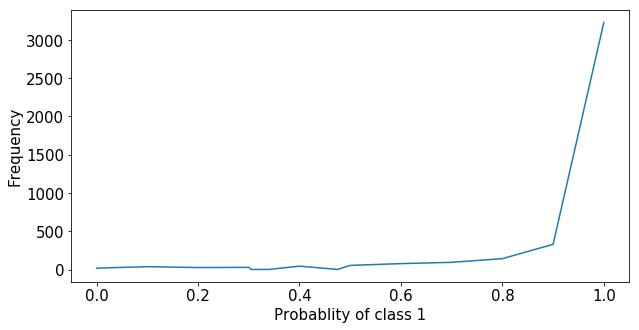

In [1333]:
prob_list_1 = pd.Series(rfclf2.predict_proba(X_test)[indices, 1])
plt.plot(pd.Series(prob_list_1).value_counts().sort_index(ascending=False))
plt.xlabel('Probablity of class 1')
plt.ylabel('Frequency')

In [1386]:
train_df_sort = pd.DataFrame.copy(train_df_merge)
train_df_sort.shape

(101825, 90)

In [1521]:
train_df_sort.sort_values(by='pk_deduction_id', inplace=True)

In [1563]:

feature_cols = ['original_dispute_amount', 'cum_days_out_standing',  
                 'deduction_item_quantity', 'unit_cost_norm', 'extended_cost_norm',
                'planned_qty',  'variable_planned_amount', 'fixed_planned_amount',
                 'display_text_count', 'rank_item_desc', 'rank_date_diff','min_date_diff', 'display_text_count', 'item_desc_count',
                'status_shortname_mapped_value',   'merge_mapped_value', 
              
                
                
                'payment_type_longname0', 'payment_type_longname1', 'payment_type_longname2', 'payment_type_longname3',
                'payment_type_longname4', 'payment_type_longname5', 'payment_type_longname6']

X_sort = train_df_sort[feature_cols]
y_sort = train_df_sort['output_label']


In [1535]:
X_train, X_test, y_train, y_test = train_test_split(X_sort, y_sort, test_size=0.3, random_state=40)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(71277, 23) (71277,) (30548, 23) (30548,)


In [1536]:
clf = RandomForestClassifier(random_state=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.990506743486


In [1537]:
print(cross_val_score(clf, X_sort, y_sort, cv=10, scoring='recall'))

[ 0.04595186  0.42742524  1.          0.99854121  0.56934307  0.48613139
  0.84817518  1.          0.98467153  0.28759124]


In [1538]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     26533
          1       0.98      0.95      0.96      4015

avg / total       0.99      0.99      0.99     30548



In [1870]:
all_ded = train_df_sort.pk_deduction_id.unique().tolist()

In [1999]:
train_ded = all_ded[:650]
test_ded = all_ded[650:]

In [2000]:

feature_cols = ['original_dispute_amount', 'cum_days_out_standing',  
                 'deduction_item_quantity', 'unit_cost_norm', 'extended_cost_norm',
                'planned_qty',  'variable_planned_amount', 'fixed_planned_amount',
                 'rank_display_text', 'min_date_diff','rank_date_diff', 'display_text_count', 'item_desc_count', 'rank_item_desc',
                'status_shortname_mapped_value',  'merge_mapped_value', 
              
                
                'promotion_type_longname0', 'promotion_type_longname1', 'promotion_type_longname2', 'promotion_type_longname3',
                'promotion_type_longname4', 'promotion_type_longname5', 'promotion_type_longname6', 'promotion_type_longname7', 
                'promotion_type_longname8', 'promotion_type_longname9', 'promotion_type_longname10', 'promotion_type_longname11', 'promotion_type_longname12',
          
                'payment_type_longname0', 'payment_type_longname1', 'payment_type_longname2', 'payment_type_longname3',
                'payment_type_longname4', 'payment_type_longname5', 'payment_type_longname6']


X_train = train_df_merge.loc[train_df_merge.pk_deduction_id.isin(train_ded), feature_cols]
y_train = train_df_merge.loc[train_df_merge.pk_deduction_id.isin(train_ded), 'output_label']

test_cols = feature_cols
l = ['pk_deduction_id', 'commit_id', 'output_label']
test_cols.extend(l)
X_test = train_df_merge.loc[train_df_merge.pk_deduction_id.isin(test_ded), test_cols]
y_test = train_df_merge.loc[train_df_merge.pk_deduction_id.isin(test_ded), 'output_label']


In [2001]:
X_test.columns

Index(['original_dispute_amount', 'cum_days_out_standing',
       'deduction_item_quantity', 'unit_cost_norm', 'extended_cost_norm',
       'planned_qty', 'variable_planned_amount', 'fixed_planned_amount',
       'rank_display_text', 'min_date_diff', 'rank_date_diff',
       'display_text_count', 'item_desc_count', 'rank_item_desc',
       'status_shortname_mapped_value', 'merge_mapped_value',
       'promotion_type_longname0', 'promotion_type_longname1',
       'promotion_type_longname2', 'promotion_type_longname3',
       'promotion_type_longname4', 'promotion_type_longname5',
       'promotion_type_longname6', 'promotion_type_longname7',
       'promotion_type_longname8', 'promotion_type_longname9',
       'promotion_type_longname10', 'promotion_type_longname11',
       'promotion_type_longname12', 'payment_type_longname0',
       'payment_type_longname1', 'payment_type_longname2',
       'payment_type_longname3', 'payment_type_longname4',
       'payment_type_longname5', 'payment_t

In [1979]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(55863, 36) (55863,) (45962, 39) (45962,)


In [1982]:
clf = RandomForestClassifier(random_state=10)
clf.fit(X_train, y_train)
X_test_new = X_test.drop(['pk_deduction_id', 'commit_id', 'output_label'], axis=1)
y_pred = clf.predict(X_test_new)
print(accuracy_score(y_test, y_pred))

0.910752360646


In [1983]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95     40244
          1       0.66      0.58      0.62      5718

avg / total       0.91      0.91      0.91     45962



In [1985]:
df_test = pd.DataFrame.copy(X_test[['pk_deduction_id', 'commit_id', 'output_label']])
df_test.shape

(45962, 3)

In [1989]:
df_test.reset_index(inplace=True)
df_test.drop('index', axis=1, inplace=True)
df_test.head()

,pk_deduction_id,commit_id,output_label
0,17281229,7889393,0
1,17281229,7889441,0
2,17281229,7889447,0
3,17281229,7889468,0
4,17281229,7891400,0


In [1991]:
df_test['prediction'] = y_pred
df_test.head()

,pk_deduction_id,commit_id,output_label,prediction
0,17281229,7889393,0,0
1,17281229,7889441,0,0
2,17281229,7889447,0,1
3,17281229,7889468,0,0
4,17281229,7891400,0,0


In [2219]:
df_test['probability'] = clf.predict_proba(X_test_new)[:,1]
df_test.groupby('pk_deduction_id').probability.max().reset_index()


,pk_deduction_id,probability
0,17281229,0.9
1,17281241,0.0
2,17281244,0.4
3,17281250,0.9
4,17281268,1.0
5,17281271,1.0
6,17281274,0.6
7,17281277,1.0
8,17281307,0.9
9,17281337,1.0


In [1997]:
df_test.pk_deduction_id.nunique()

277

In [1877]:
my_list = y_test.tolist()
indices = [i for i, x in enumerate(my_list) if x == 1]


prob_list_1 = pd.Series(clf.predict_proba(X_test)[indices, 1])
pd.Series(prob_list_1).value_counts().sort_index(ascending=False)

1.000      77
0.900     564
0.800     523
0.700     463
0.600    1690
0.500     917
0.400     761
0.300     526
0.275       1
0.200      44
0.150       1
0.100      72
0.000      79
dtype: int64

In [1888]:
len(indices)

5718

In [1954]:
prob = pd.DataFrame({'prediction' : y_pred.tolist(), 'probabilty' : pd.Series(clf.predict_proba(X_test)[:,1]).tolist()})
prob.shape

(45962, 2)

In [1955]:
prob_df = pd.DataFrame.copy(prob)
prob_df.loc[prob_df.probabilty >= 0.3, 'prediction'] = 1
prob_df.shape

(45962, 2)

In [1957]:
y_pred_new = prob_df.prediction
print(classification_report(y_test, y_pred_new))

             precision    recall  f1-score   support

          0       0.99      0.88      0.93     40244
          1       0.52      0.97      0.68      5718

avg / total       0.94      0.89      0.90     45962



In [1953]:
print(confusion_matrix(y_test, y_pred_new))

[[35246  4998]
 [  197  5521]]


In [2549]:
#Feature Evaluation
from sklearn.metrics import recall_score, precision_score, f1_score

In [2142]:
train_df_merge['min_dispute_amt'] = train_df_merge[['original_dispute_amount', 'extended_cost_norm']].min(axis=1)

In [3400]:
all_ded = train_df_merge.pk_deduction_id.unique().tolist()
#all_ded.remove(17467385)
#all_ded.remove(16026461)

In [3401]:
from random import shuffle
from sklearn.preprocessing import binarize

def train_test_size(n_train_ded):
    shuffle(all_ded)
    train_ded = all_ded[:n_train_ded]
    test_ded = all_ded[n_train_ded:]
    
    if 17467385 in test_ded:
        test_ded.remove(17467385)
        train_ded.append(17467385)
        
    if 16026461 in test_ded:
        test_ded.remove(16026461)
        train_ded.append(16026461)
           
    
    return train_ded, test_ded

In [3402]:
  'original_dispute_amount', 'extended_cost_norm', 'fixed_planned_amount',  'promotion_type_longname0', 'promotion_type_longname1', 'promotion_type_longname2', 'promotion_type_longname3',
                'promotion_type_longname4', 'promotion_type_longname5', 'promotion_type_longname6', 'promotion_type_longname7', 
                'promotion_type_longname8', 'promotion_type_longname9', 'promotion_type_longname10', 'promotion_type_longname11', 'promotion_type_longname12',
          
        
        'merge_mapped_value', 
        if 17467385 in test_ded:
        train_ded.append(17467385)
        test_ded.remove(17467385)
    if 16026461 in test_ded:
        train_ded.append(16026461)
        test_ded.remove(16026461)
        
        
        
        
        
                        'payment_type_longname0',  'payment_type_longname2', 'payment_type_longname3',
                        'payment_type_longname5', 'payment_type_longname6',



                        'promotion_type_longname1', 'promotion_type_longname2',
                        'promotion_type_longname3', 'promotion_type_longname4',
                        'promotion_type_longname5', 'promotion_type_longname6'
                        
                        'rank_display_text', 'item_dsec_count', 'rank_item_desc', 'original_dispute_amount',
                        'cal_planned_amount', 


                       'cum_days_out_standing', 'unit_cost_norm', 'planned_qty',  'cal_planned_amount', 
                       'min_date_diff','rank_date_diff', 
                       'status_shortname_mapped_value',  'merge_mapped_value'

                    
                optional_list = [
                'deduction_item_quantity', 'promotion_type_longname_new7',
                'promotion_type_longname_new0','promotion_type_longname_new8', 
                'variable_planned_amount', 'fixed_planned_amount',
                'display_text_count', 'rank_display_text', 'item_desc_count', 'rank_item_desc',
                'original_dispute_amount', 'extended_cost_norm'
                ]


#Remove : payment_type_longname1, payment_type_longname4,  'variable_planned_amount', fixed_planned_amount
#Keep : display_text_count, 'rank_display_text, item_dsec_count, 'rank_item_desc', 'original_dispute_amount',cal_planned_amont
    
    
compulsary_list = [
                    
                   'cum_days_out_standing', 'unit_cost_norm', 'planned_qty',  'cal_planned_amount', 
                   'min_date_diff','rank_date_diff', 
                   'status_shortname_mapped_value',  'merge_mapped_value',


                    'payment_type_longname0',  'payment_type_longname2', 'payment_type_longname3',
                    'payment_type_longname5', 'payment_type_longname6',



                    'promotion_type_longname_new1', 'promotion_type_longname_new2',
                    'promotion_type_longname_new3', 'promotion_type_longname_new4',
                    'promotion_type_longname_new5', 'promotion_type_longname_new6'
                    'promotion_type_longname_new7'
                    
                  ]

IndentationError: unexpected indent (<ipython-input-3402-3983b9167440>, line 2)

In [3403]:
final_removal = [
                'deduction_item_quantity', 'extended_cost_norm', 
                
                'merge_mapped_value', 'status_shortname_mapped_value',
    
                'variable_planned_amount', 'fixed_planned_amount',
    
                'promotion_type_longname0','promotion_type_longname1', 'promotion_type_longname2',
                'promotion_type_longname3', 'promotion_type_longname4',  'promotion_type_longname5',
                'promotion_type_longname6', 'promotion_type_longname7', 'promotion_type_longname8' 
                'promotion_type_longname9', 'promotion_type_longname10', 'promotion_type_longname11'
                'promotion_type_longname12',
                
    
                'payment_type_longname1', 'payment_type_longname2',
                'payment_type_longname4',  'payment_type_longname6'
            
                ]  
               

In [3404]:
from sklearn.ensemble import BaggingClassifier
train_df_merge.shape

(101825, 91)

In [3405]:
def model(size):
    ded_check = [[]] * 5
       
    for i in range(0,5):
        
        
        model_name = 'Model_' + str(i+1)
        print('\n',model_name,'\n')
        feature_cols = [
                       
                       'display_text_count', 'rank_display_text', 'item_desc_count', 'rank_item_desc', 'original_dispute_amount',
                        'cal_planned_amount',


                       'cum_days_out_standing', 'unit_cost_norm', 'planned_qty',   
                       'min_date_diff','rank_date_diff', 
                        

                        'payment_type_longname0',   'payment_type_longname3',
                        'payment_type_longname5' 

                                              
                       ]

        
        if i == 0:
            temp_df = pd.DataFrame(columns=['model_number', 'accuracy', 'TN', 'FP', 'FN', 'TP', 'recall_0', 'recall_1', 'precision_0', 'precision_1', 'f1_score_0', 'f1_score_1', 'percentage'])
            imp_feat = pd.DataFrame(columns=['feature_name', 'imp_model_1', 'imp_model_2', 'imp_model_3', 'imp_model_4', 'imp_model_5'])
            imp_feat['feature_name'] = pd.Series(feature_cols)
        

        train_ded, test_ded = train_test_size(size)
        ded_check[i] = train_ded
        

        X_train = train_df_merge.loc[train_df_merge.pk_deduction_id.isin(train_ded), feature_cols]
        y_train = train_df_merge.loc[train_df_merge.pk_deduction_id.isin(train_ded), 'output_label']

        test_cols = feature_cols
        l = ['pk_deduction_id', 'commit_id', 'output_label']
        test_cols.extend(l)
        X_test = train_df_merge.loc[train_df_merge.pk_deduction_id.isin(test_ded), test_cols]
        y_test = train_df_merge.loc[train_df_merge.pk_deduction_id.isin(test_ded), 'output_label']


        print('Training and testing size : ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

        
        
        clf = RandomForestClassifier()
        #clf = BaggingClassifier(RandomForestClassifier(n_estimators=100, random_state=200, warm_start=True))
        clf.fit(X_train, y_train)
        X_test_new = X_test.drop(['pk_deduction_id', 'commit_id', 'output_label'], axis=1)
        y_pred = clf.predict(X_test_new)
        y_pred_prob_1 = clf.predict_proba(X_test_new)[:, 1]
        y_pred = binarize([y_pred_prob_1], 0.29)[0]
        
        
        
        df_test = pd.DataFrame.copy(X_test[['pk_deduction_id', 'commit_id', 'output_label']])
        df_test['probability'] = clf.predict_proba(X_test_new)[:,1]
        df_test = df_test.groupby('pk_deduction_id').probability.max().reset_index()
        df_test_new = df_test.loc[df_test.probability >= 0.3]
        ded = df_test_new.pk_deduction_id.nunique()
        total_ded = df_test.pk_deduction_id.nunique()
        ratio = ded/total_ded

        temp_df.loc[i, 'percentage'] = ratio
        
                
        print('--------------------------------------------------------------------------------------------------------')
        
        #Dataframe entries
        
        temp_df.loc[i, 'model_number'] = model_name
        accuracy = accuracy_score(y_test, y_pred)
        
        temp_df.loc[i, 'accuracy'] = accuracy
        
        confusion = metrics.confusion_matrix(y_test, y_pred)
        TP = confusion[1, 1]
        TN = confusion[0, 0]
        FP = confusion[0, 1]
        FN = confusion[1, 0]
        temp_df.loc[i, 'TN'] = TN
        temp_df.loc[i, 'FP'] = FP
        temp_df.loc[i, 'FN'] = FN
        temp_df.loc[i, 'TP'] = TP
        
        recall0 = recall_score(y_test, y_pred, pos_label=0)
        recall1 = recall_score(y_test, y_pred, pos_label=1)
        
        precision0 = precision_score(y_test, y_pred, pos_label=0)
        precision1 = precision_score(y_test, y_pred, pos_label=1)
        
        f1_score0 = f1_score(y_test, y_pred, pos_label=0)
        f1_score1 = f1_score(y_test, y_pred, pos_label=1)
        
        temp_df.loc[i, 'recall_0'] = recall0
        temp_df.loc[i, 'recall_1'] = recall1
        
        temp_df.loc[i, 'precision_0'] = precision0
        temp_df.loc[i, 'precision_1'] = precision1
        
        temp_df.loc[i, 'f1_score_0'] = f1_score0
        temp_df.loc[i, 'f1_score_1'] = f1_score1
        
        importance = clf.feature_importances_
        model_imp_name = 'imp_model_' + str(i+1)
        imp_feat[model_imp_name] = pd.Series(importance).values * 100
        
            
        
        
    return temp_df, imp_feat, ded_check

In [3406]:
df_model, df_imp , ded_check = model(700)


 Model_1 

Training and testing size :  (88316, 14) (88316,) (13509, 17) (13509,)
--------------------------------------------------------------------------------------------------------

 Model_2 

Training and testing size :  (90254, 14) (90254,) (11571, 17) (11571,)
--------------------------------------------------------------------------------------------------------

 Model_3 

Training and testing size :  (85299, 14) (85299,) (16526, 17) (16526,)
--------------------------------------------------------------------------------------------------------

 Model_4 

Training and testing size :  (80608, 14) (80608,) (21217, 17) (21217,)
--------------------------------------------------------------------------------------------------------

 Model_5 

Training and testing size :  (86875, 14) (86875,) (14950, 17) (14950,)
--------------------------------------------------------------------------------------------------------


In [3407]:
df_model

,model_number,accuracy,TN,FP,FN,TP,recall_0,recall_1,precision_0,precision_1,f1_score_0,f1_score_1,percentage
0,Model_1,0.943889,11933,522,236,818,0.958089,0.776091,0.980606,0.610448,0.969217,0.683375,0.90708
1,Model_2,0.962665,10582,295,137,557,0.972879,0.802594,0.987219,0.653756,0.979996,0.720569,0.876106
2,Model_3,0.904151,13807,1221,363,1135,0.918752,0.757677,0.974382,0.481749,0.94575,0.588998,0.90708
3,Model_4,0.876703,17618,1488,1128,983,0.922119,0.465656,0.939827,0.397815,0.930889,0.42907,0.920705
4,Model_5,0.939866,13042,614,285,1009,0.955038,0.779753,0.978615,0.621688,0.966683,0.691807,0.920354


In [3408]:
all_model_ded = ded_check[0] + ded_check[1] + ded_check[2] + ded_check[4]
model_check_ded = ded_check[3]
print(len(all_model_ded))
print(len(model_check_ded))
set(model_check_ded)-set(all_model_ded)

2804
700


{14568014}

In [3418]:
train_df_merge.loc[train_df_merge.pk_deduction_id == 14568014, 'output_label']

12923    0
12924    0
12925    0
12926    1
12927    0
12928    0
12929    0
12930    0
12931    0
12932    0
Name: output_label, dtype: int32

In [3409]:
df_imp

,feature_name,imp_model_1,imp_model_2,imp_model_3,imp_model_4,imp_model_5
0,display_text_count,2.291651,1.719284,3.715817,2.240466,2.565589
1,rank_display_text,1.807330,4.430731,2.256399,2.829968,4.017637
2,item_desc_count,5.132344,4.907471,2.358326,3.300055,2.588878
3,rank_item_desc,3.348918,2.827568,1.935154,2.398330,3.043932
4,original_dispute_amount,17.778866,12.989592,17.079966,10.791575,17.062655
5,cal_planned_amount,6.465525,6.004306,5.838202,6.467716,5.834377
6,cum_days_out_standing,9.626207,9.359652,11.217164,9.792091,7.099501
7,unit_cost_norm,5.828465,7.830988,5.460870,3.211124,4.905591
8,planned_qty,17.189453,13.645964,19.310951,24.277943,19.749331
9,min_date_diff,7.988562,14.318721,11.991332,18.259438,11.961572


In [2387]:
train_df_merge.groupby('pk_deduction_id').commit_id.count().reset_index().sort_values(by='commit_id', ascending=False).head()

,pk_deduction_id,commit_id
821,17467385,25819
219,16026461,13556
822,17467415,5750
218,16026458,2732
197,14893181,1917


In [2386]:
ch = train_df_merge.groupby('pk_deduction_id').output_label.sum().reset_index()
ch[ch.pk_deduction_id == 17467385]


,pk_deduction_id,output_label
821,17467385,3745


In [2348]:
train_df_merge[(train_df_merge.pk_deduction_id == 16026461) & (train_df_merge.output_label == 1)].shape

(3835, 91)

In [2568]:
import itertools
t = list(itertools.permutations(['min_dispute_amt' ,'cum_days_out_standing', 'deduction_item_quantity']))


In [2602]:
import itertools

lst = ['min_dispute_amt' ,'cum_days_out_standing', 'deduction_item_quantity']
combs = []

for i in np.arange(1, len(lst)+1):
    #combs.append(i)
    els = [list(x) for x in itertools.combinations(lst, i)]
    combs.extend(els)

In [2603]:
len(combs)

7

In [2627]:
for i in combs:
    print(i)

['min_dispute_amt']
['cum_days_out_standing']
['deduction_item_quantity']
['min_dispute_amt', 'cum_days_out_standing']
['min_dispute_amt', 'deduction_item_quantity']
['cum_days_out_standing', 'deduction_item_quantity']
['min_dispute_amt', 'cum_days_out_standing', 'deduction_item_quantity']


In [2607]:
2**23

8388608

In [2608]:
all_ded1 = train_df_merge.pk_deduction_id.unique().tolist()
all_ded1.remove(17467385)
all_ded1.remove(16026461)

In [2612]:
check = train_df_merge.loc[train_df_merge.pk_deduction_id.isin(all_ded1), :]

In [2615]:
check.shape

(62450, 91)

In [2613]:
check.payment_type_longname.value_counts()

SCAN           25235
BILLBACK        9012
FIXED           8828
OFF INVOICE     6295
NET BILL        5906
SPIKE OI        4780
MISC            2394
Name: payment_type_longname, dtype: int64

In [2614]:
check.promotion_type_longname.value_counts()

FEATURE/DISPLAY            28249
EDLP                       16123
FEATURE                    12191
EDLP SPIKE                  2209
TPR                         1705
CONVERSION                   743
DISPLAY                      683
NEW DISTRIBUTIO              332
SLOW MOVING/OBS              174
INCENTIVES                    23
VOLUME DISCOUNT PROGRAM       11
COUPON BOOKS                   4
IN-STORE COUPON                3
Name: promotion_type_longname, dtype: int64

In [2617]:
check.loc[check.promotion_type_longname.isin(['SLOW MOVING/OBS', 'INCENTIVES', 'VOLUME DISCOUNT PROGRAM', 'COUPON BOOKS', 'IN-STORE COUPON']), 'promotion_type_longname'] = 'others'

C:\Users\suraj.kumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [2618]:
check.promotion_type_longname.value_counts()

FEATURE/DISPLAY    28249
EDLP               16123
FEATURE            12191
EDLP SPIKE          2209
TPR                 1705
CONVERSION           743
DISPLAY              683
NEW DISTRIBUTIO      332
others               215
Name: promotion_type_longname, dtype: int64

In [2621]:
unique_prom_type = sorted(check.promotion_type_longname.unique())

temp = pd.DataFrame()
temp['promotion_type_longname'] = check.promotion_type_longname
for col in unique_prom_type:
    col_name = 'promotion_type_longname_new' + str(unique_prom_type.index(col))
    temp[col_name] = pd.get_dummies(check.promotion_type_longname)[col]
    
temp.shape

(62450, 10)

In [2622]:
temp.drop_duplicates(inplace=True)
temp.shape

(9, 10)

In [2624]:
check = pd.merge(check, temp, how='left', on='promotion_type_longname')
check.shape

(62450, 100)

In [2749]:
check.columns

Index(['pk_deduction_id', 'original_dispute_amount', 'cum_days_out_standing',
       'payer', 'posting_date', 'merge_status', 'cust_map_id_ded',
       'ded_display_text', 'prom_customer_map_id1', 'prom_display_text',
       'display_text_count', 'deduction_created_date', 'customer_claim_date',
       'invoice_date', 'promortion_execution_from_date',
       'promotion_execution_to_date', 'ship_start_date', 'ship_end_date',
       'extended_cost_norm', 'unit_cost_norm', 'deduction_item_quantity',
       'status_code', 'status_shortname', 'ddi_prod_hier1', 'item_desc_count',
       'promotion_id', 'commit_id', 'planned_qty', 'paid_qty',
       'variable_planned_amount', 'fixed_planned_amount',
       'fk_commit_payment_type_id', 'payment_type_longname',
       'promotion_type_id', 'promotion_type_longname', 'output_label',
       'customer_claim_date_min', 'customer_claim_date_max',
       'invoice_date_min', 'invoice_date_max',
       'promortion_execution_from_date_min',
       'promor

In [2750]:
#feature combination

In [3326]:
def model_comb(size, feature_cols, removed):
    #print(feature_cols, '\n')
       
    temp_df = pd.DataFrame(columns=['features', 'removed', 'accuracy', 'TN', 'FP', 'FN', 'TP', 'recall_0', 'recall_1', 'precision_0', 'precision_1', 'f1_score_0', 'f1_score_1', 'percentage'])
        

    train_ded, test_ded = train_test_size(size)



    X_train = check.loc[check.pk_deduction_id.isin(train_ded), feature_cols]
    y_train = check.loc[check.pk_deduction_id.isin(train_ded), 'output_label']

    test_cols = feature_cols
    l = ['pk_deduction_id', 'commit_id', 'output_label']
    test_cols.extend(l)
    X_test = check.loc[check.pk_deduction_id.isin(test_ded), test_cols]
    y_test = check.loc[check.pk_deduction_id.isin(test_ded), 'output_label']


    print('Training and testing size : ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    X_test_new = X_test.drop(['pk_deduction_id', 'commit_id', 'output_label'], axis=1)
    y_pred = clf.predict(X_test_new)
    y_pred_prob_1 = clf.predict_proba(X_test_new)[:, 1]
    y_pred = binarize([y_pred_prob_1], 0.29)[0]

    
    
    
    df_test = pd.DataFrame.copy(X_test[['pk_deduction_id', 'commit_id', 'output_label']])
    df_test['probability'] = clf.predict_proba(X_test_new)[:,1]
    df_test = df_test.groupby('pk_deduction_id').probability.max().reset_index()
    df_test_new = df_test.loc[df_test.probability >= 0.3]
    ded = df_test_new.pk_deduction_id.nunique()
    total_ded = df_test.pk_deduction_id.nunique()
    ratio = ded/total_ded

    temp_df.loc[0, 'percentage'] = ratio


    
    #Dataframe entries

    accuracy = accuracy_score(y_test, y_pred)
    
    temp_df.loc[0, 'features'] = X_train.columns

    temp_df.loc[0, 'accuracy'] = accuracy
    
    temp_df.loc[0, 'removed'] = removed

    confusion = metrics.confusion_matrix(y_test, y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    temp_df.loc[0, 'TN'] = TN
    temp_df.loc[0, 'FP'] = FP
    temp_df.loc[0, 'FN'] = FN
    temp_df.loc[0, 'TP'] = TP

    recall0 = recall_score(y_test, y_pred, pos_label=0)
    recall1 = recall_score(y_test, y_pred, pos_label=1)

    precision0 = precision_score(y_test, y_pred, pos_label=0)
    precision1 = precision_score(y_test, y_pred, pos_label=1)

    
    f1_score0 = f1_score(y_test, y_pred, pos_label=0)
    f1_score1 = f1_score(y_test, y_pred, pos_label=1)
    

    temp_df.loc[0, 'recall_0'] = recall0
    temp_df.loc[0, 'recall_1'] = recall1

    temp_df.loc[0, 'precision_0'] = precision0
    temp_df.loc[0, 'precision_1'] = precision1

    temp_df.loc[0, 'f1_score_0'] = f1_score0
    temp_df.loc[0, 'f1_score_1'] = f1_score1
    

    return temp_df

In [3327]:
optional_list = [
                'promotion_type_longname0','promotion_type_longname1', 'promotion_type_longname2',
                'promotion_type_longname3', 'promotion_type_longname4',  'promotion_type_longname5',
                'promotion_type_longname6', 'promotion_type_longname7', 'promotion_type_longname8'
                ]


#Remove : payment_type_longname1, payment_type_longname4,  'variable_planned_amount', fixed_planned_amount
#Keep : display_text_count, 'rank_display_text, item_dsec_count, 'rank_item_desc', 'original_dispute_amount',cal_planned_amount
    
    
compulsary_list = [
                    
                   'display_text_count', 'rank_display_text', 'item_desc_count', 'rank_item_desc', 'original_dispute_amount',
                    'cal_planned_amount',


                       'cum_days_out_standing', 'unit_cost_norm', 'planned_qty',   
                       'min_date_diff','rank_date_diff', 
                        

                        'payment_type_longname0',   'payment_type_longname3',
                        'payment_type_longname5' 
                    
                  ]

In [3328]:
complete_list = optional_list + compulsary_list
len(complete_list)

23

In [3329]:
import itertools

total_feat = optional_list
comb = []
for i in np.arange(1, len(total_feat)+1):
    els = [list(x) for x in itertools.combinations(total_feat, i)]
    comb.extend(els)

In [3330]:
len(comb)

511

In [3308]:
final_df = pd.DataFrame()
count = 0
for i in comb:
    count+=1
    print(count)
    i.extend(compulsary_list)
    removed = set(complete_list) - set(i)
    df = model_comb(700, i, removed)
    final_df = pd.concat([final_df, df], axis=0)

1
Training and testing size :  (44454, 15) (44454,) (17996, 18) (17996,)
2
Training and testing size :  (44454, 15) (44454,) (17996, 18) (17996,)
3
Training and testing size :  (44454, 15) (44454,) (17996, 18) (17996,)
4
Training and testing size :  (44454, 15) (44454,) (17996, 18) (17996,)
5
Training and testing size :  (44454, 15) (44454,) (17996, 18) (17996,)
6
Training and testing size :  (44454, 15) (44454,) (17996, 18) (17996,)
7
Training and testing size :  (44454, 15) (44454,) (17996, 18) (17996,)
8
Training and testing size :  (44454, 15) (44454,) (17996, 18) (17996,)
9
Training and testing size :  (44454, 15) (44454,) (17996, 18) (17996,)
10
Training and testing size :  (44454, 16) (44454,) (17996, 19) (17996,)
11
Training and testing size :  (44454, 16) (44454,) (17996, 19) (17996,)
12
Training and testing size :  (44454, 16) (44454,) (17996, 19) (17996,)
13
Training and testing size :  (44454, 16) (44454,) (17996, 19) (17996,)
14
Training and testing size :  (44454, 16) (44

In [3309]:
final_df

,features,removed,accuracy,TN,FP,FN,TP,recall_0,recall_1,precision_0,precision_1,f1_score_0,f1_score_1,percentage
0,"Index(['promotion_type_longname0', 'display_te...","{promotion_type_longname2, promotion_type_long...",0.944488,15323,842,157,1674,0.947912,0.914255,0.989858,0.665342,0.968431,0.770186,0.902222
0,"Index(['promotion_type_longname1', 'display_te...","{promotion_type_longname2, promotion_type_long...",0.929151,15029,1136,139,1692,0.929725,0.924085,0.990836,0.598303,0.959308,0.726336,0.915556
0,"Index(['promotion_type_longname2', 'display_te...","{promotion_type_longname4, promotion_type_long...",0.970049,15822,343,196,1635,0.978781,0.892955,0.987764,0.826593,0.983252,0.858493,0.92
0,"Index(['promotion_type_longname3', 'display_te...","{promotion_type_longname2, promotion_type_long...",0.968437,15788,377,191,1640,0.976678,0.895685,0.988047,0.813089,0.98233,0.852391,0.92
0,"Index(['promotion_type_longname4', 'display_te...","{promotion_type_longname2, promotion_type_long...",0.941987,15265,900,144,1687,0.944324,0.921354,0.990655,0.652107,0.966935,0.763694,0.928889
0,"Index(['promotion_type_longname5', 'display_te...","{promotion_type_longname2, promotion_type_long...",0.930707,15120,1045,202,1629,0.935354,0.889678,0.986816,0.6092,0.960396,0.723196,0.92
0,"Index(['promotion_type_longname6', 'display_te...","{promotion_type_longname2, promotion_type_long...",0.956157,15554,611,178,1653,0.962202,0.902785,0.988685,0.730124,0.975264,0.807326,0.928889
0,"Index(['promotion_type_longname7', 'display_te...","{promotion_type_longname2, promotion_type_long...",0.948211,15380,785,147,1684,0.951438,0.919716,0.990533,0.682058,0.970592,0.783256,0.911111
0,"Index(['promotion_type_longname8', 'display_te...","{promotion_type_longname2, promotion_type_long...",0.968437,15813,352,216,1615,0.978225,0.882032,0.986524,0.821047,0.982357,0.850448,0.924444
0,"Index(['promotion_type_longname0', 'promotion_...","{promotion_type_longname2, promotion_type_long...",0.949489,15460,705,204,1627,0.956387,0.888585,0.986977,0.697684,0.971441,0.781648,0.924444


In [3310]:
final_df.to_csv("E:/Jami1/GP1/Model/Model_data/check2.csv")

In [3278]:
new_ded = check.pk_deduction_id.unique()
len(new_ded)

925

In [2922]:
new_list = ['original_dispute_amount', 'extended_cost_norm', 'fixed_planned_amount',
            'min_dispute_amt' ,'cum_days_out_standing',  
            'deduction_item_quantity', 'unit_cost_norm', 
            'planned_qty',  'cal_planned_amount', 
            'display_text_count', 'rank_display_text', 'min_date_diff','rank_date_diff', 'item_desc_count', 'rank_item_desc',
            'status_shortname_mapped_value',  'merge_mapped_value',    
            'payment_type_longname0', 'payment_type_longname1', 'payment_type_longname2', 'payment_type_longname3',
            'payment_type_longname4', 'payment_type_longname5', 'payment_type_longname6',
    
    
            'promotion_type_longname_new0',
            'promotion_type_longname_new1', 'promotion_type_longname_new2',
            'promotion_type_longname_new3', 'promotion_type_longname_new4',
            'promotion_type_longname_new5', 'promotion_type_longname_new6',
            'promotion_type_longname_new7', 'promotion_type_longname_new8'
          ]

len(new_list)

33

In [2923]:
def new_split(n_train_ded):
    train_ded = new_ded[:n_train_ded]
    test_ded = new_ded[n_train_ded:]
           
    return train_ded, test_ded

In [2928]:
def model_new(size, feature_cols, removed):
    
       
    temp_df = pd.DataFrame(columns=['features', 'removed', 'accuracy', 'TN', 'FP', 'FN', 'TP', 'recall_0', 'recall_1', 'precision_0', 'precision_1', 'f1_score_0', 'f1_score_1', 'percentage'])
        

    train_ded, test_ded = new_split(size)



    X_train = check.loc[check.pk_deduction_id.isin(train_ded), feature_cols]
    y_train = check.loc[check.pk_deduction_id.isin(train_ded), 'output_label']

    
    test_cols = feature_cols
    l = ['pk_deduction_id', 'commit_id', 'output_label']
    test_cols.extend(l)
    
    X_test = check.loc[check.pk_deduction_id.isin(test_ded), test_cols]
    y_test = check.loc[check.pk_deduction_id.isin(test_ded), 'output_label']

    

    
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    X_test_new = X_test.drop(['pk_deduction_id', 'commit_id', 'output_label'], axis=1)
    y_pred = clf.predict(X_test_new)
    y_pred_prob_1 = clf.predict_proba(X_test_new)[:, 1]
    y_pred = binarize([y_pred_prob_1], 0.29)[0]
    
    
    print('Training and testing size : ', X_train.shape, y_train.shape, X_test_new.shape, y_test.shape)


    
    df_test = pd.DataFrame.copy(X_test[['pk_deduction_id', 'commit_id', 'output_label']])
    df_test['probability'] = clf.predict_proba(X_test_new)[:,1]
    df_test = df_test.groupby('pk_deduction_id').probability.max().reset_index()
    df_test_new = df_test.loc[df_test.probability >= 0.3]
    ded = df_test_new.pk_deduction_id.nunique()
    total_ded = df_test.pk_deduction_id.nunique()
    ratio = ded/total_ded

    temp_df.loc[0, 'percentage'] = ratio


    
    #Dataframe entries

    accuracy = accuracy_score(y_test, y_pred)
   
    
    temp_df.loc[0, 'features'] = X_train.columns

    temp_df.loc[0, 'accuracy'] = accuracy
    
    temp_df.loc[0, 'removed'] = removed
    
    #print(X_train.columns, '\n')
    

    confusion = metrics.confusion_matrix(y_test, y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    temp_df.loc[0, 'TN'] = TN
    temp_df.loc[0, 'FP'] = FP
    temp_df.loc[0, 'FN'] = FN
    temp_df.loc[0, 'TP'] = TP

    recall0 = recall_score(y_test, y_pred, pos_label=0)
    recall1 = recall_score(y_test, y_pred, pos_label=1)

    precision0 = precision_score(y_test, y_pred, pos_label=0)
    precision1 = precision_score(y_test, y_pred, pos_label=1)

    
    f1_score0 = f1_score(y_test, y_pred, pos_label=0)
    f1_score1 = f1_score(y_test, y_pred, pos_label=1)
    

    temp_df.loc[0, 'recall_0'] = recall0
    temp_df.loc[0, 'recall_1'] = recall1

    temp_df.loc[0, 'precision_0'] = precision0
    temp_df.loc[0, 'precision_1'] = precision1

    temp_df.loc[0, 'f1_score_0'] = f1_score0
    temp_df.loc[0, 'f1_score_1'] = f1_score1
    

    return temp_df

In [2929]:
new_df = pd.DataFrame()
count = 0
combination = [list(x) for x in itertools.combinations(new_list, 32)]

for i in combination:
    removed = set(new_list)-set(i)
    d = model_new(700, i, removed)
    new_df = pd.concat([new_df, d], axis=0)
    count+=1
    print(count)
   

Training and testing size :  (44454, 32) (44454,) (17996, 32) (17996,)
1
Training and testing size :  (44454, 32) (44454,) (17996, 32) (17996,)
2
Training and testing size :  (44454, 32) (44454,) (17996, 32) (17996,)
3
Training and testing size :  (44454, 32) (44454,) (17996, 32) (17996,)
4
Training and testing size :  (44454, 32) (44454,) (17996, 32) (17996,)
5
Training and testing size :  (44454, 32) (44454,) (17996, 32) (17996,)
6
Training and testing size :  (44454, 32) (44454,) (17996, 32) (17996,)
7
Training and testing size :  (44454, 32) (44454,) (17996, 32) (17996,)
8
Training and testing size :  (44454, 32) (44454,) (17996, 32) (17996,)
9
Training and testing size :  (44454, 32) (44454,) (17996, 32) (17996,)
10
Training and testing size :  (44454, 32) (44454,) (17996, 32) (17996,)
11
Training and testing size :  (44454, 32) (44454,) (17996, 32) (17996,)
12
Training and testing size :  (44454, 32) (44454,) (17996, 32) (17996,)
13
Training and testing size :  (44454, 32) (44454

In [3119]:
new_df.shape

(33, 14)

In [2931]:
new_df.to_csv("E:/Jami1/GP1/Model/Model_data/del1.csv")

In [3437]:
train_df_merge[['pk_deduction_id', 'original_dispute_amount']].groupby(['pk_deduction_id', 'original_dispute_amount']).size()  == 1

pk_deduction_id  original_dispute_amount
11421047         225.00                     False
11421341         2025.00                    False
11484113         950.00                     False
11674634         970.43                     False
11674751         1244.90                    False
11674790         1244.90                    False
11786519         2000.00                    False
11790848         859.64                     False
11791331         403.20                     False
11791367         3070.40                    False
11791379         2383.10                    False
11791412         1357.76                    False
11791469         1559.50                    False
11791580         15253.26                   False
11827571         159.60                     False
11827640         260.68                     False
11827652         9584.65                    False
11870843         970.43                     False
11874530         3426.60                    False
12031658 

In [3445]:
train_df_merge.loc[train_df_merge.original_dispute_amount.value_counts() == 1, 'original_dispute_amount']

Series([], Name: original_dispute_amount, dtype: float64)

In [3461]:
k = pd.DataFrame(train_df_merge.original_dispute_amount.value_counts())

In [3462]:
k.loc[k.original_dispute_amount == 1].index

Float64Index([  606.32,    228.8,    319.2,   2020.0, 10111.18,    240.8,
                2867.2,   2738.4,   1404.0,   1080.0,  4781.21,    896.0,
                 431.2,   2094.4,   274.56,   2374.4,   2284.8],
             dtype='float64')

In [3]:
n = 5
s = ''
for i in range(0,n+1):
    j = n-i
    s = ' ' * j
    l = '* ' * i
    k = s + l 
    print(k)
        

     
    * 
   * * 
  * * * 
 * * * * 
* * * * * 


In [4]:
ord('t')

116